In [1260]:
fingers=[1 for i in range(8)]
alphabet="abcdefghijklmnopqrstuvwxyz,.?;"

In [1261]:
def setKeyboards(alphabetS):
    keyCopy=[['a' for i in range(3)] for j in range(8)]
    for i in range(3):
        keyCopy[3].append('a')
        keyCopy[4].append('a')
    letters=0
    for i in range(len(keyCopy)):
        for j in range(len(keyCopy[i])):
            keyCopy[i][j]=alphabetS[letters]
            letters+=1
    return keyCopy

In [1262]:

def addTime(a,b):
    c=0
    if a==b:
        c=0
    else:
        a,b=min(a,b),max(a,b)
    if b-a==3:
        c=1
    if a == 0 and b == 1:
        c=1.032
    if a==0 and b==2:
        c=2.138
    if a==0 and b==4:
        c=1.605
    if a==0 and b==5:
        c=2.661
    if a==1 and b==2:
        c=1.118
    if a==1 and b==3:
        c=1.247
    if a==1 and b==5:
        c=1.803
    if a==2 and b==3:
        c=2.015
    if a==2 and b==4:
        c=1.118
    if a==2 and b==4:
        c=1.118
    if a==3 and b==4:
        c=1.032
    if a==3 and b==5:
        c=2.138
    if a==4 and b==5:
        c=1.118
    return float(c)

In [1263]:
def Readtext(text,keyboards):
    time =0.000
    text=text.lower()
    text=list(text)
    for l in range(len(text)):
        other = True
        iGood=0
        for i in range(len(keyboards)):
            for j in range(len(keyboards[i])):
                if text[l]==keyboards[i][j]:
                    text[l]=j
                    iGood=i
                    other=False
        if not other:
            time+=addTime(text[l],fingers[iGood])
            fingers[iGood]=text[l]
    return time

In [1264]:
def fillKeyBoards(keymodif):
    alphabetCopy=list(alphabet)
    inMore=[]
    listCar=[]
    for i in range(4):
        for j in range(len(keymodif[i])):
            listCar.append(keymodif[i][j])
    for i in range(4,8):
        for j in range(len(keymodif[i])):
            inMore.append(keymodif[i][j])
            for k in range(len(listCar)):
                if listCar[k]==keymodif[i][j]:
                    keymodif[i][j]='%'
    for i in range (len(alphabetCopy)):
        for j in range(len(listCar)):
            if listCar[j]==alphabetCopy[i]:
                alphabetCopy[i]='$'
        for k in range(len(inMore)):
            if inMore[k]==alphabetCopy[i]:
                alphabetCopy[i]='$'
    alphabetCopy= [x for x in alphabetCopy if x!='$']
    alphabetCopy=''.join(random.sample(alphabetCopy, len(alphabetCopy)))
    letter2=0
    for i in range(len(keymodif)):
       for j in range(len(keymodif[i])):
          if keymodif[i][j]=='%':
             keymodif[i][j]=alphabetCopy[letter2]
             letter2+=1

In [1265]:
def createNewKeyboards(tabFitness,tabKeyboards):
    tabFitnessCopy=tabFitness.copy()
    tabKeyboardsCopy=tabKeyboards.copy()

    for i in range(10):
          if tabFitnessCopy[i]<=tabFitness[0]:
            tabKeyboards[0]=tabKeyboardsCopy[i]
            tabFitness[0]=tabFitnessCopy[i]
    for i in range(1,6):
        tabKeyboards[i][4:]=tabKeyboardsCopy[i+1][4:]
        tabKeyboards[i+1][4:]=tabKeyboardsCopy[i][4:]
        fillKeyBoards(tabKeyboards[i])
    for i in range(6,10):
        alphabetShuffle=''.join(random.sample(alphabet, len(alphabet)))
        tabKeyboards[i]=setKeyboards(alphabetShuffle)

    return tabKeyboards,tabFitness



In [1266]:
import random
tabKeyboards=[]
tabFitness=[]
for i in range(10):
    alphabetShuffle=''.join(random.sample(alphabet, len(alphabet)))
    keyTemp=setKeyboards(alphabetShuffle)
    tabKeyboards.append(keyTemp)
    tabFitness.append(0.000)

In [1267]:

file = open("text")
text=file.read()

In [1268]:
def addText(keyboards):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    img = mpimg.imread('img.png')
    imgplot = plt.imshow(img)
    plt.text(35, 150,keyboards[0][0] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(80, 150,keyboards[1][0] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(125, 150,keyboards[2][0] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(170, 150,keyboards[3][0] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(218, 150,keyboards[3][3] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(265, 150,keyboards[4][0] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(312, 150,keyboards[4][3] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(360, 150,keyboards[5][0] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(400, 150,keyboards[6][0] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(450, 150,keyboards[7][0] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')

    plt.text(50, 194,keyboards[0][1] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(95, 194,keyboards[1][1] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(140, 194,keyboards[2][1] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(185, 194,keyboards[3][1] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(233, 194,keyboards[3][4] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(280, 194,keyboards[4][1] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(328, 194,keyboards[4][4] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(372, 194,keyboards[5][1] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(415, 194,keyboards[6][1] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(465, 194,keyboards[7][1] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')

    plt.text(64, 239,keyboards[0][2] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(106, 239,keyboards[1][2] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(154, 239,keyboards[2][2] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(199, 239,keyboards[3][2] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(247, 239,keyboards[3][5] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(294, 239,keyboards[4][2] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(342, 239,keyboards[4][5] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(386, 239,keyboards[5][2] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(428, 239,keyboards[6][2] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')
    plt.text(474, 239,keyboards[7][2] , fontsize =17, color='red',horizontalalignment='center',verticalalignment='center')

    plt.subplot(2,1,2)
    plt.xlabel("Number of Generations")
    plt.ylabel("Time")
    plt.plot([xSchema for xSchema in range(test)],ySchema)
    ySchema.append(tabFitness[0])
    plt.show()

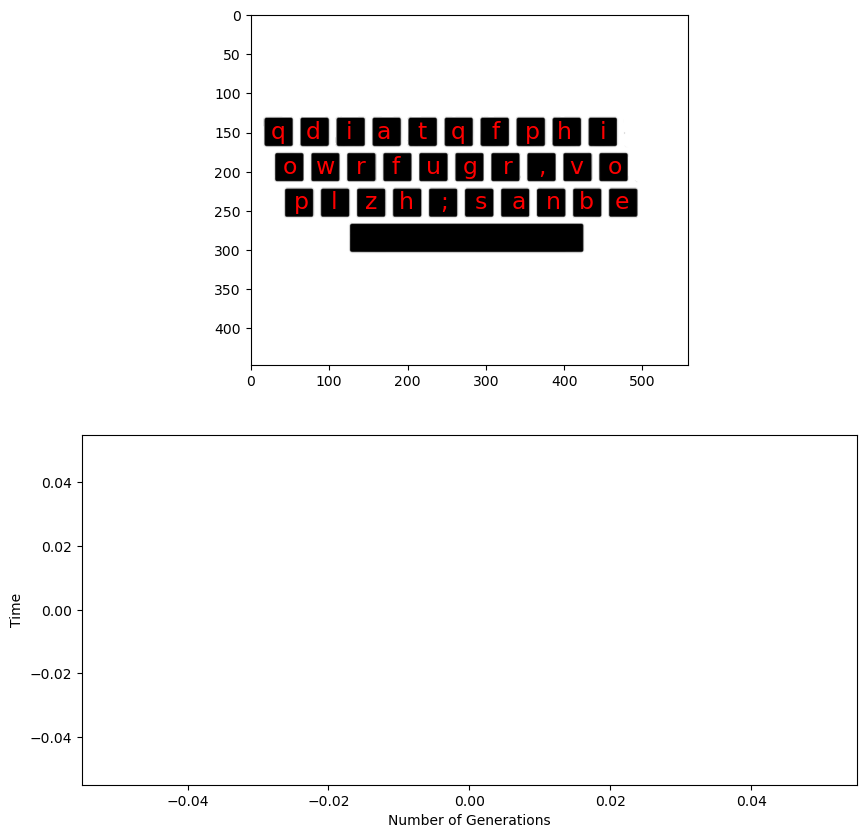

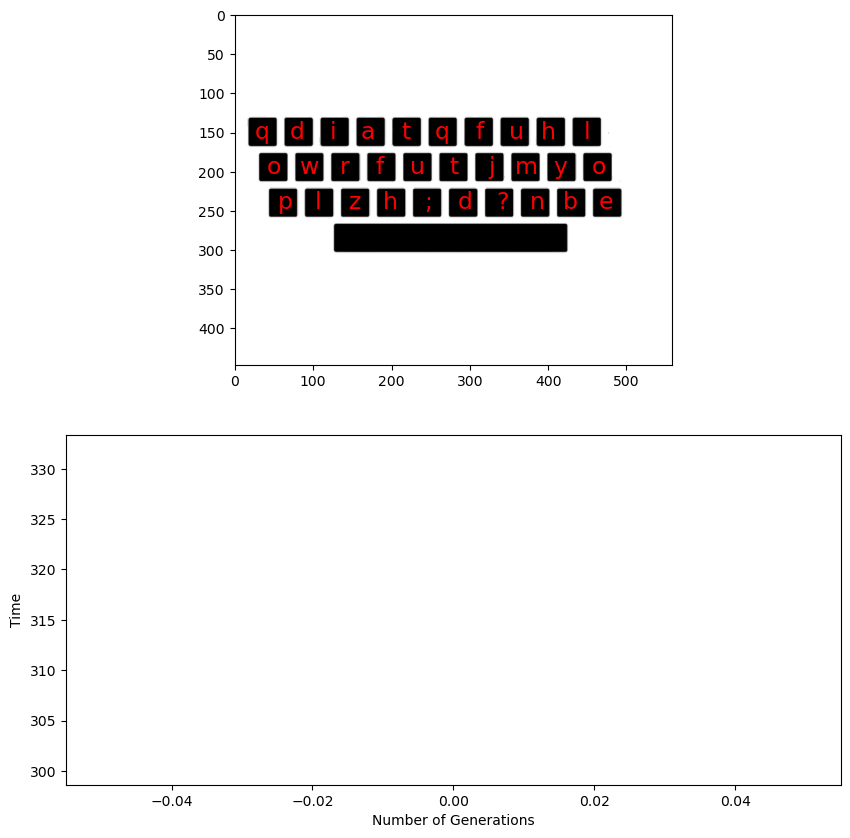

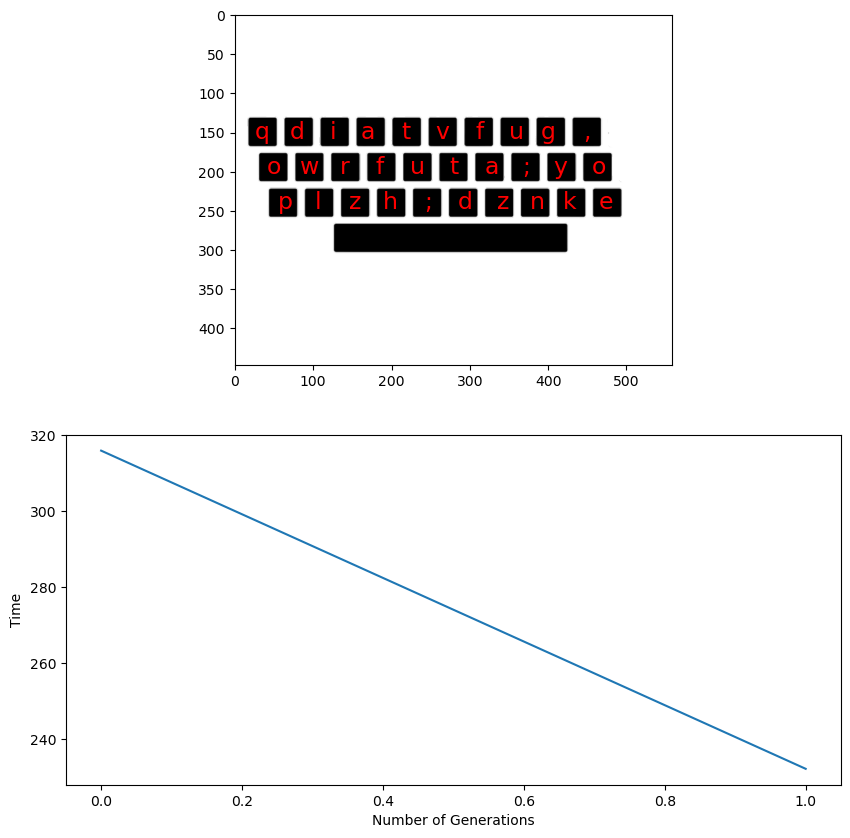

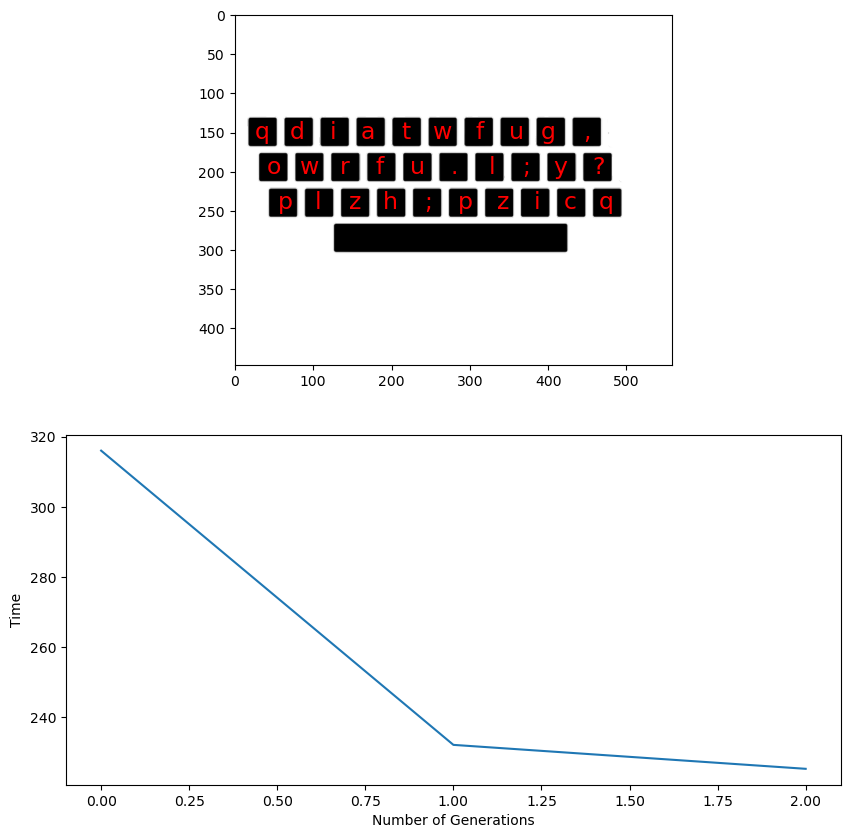

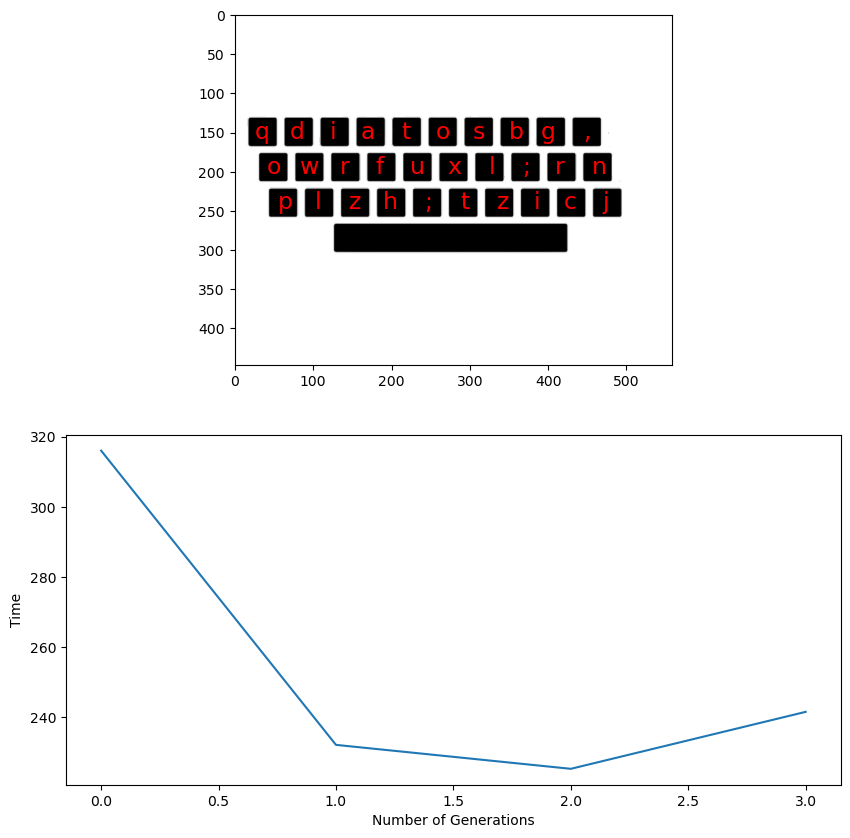

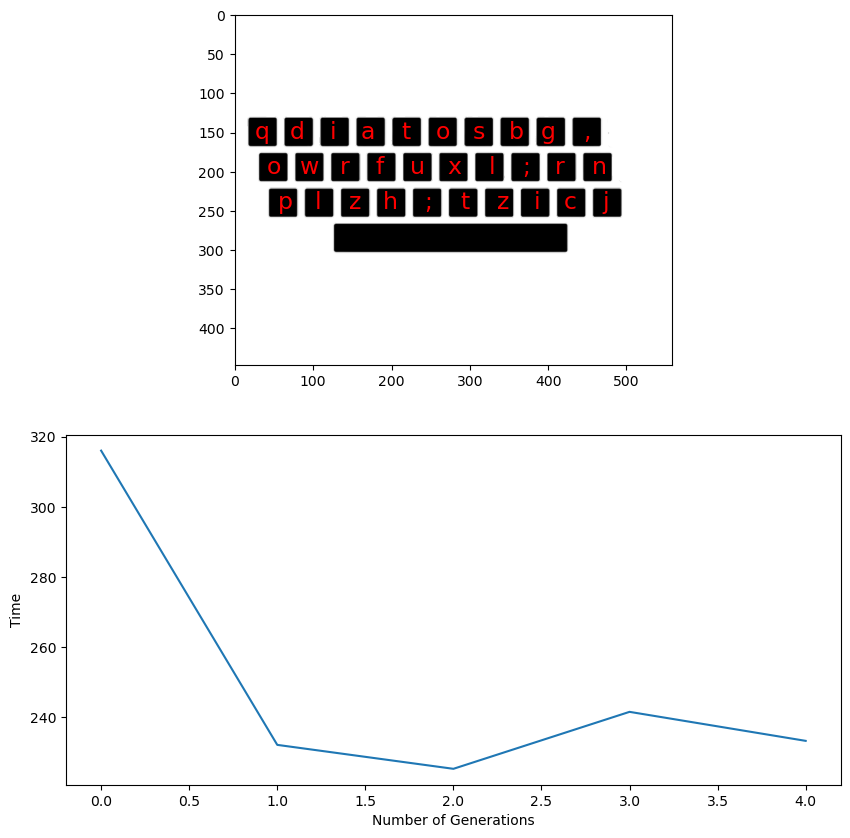

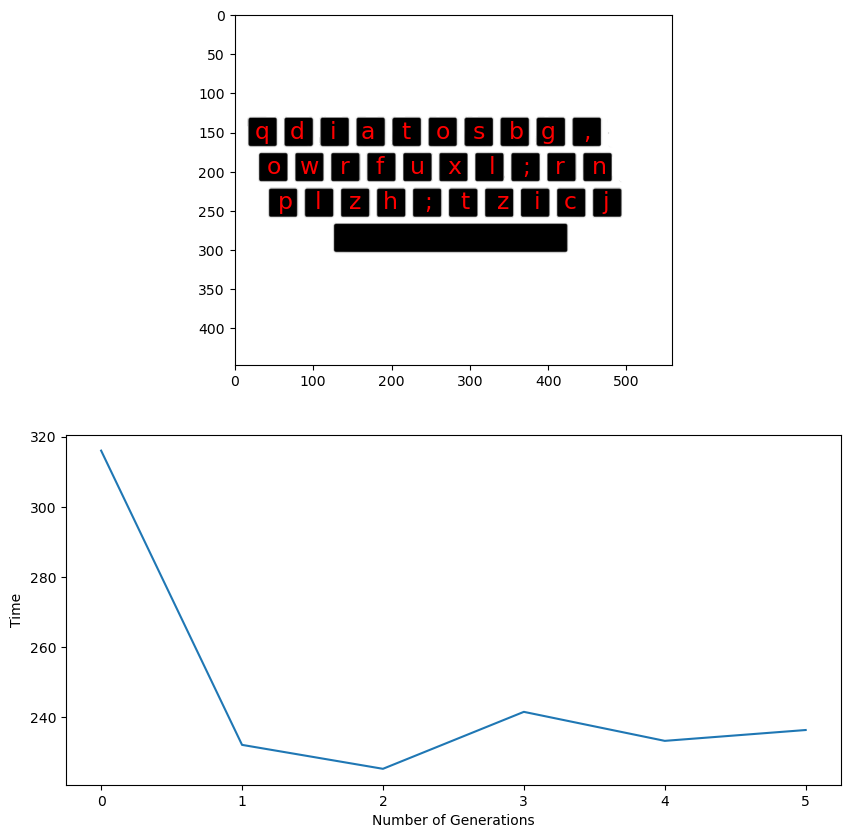

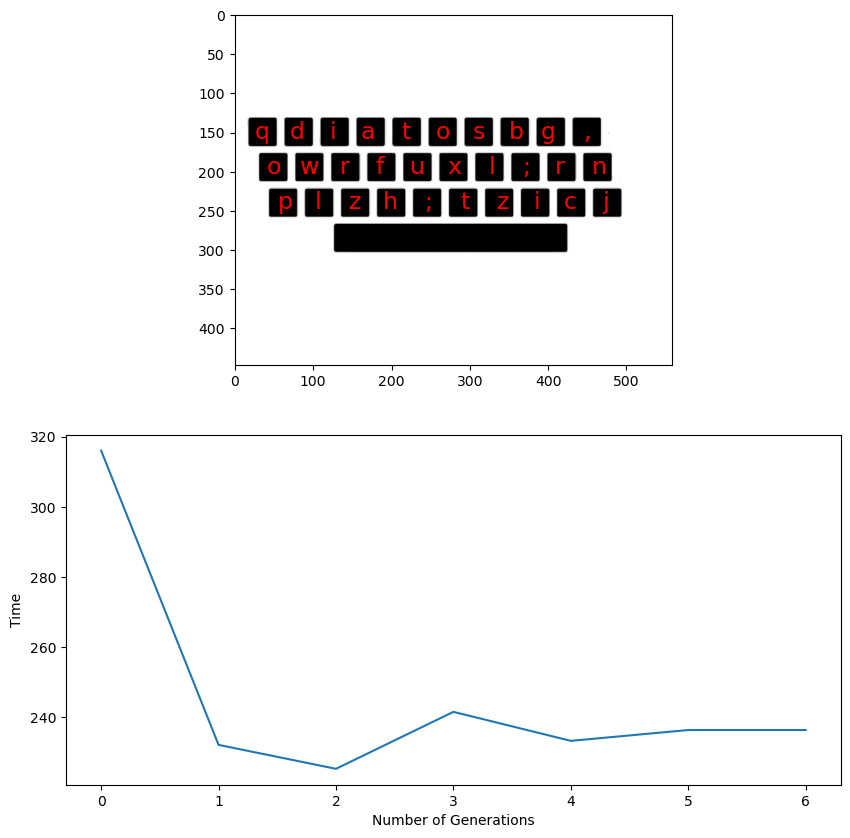

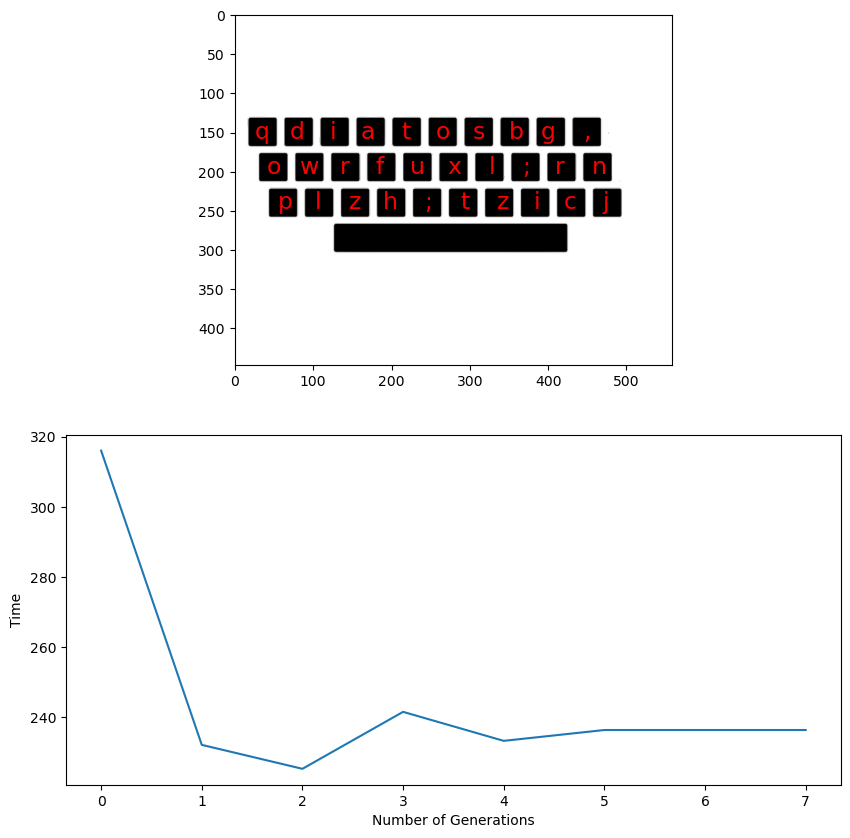

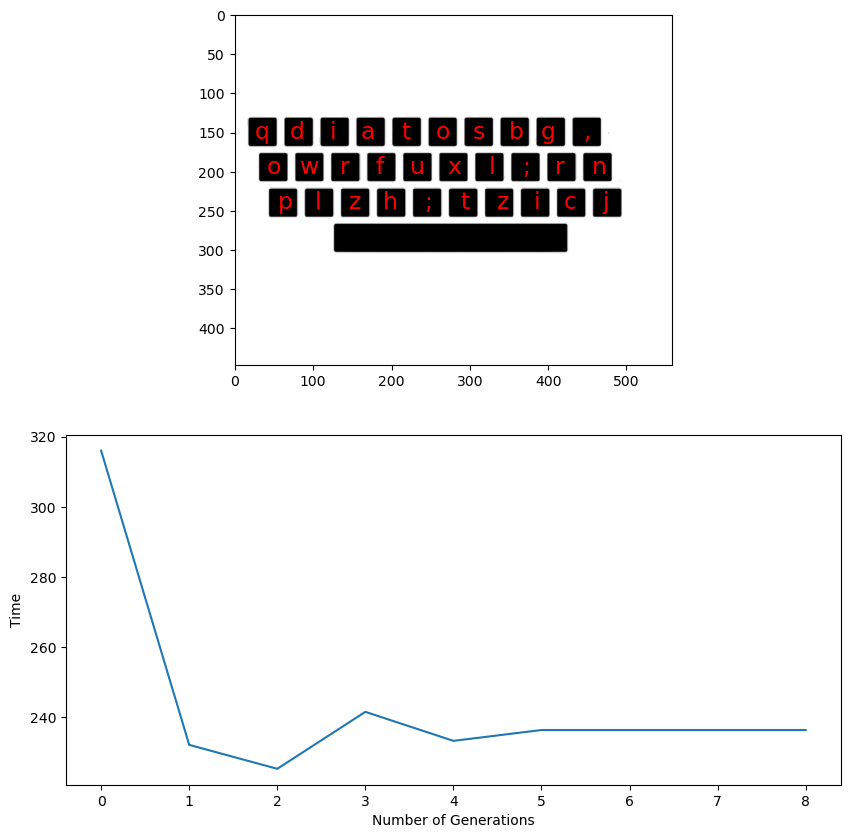

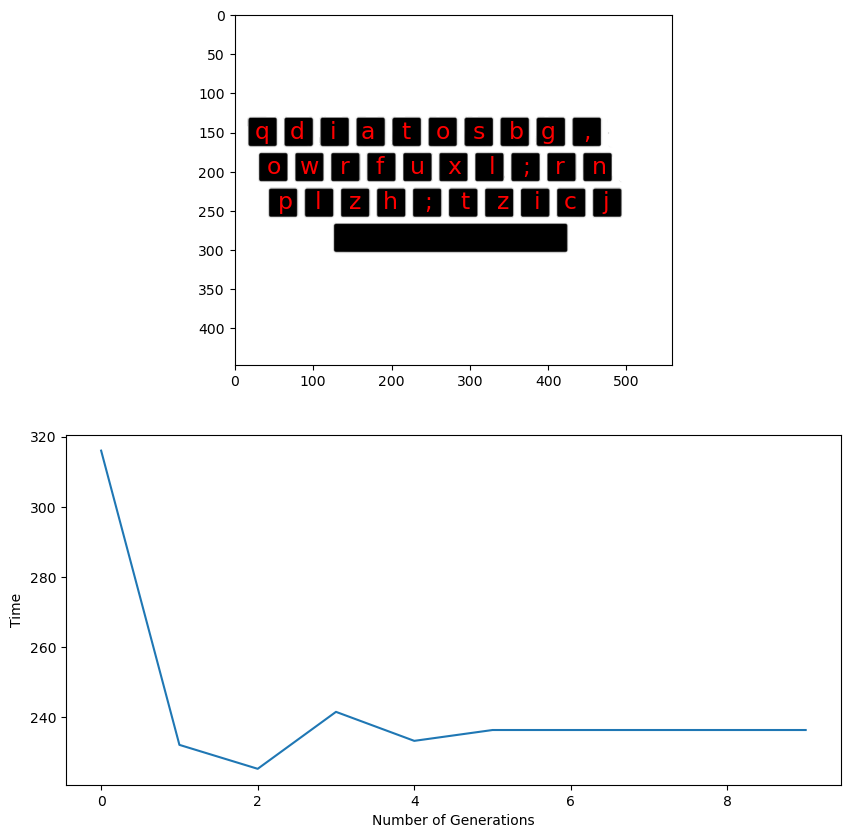

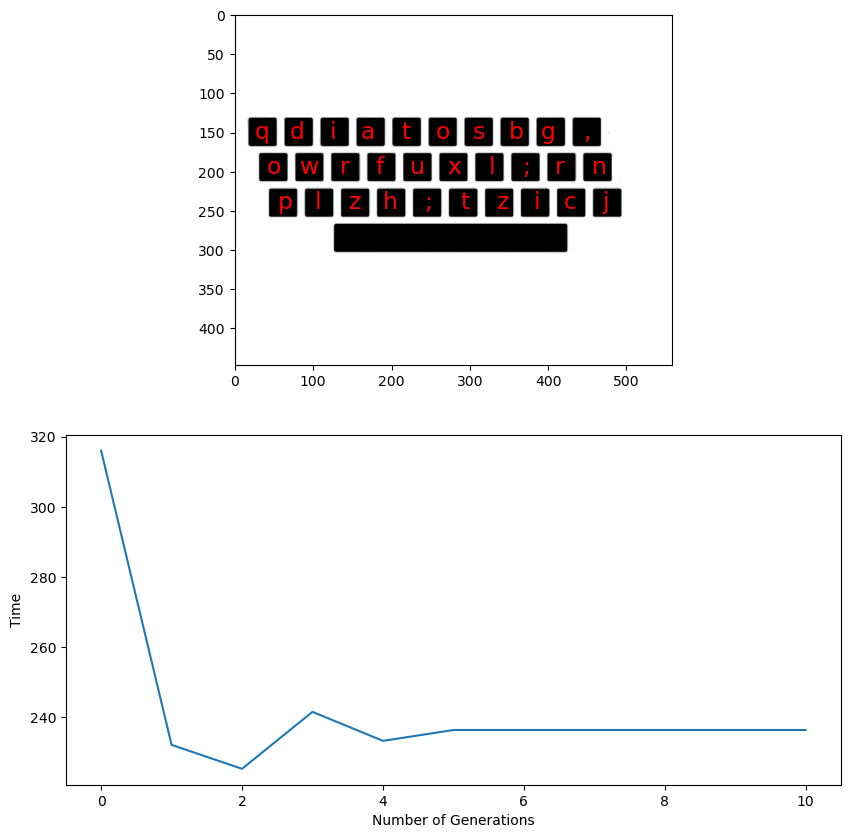

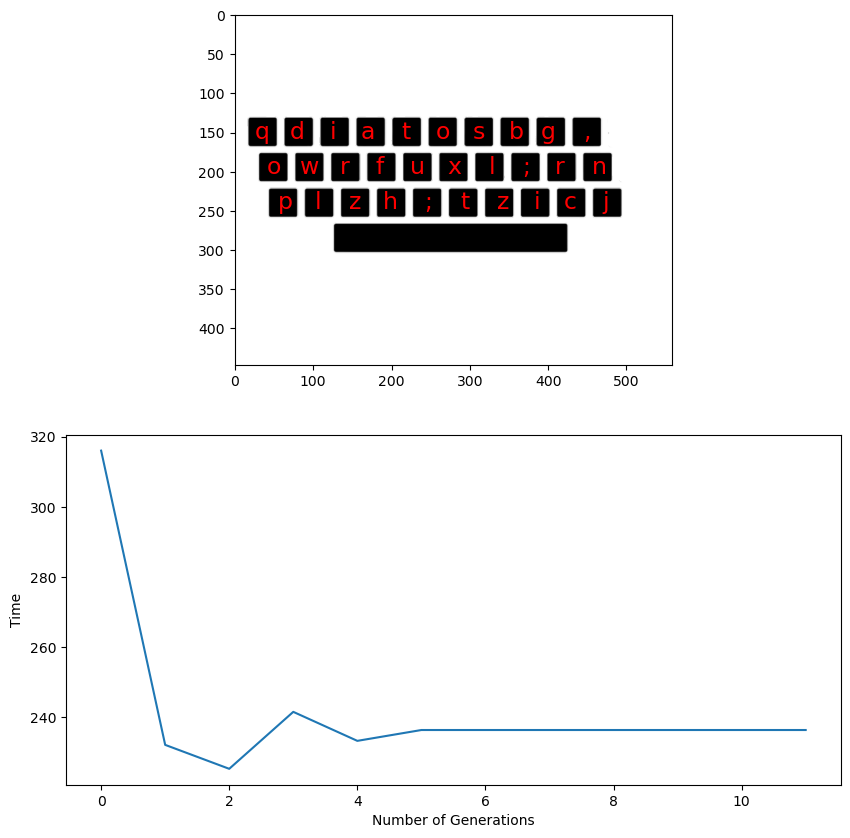

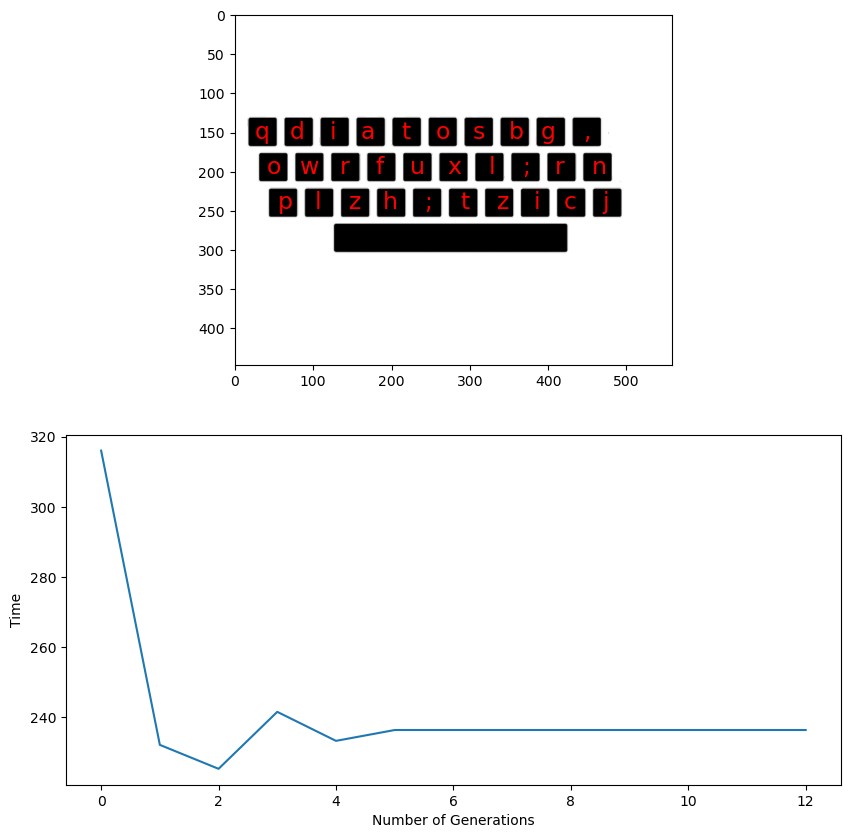

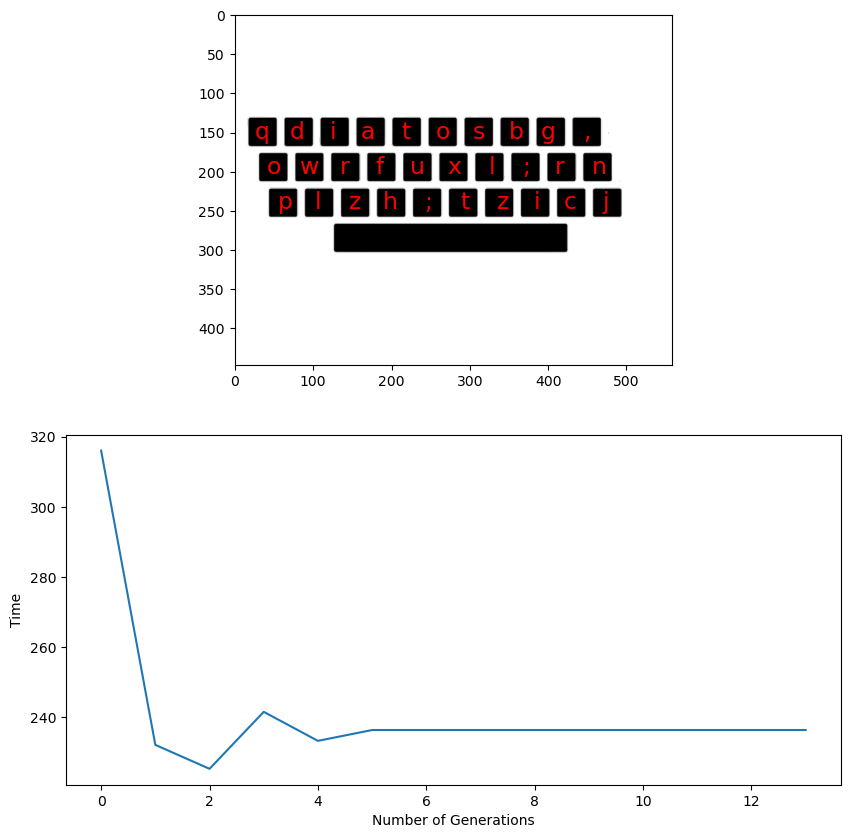

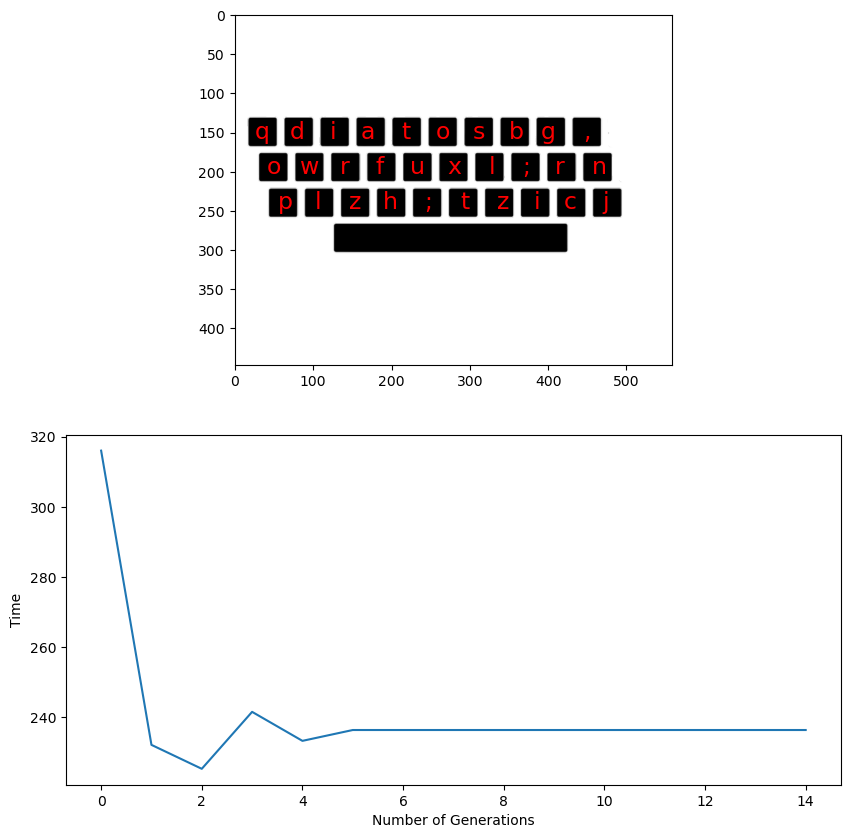

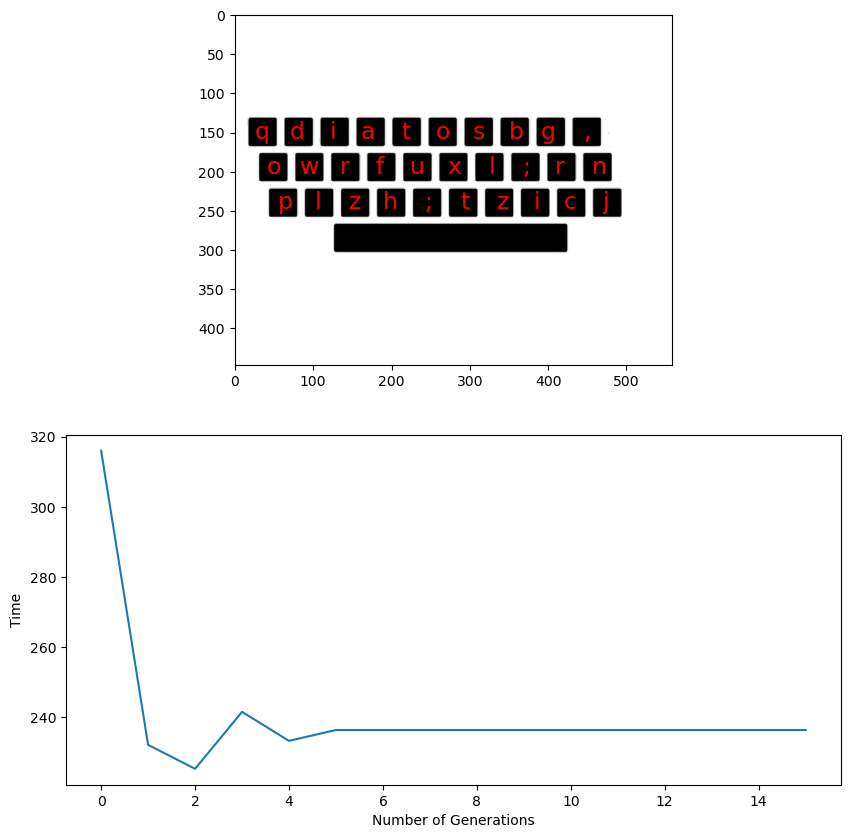

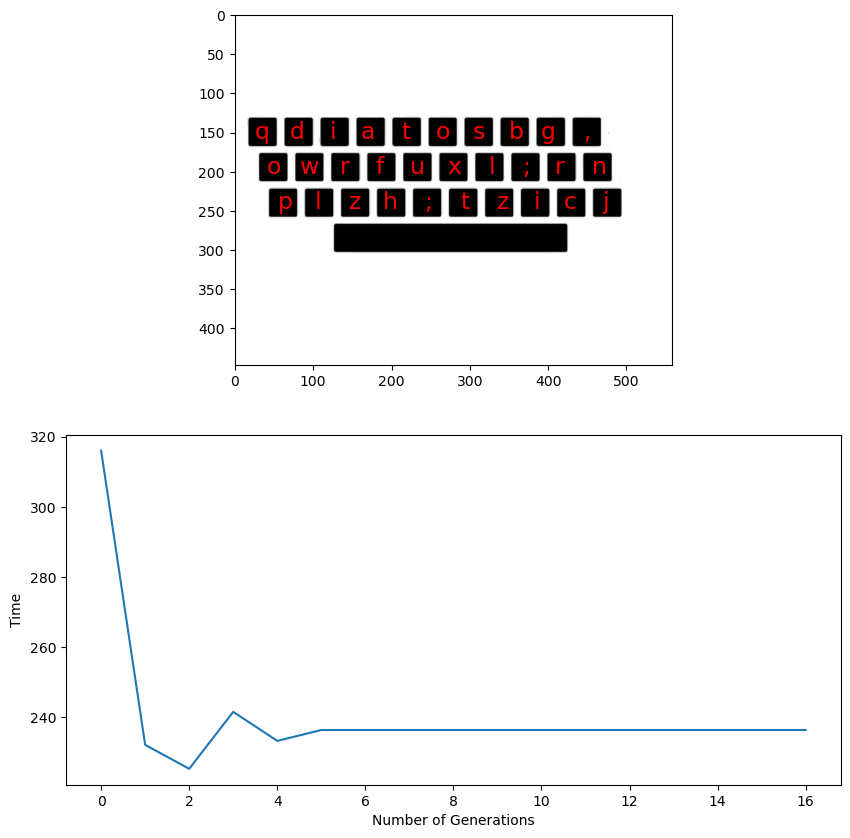

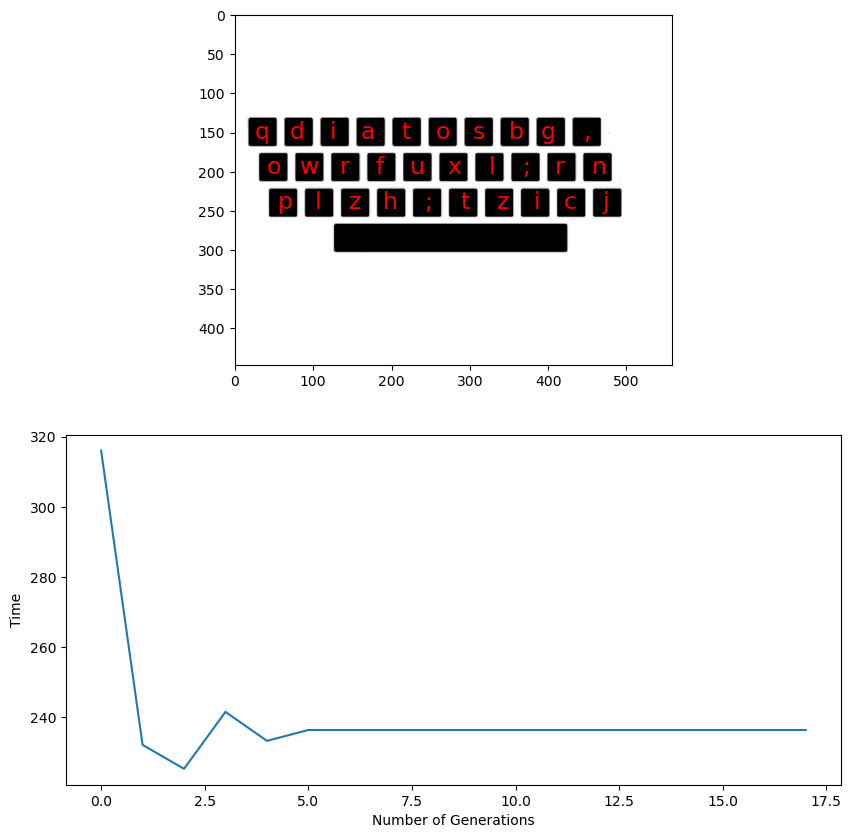

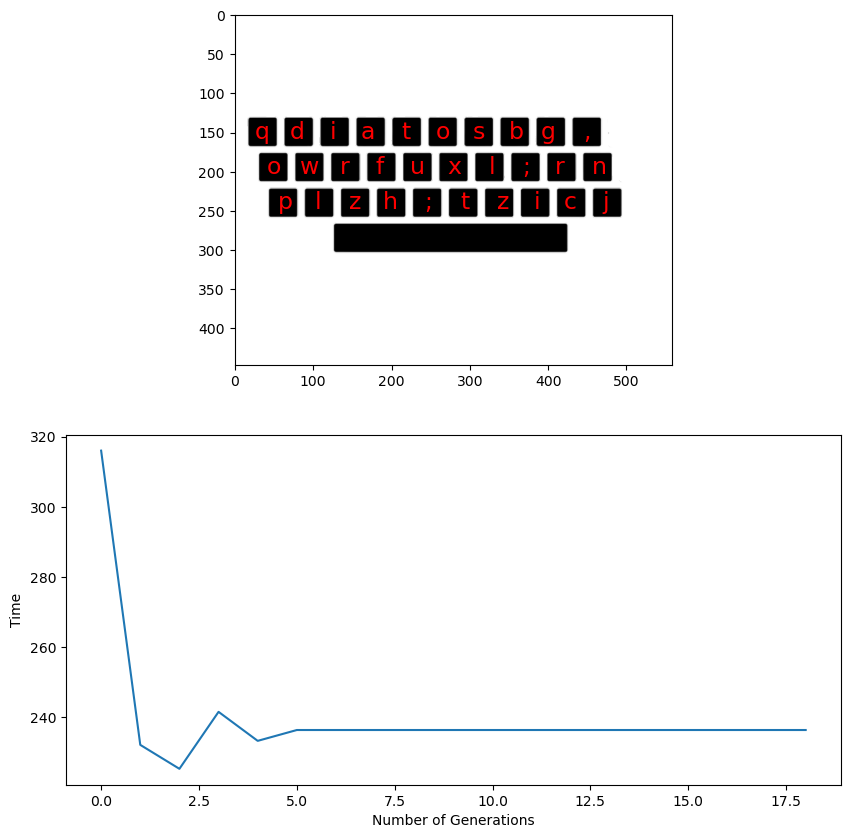

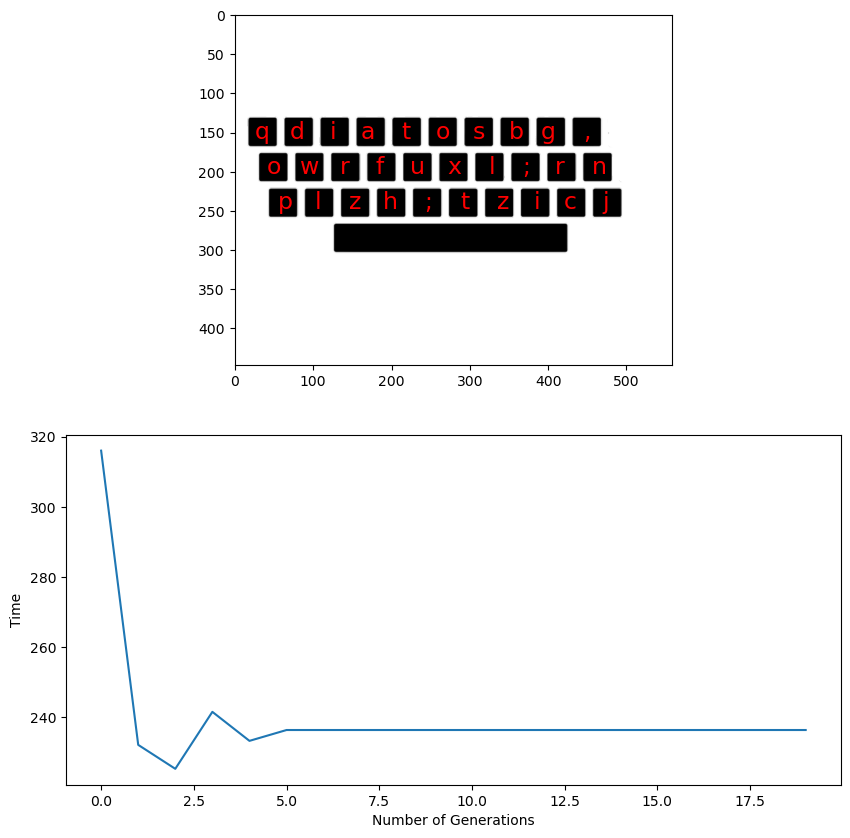

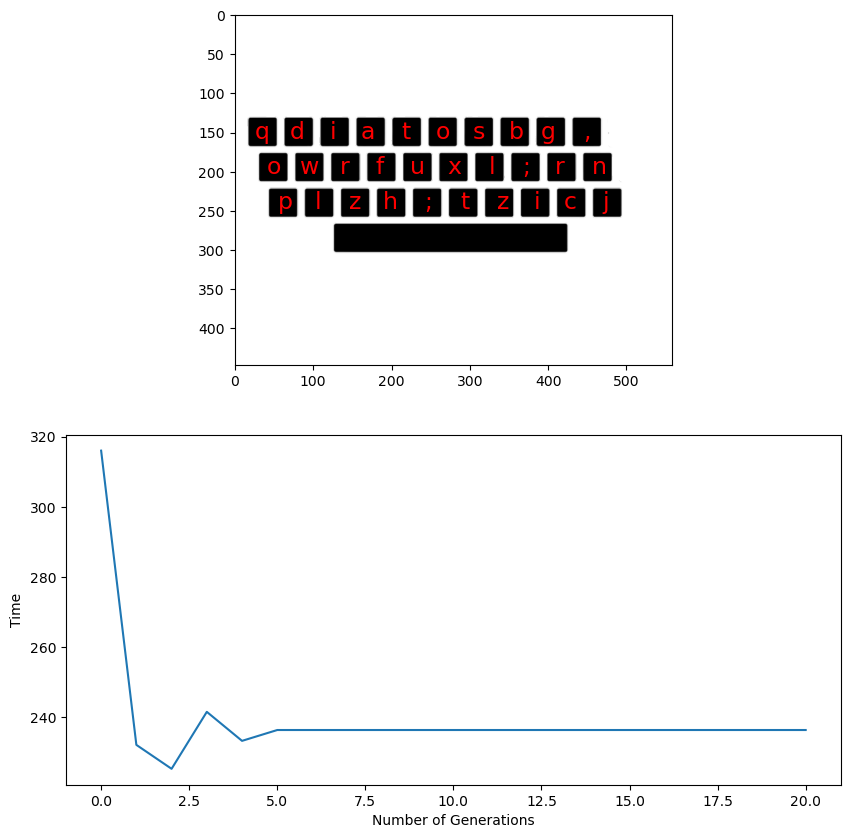

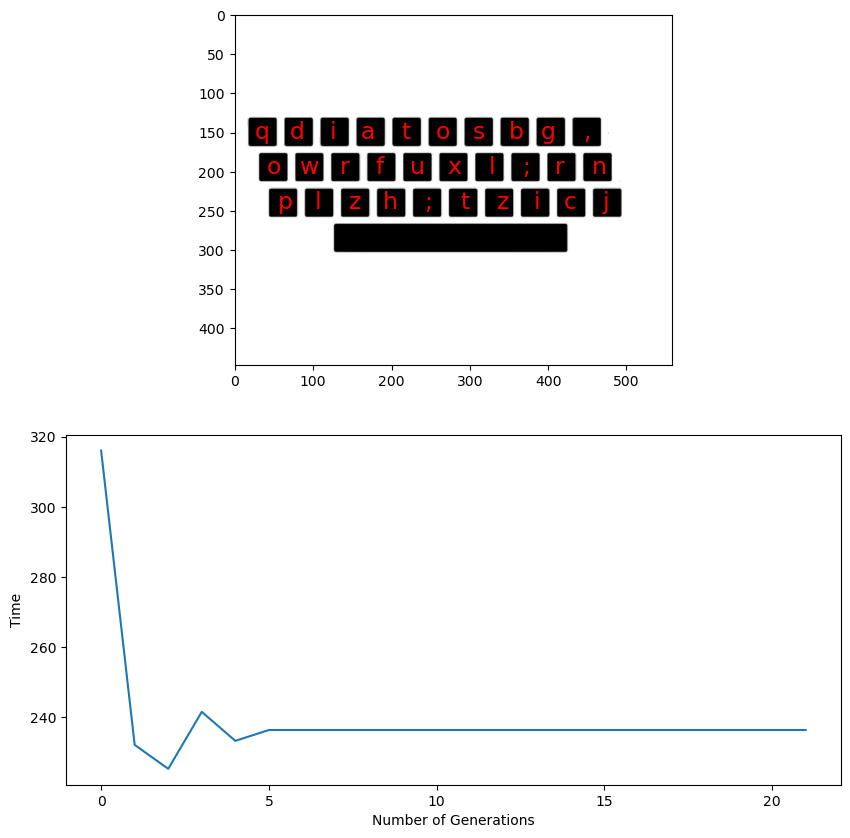

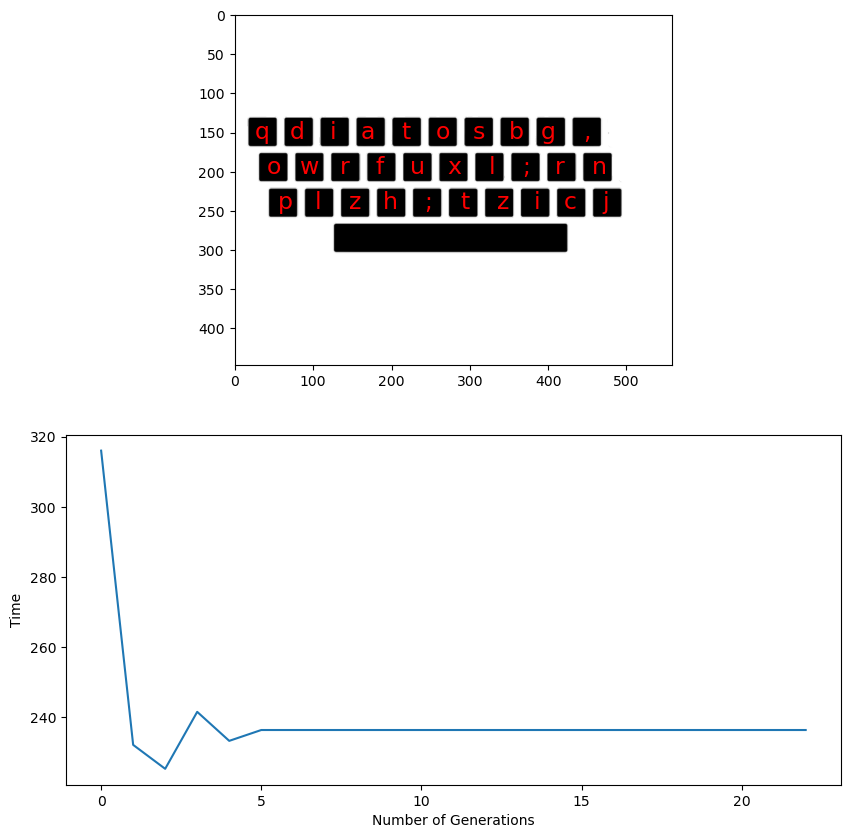

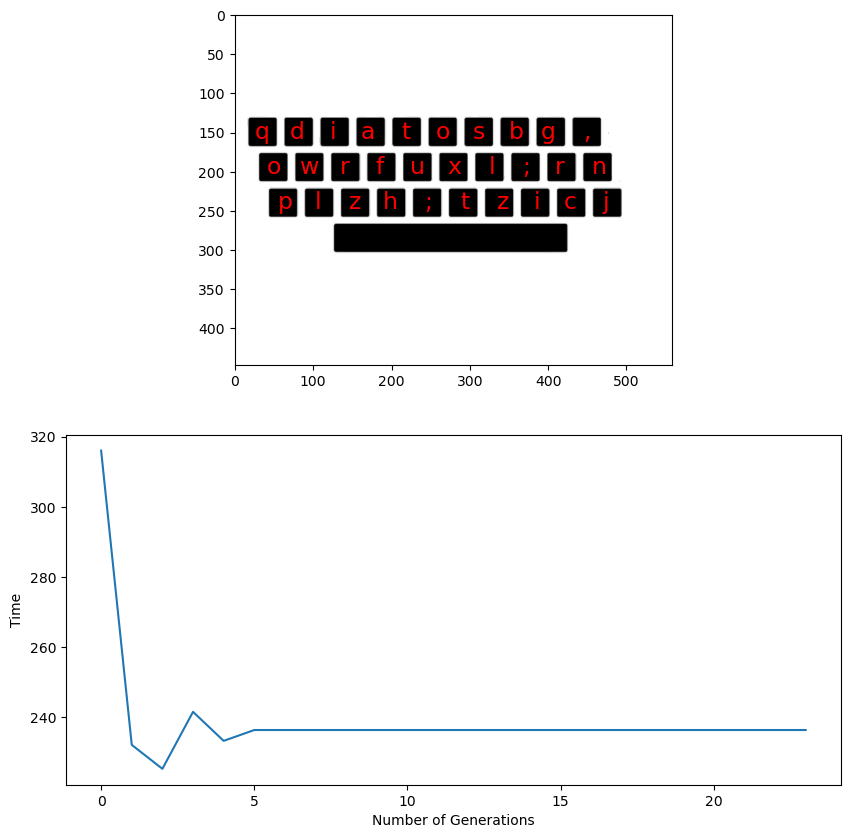

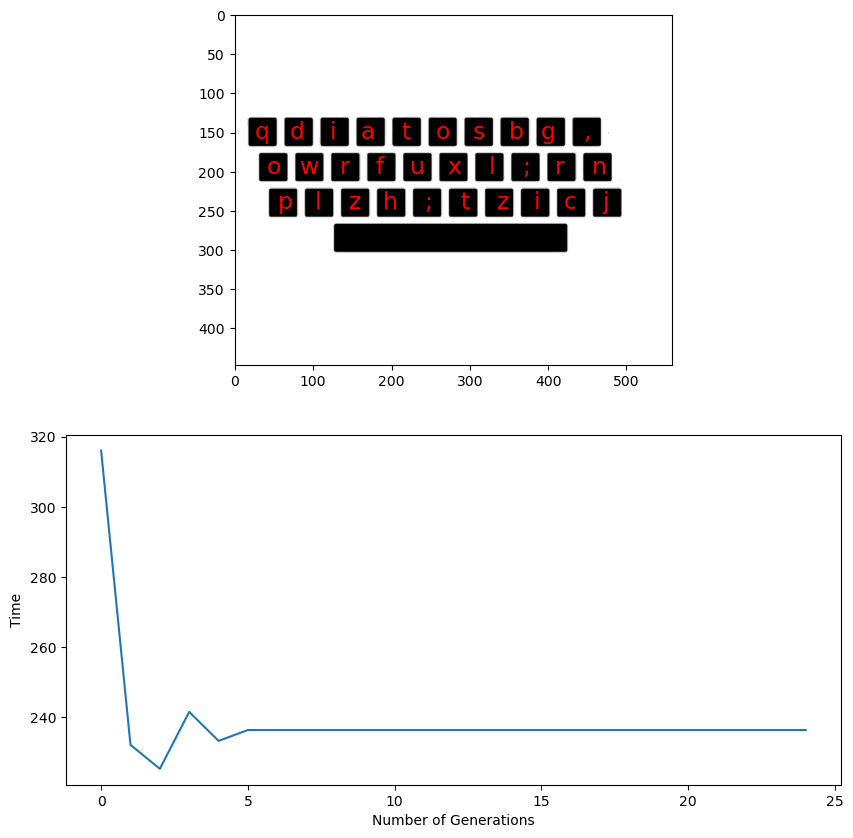

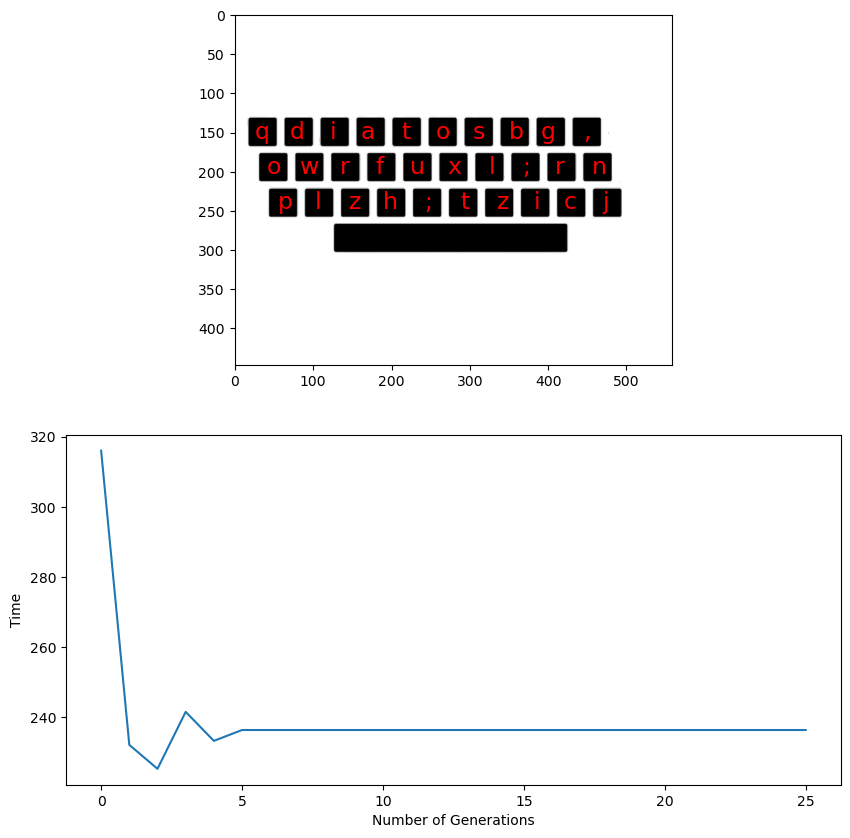

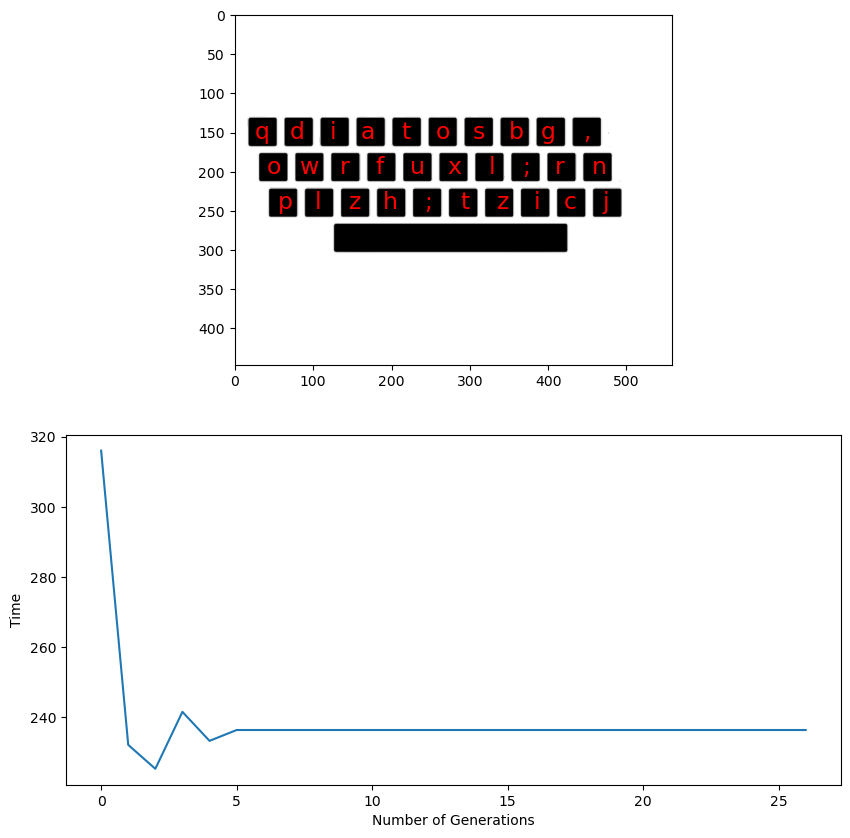

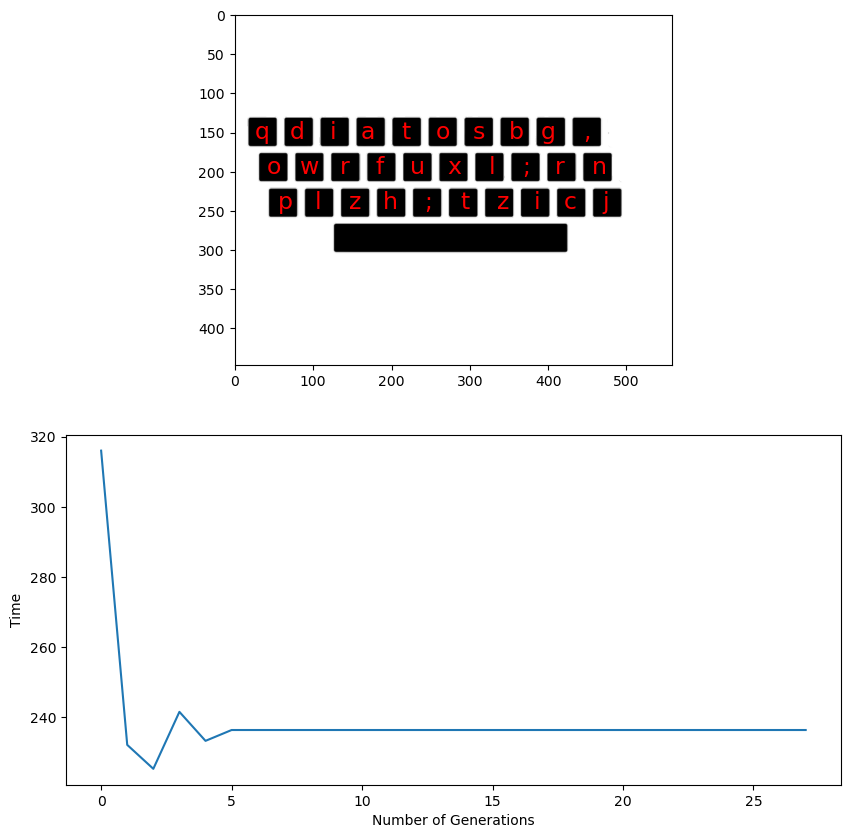

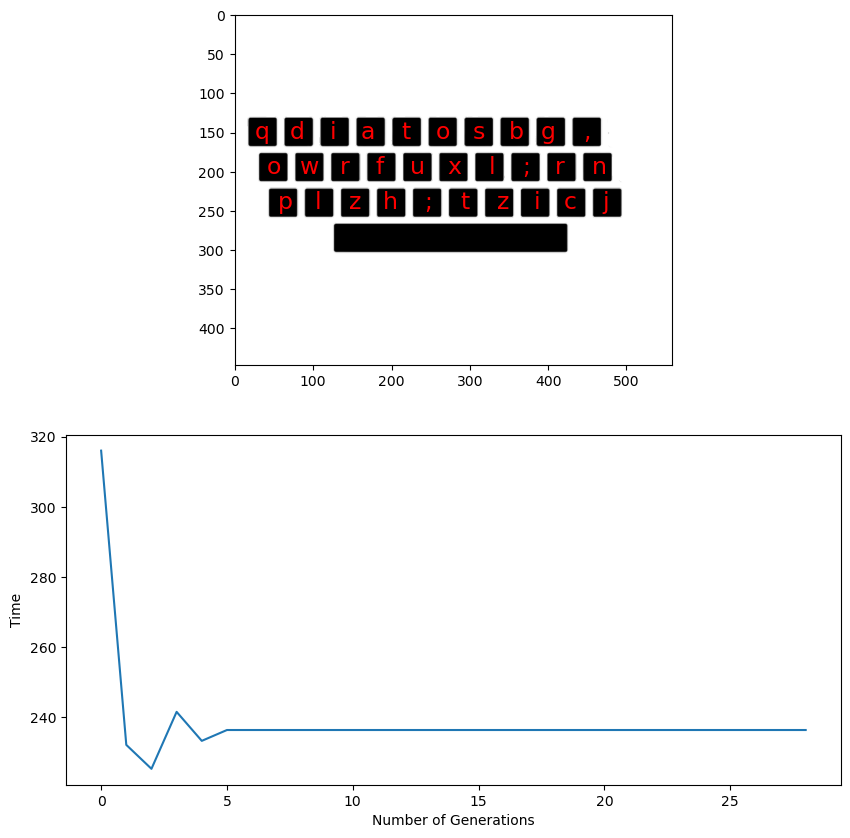

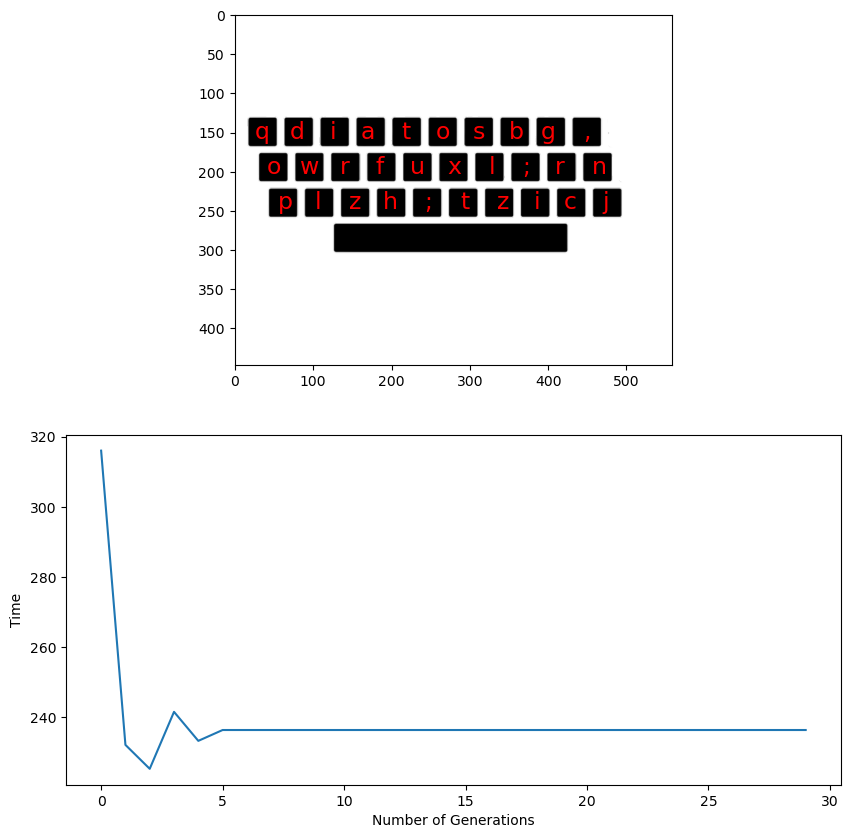

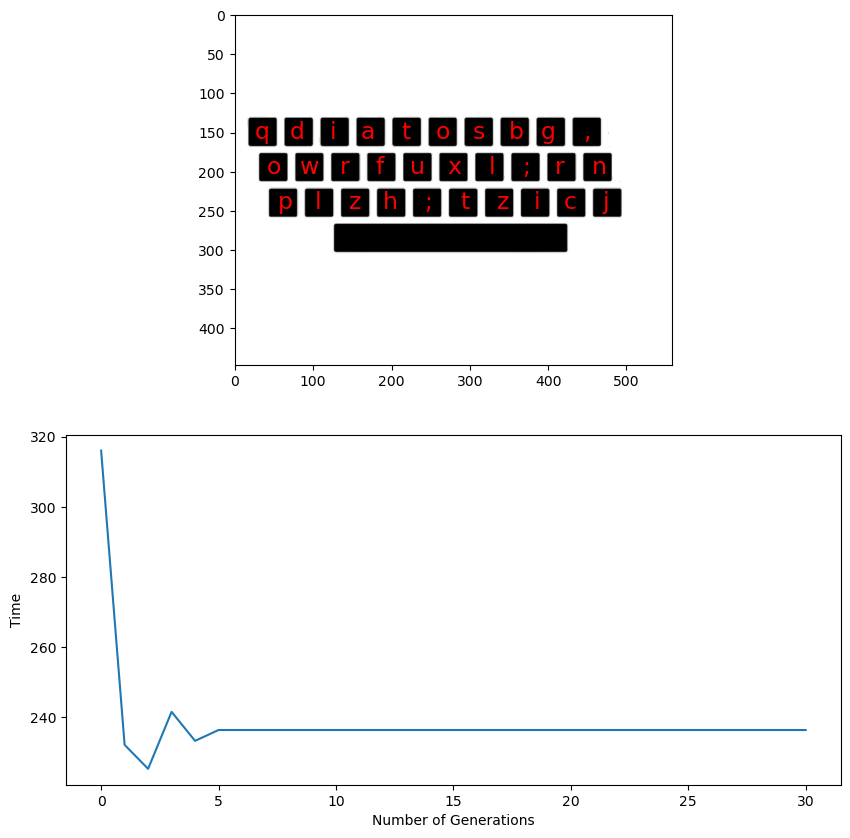

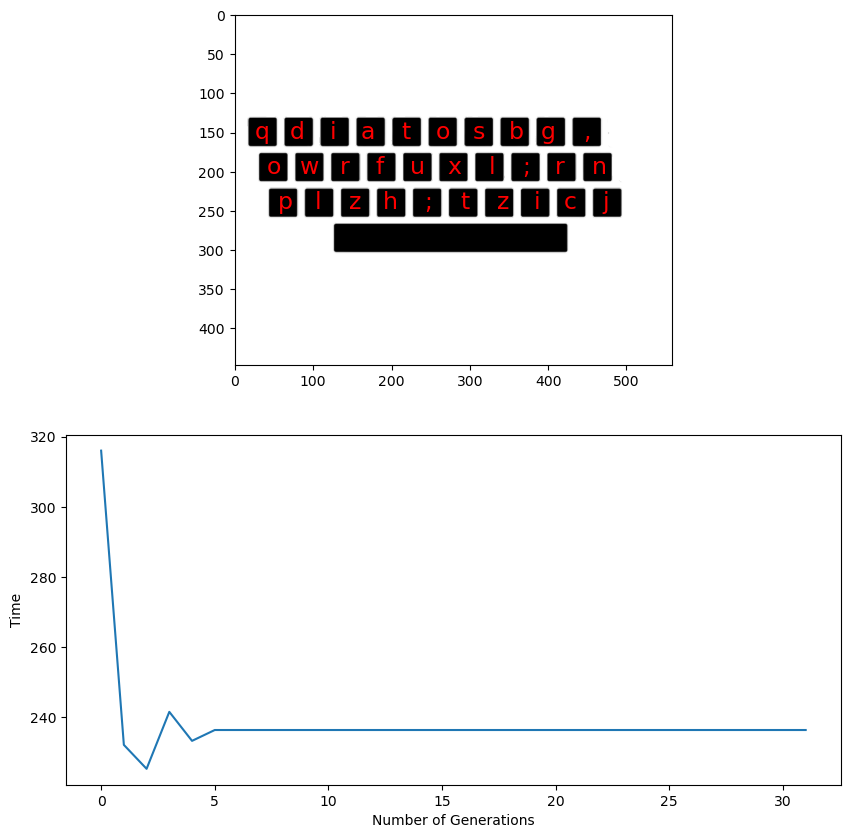

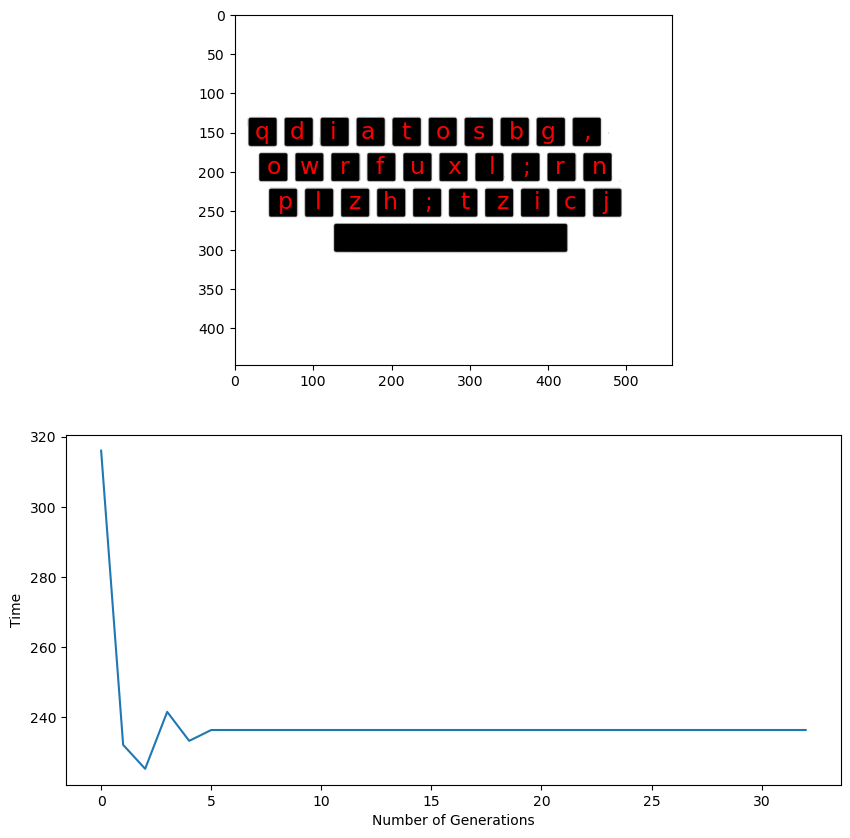

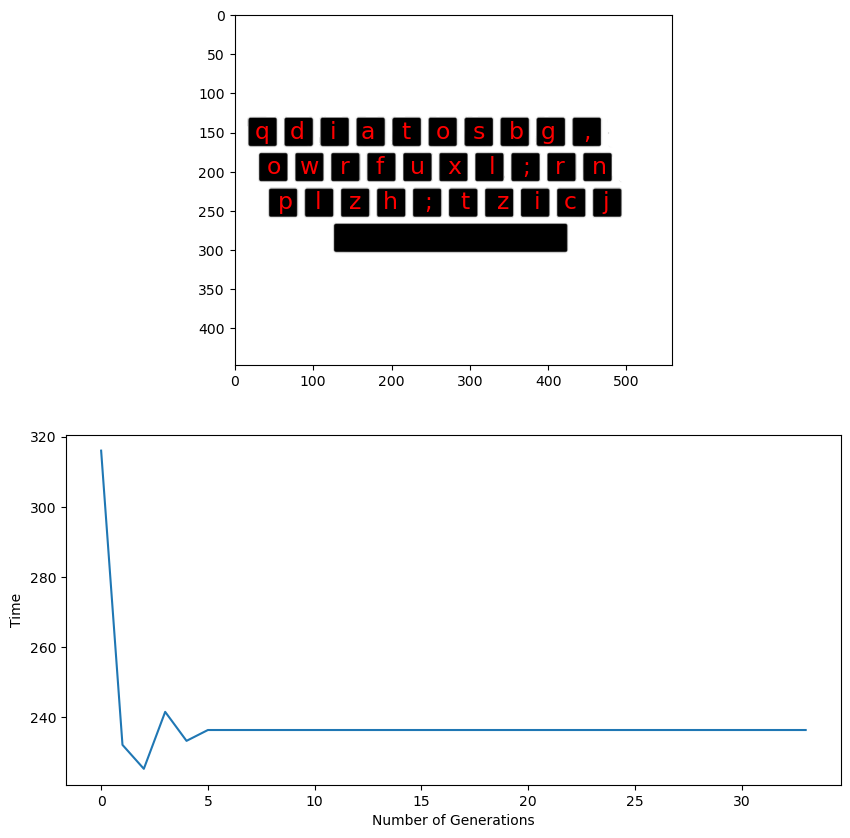

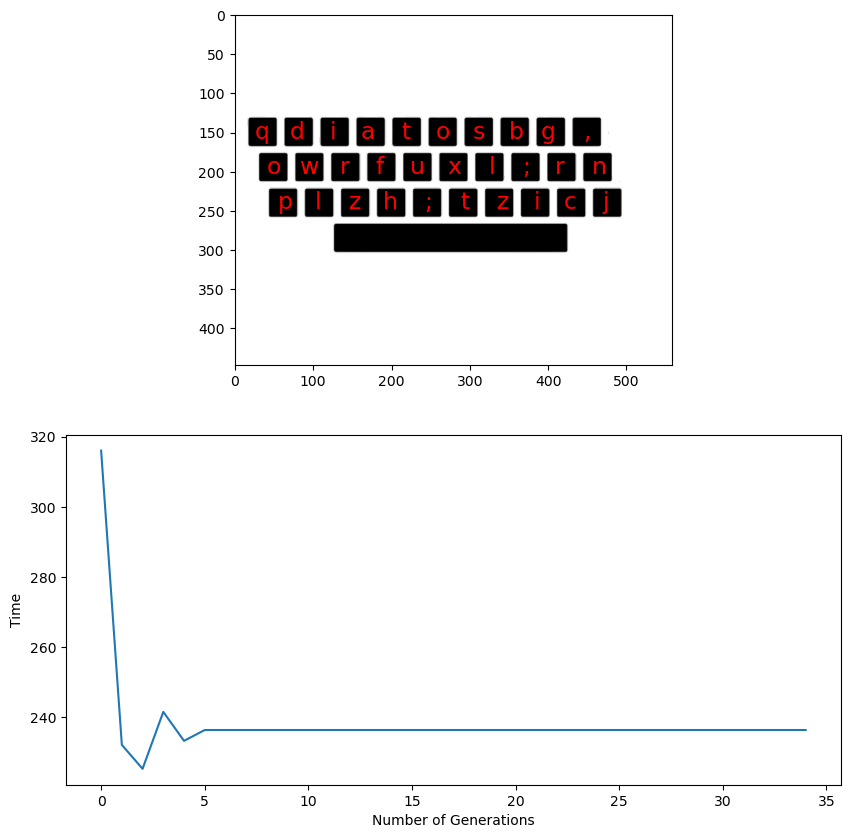

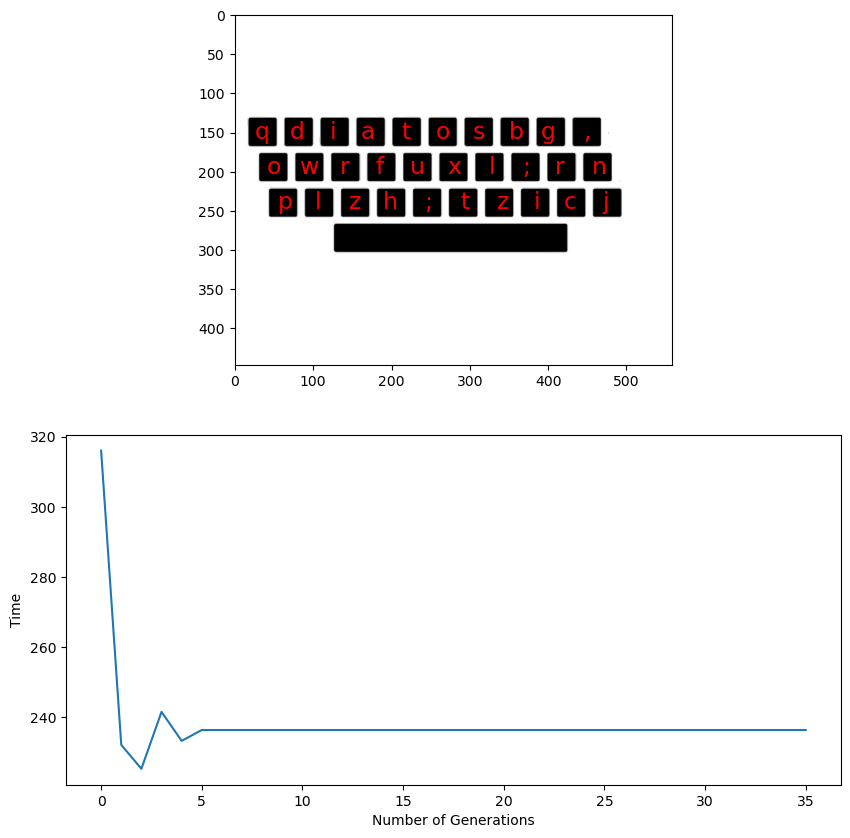

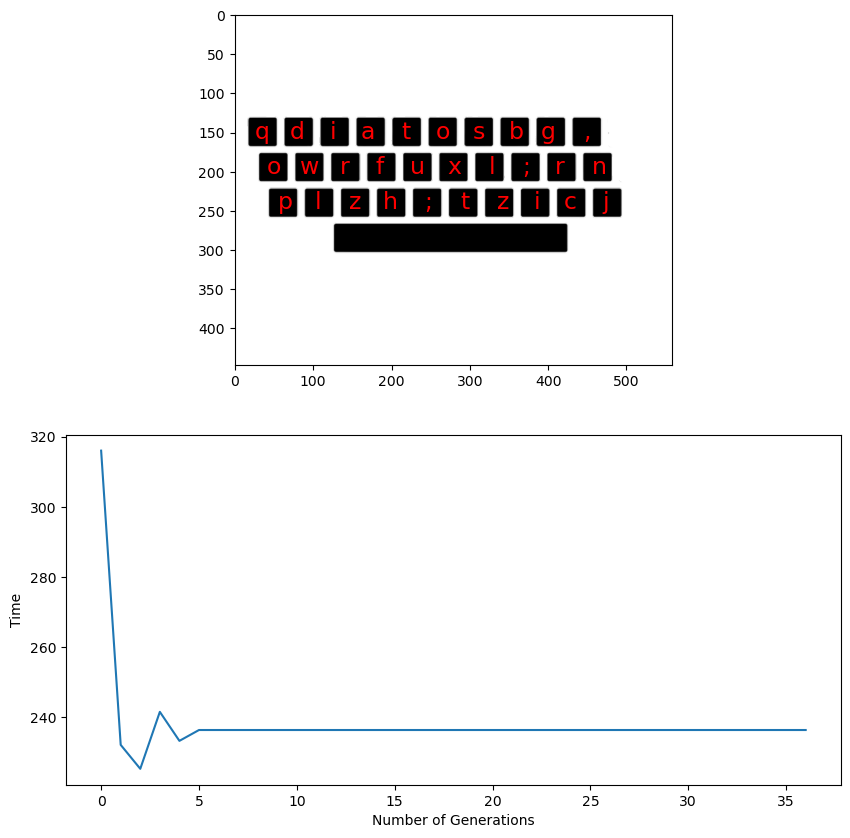

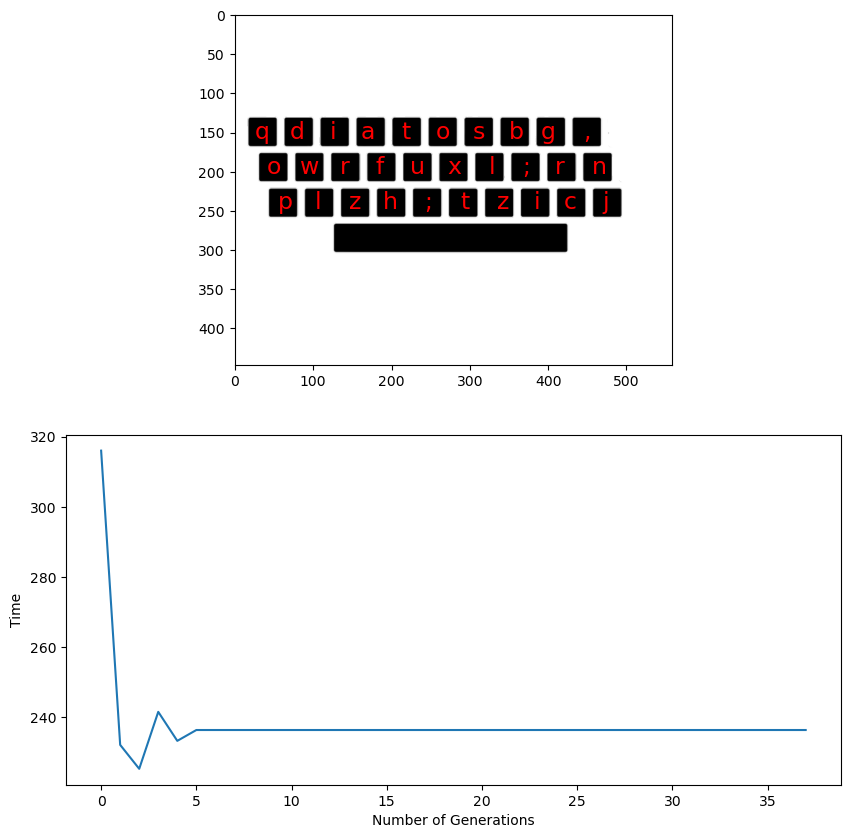

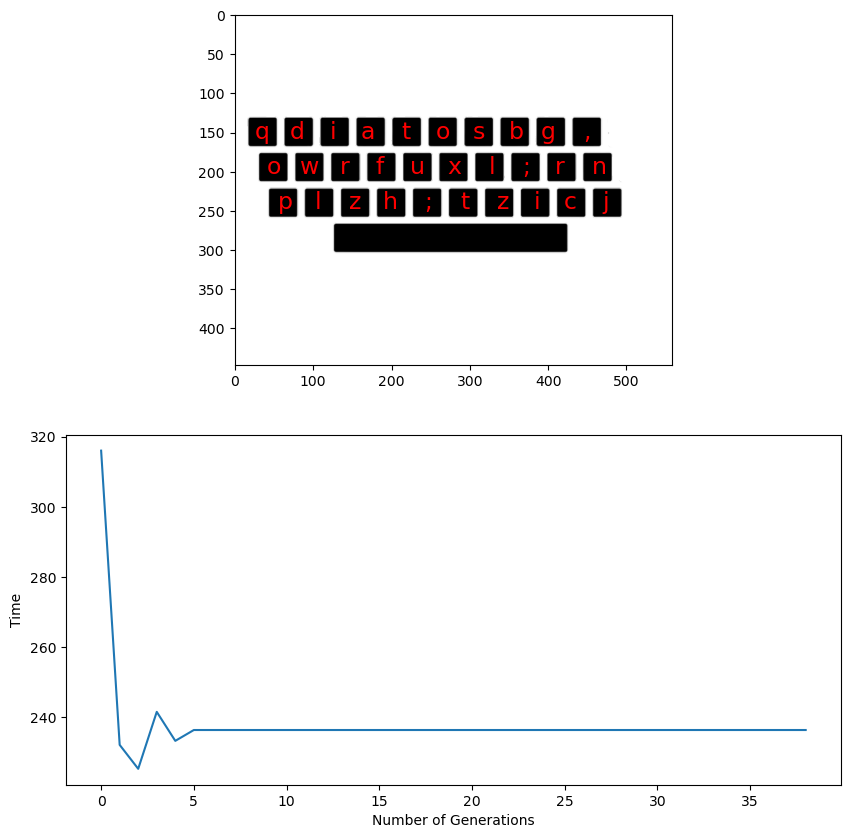

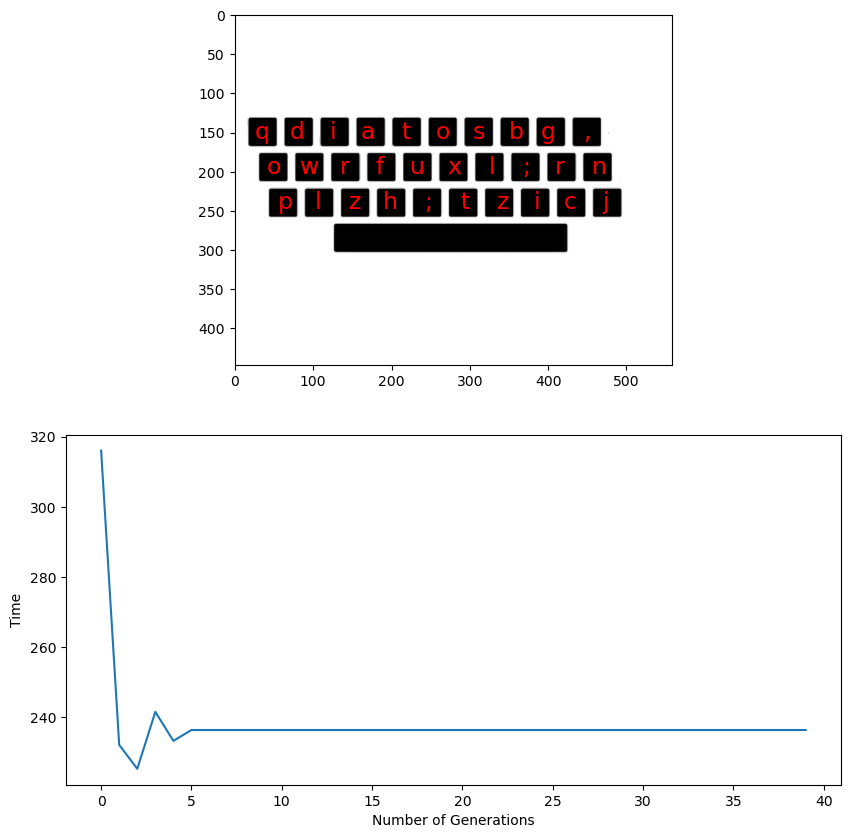

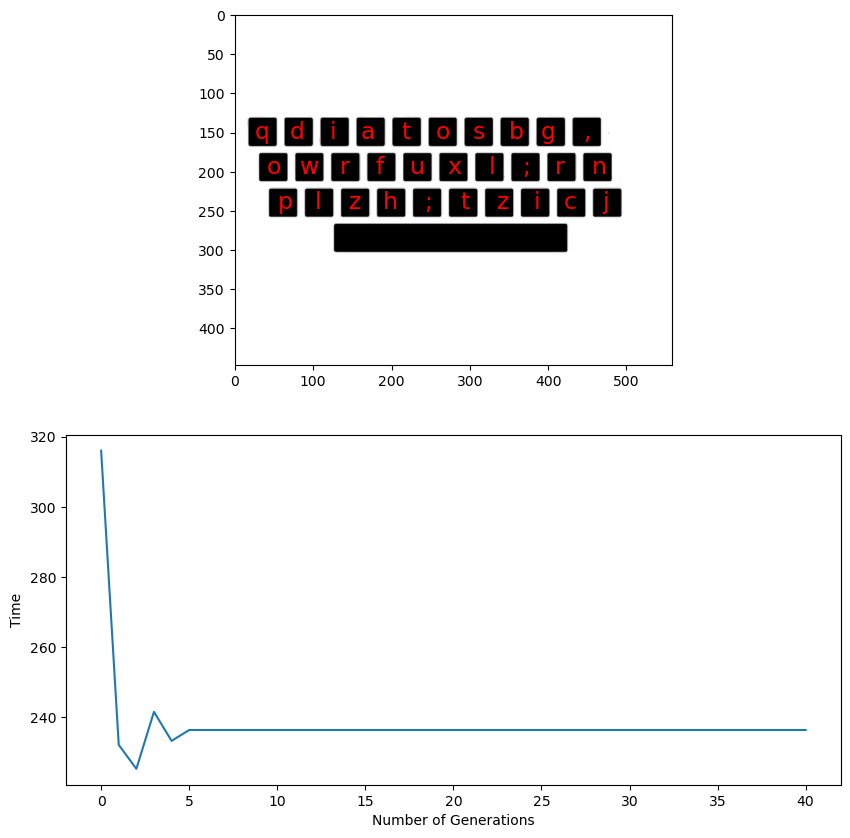

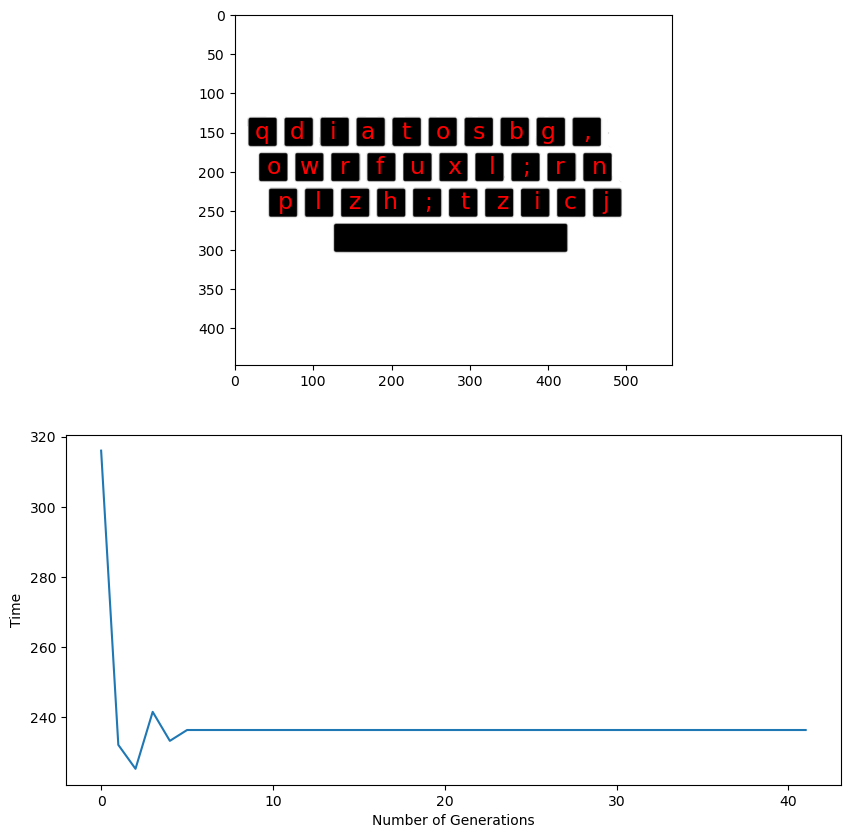

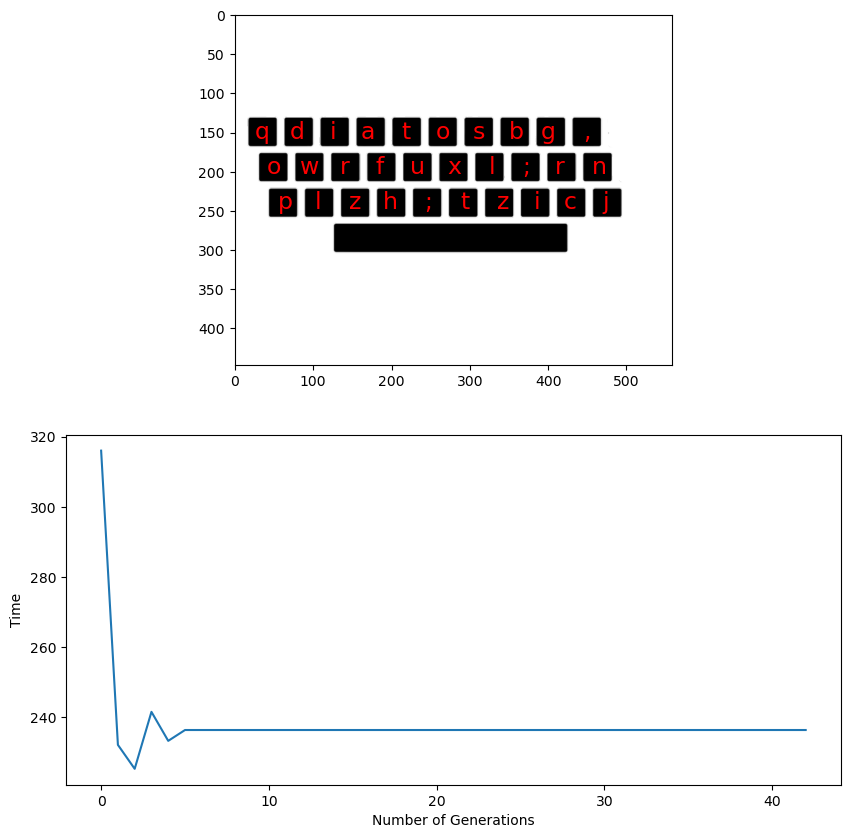

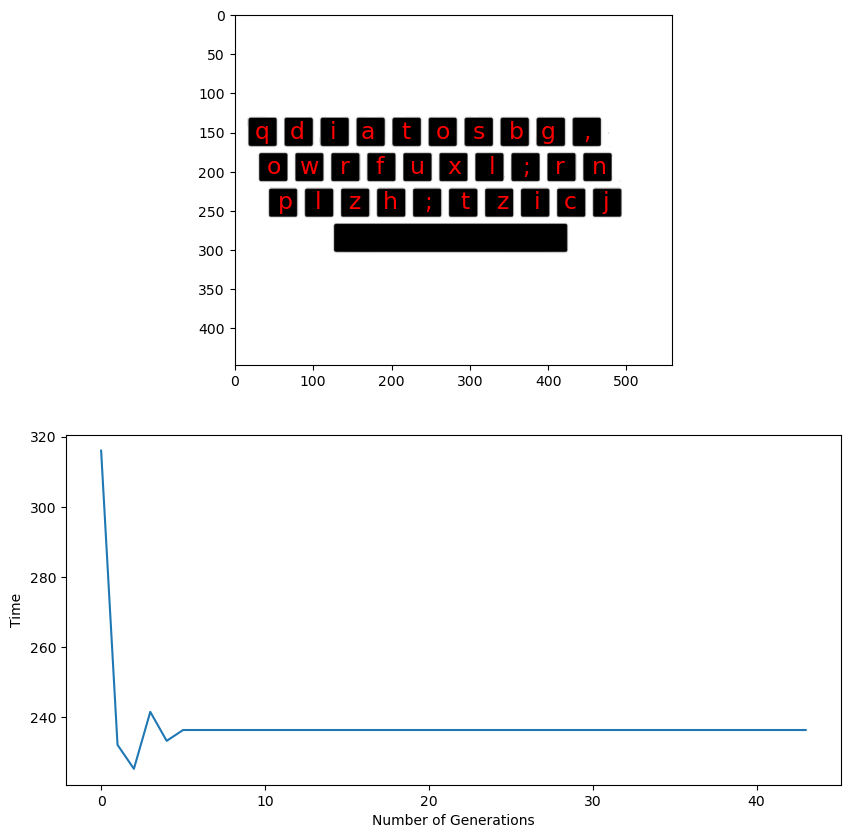

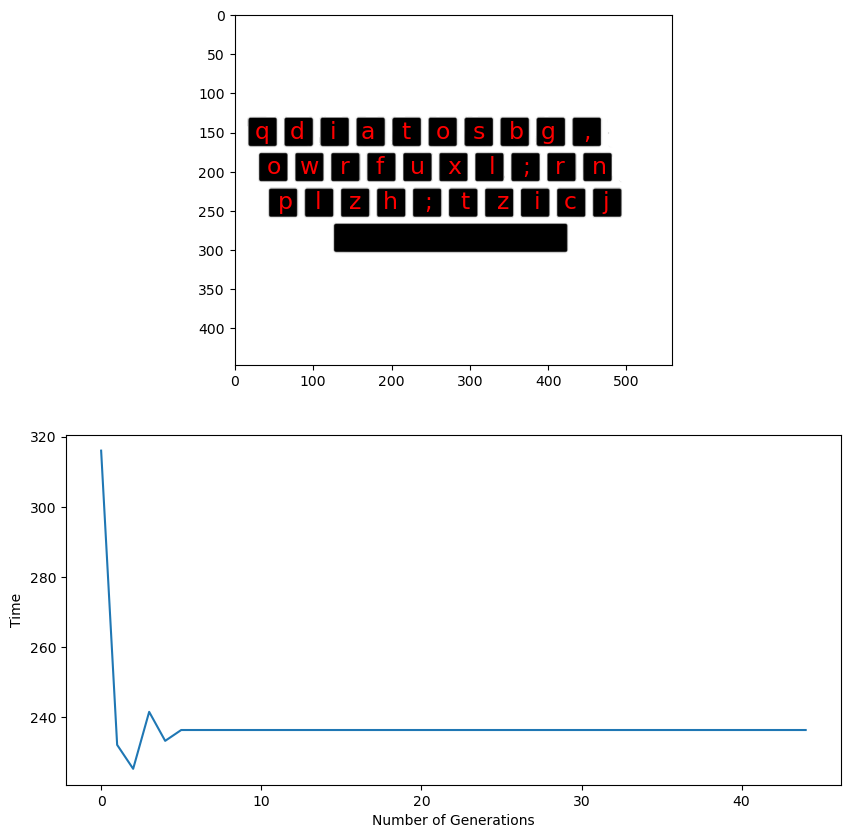

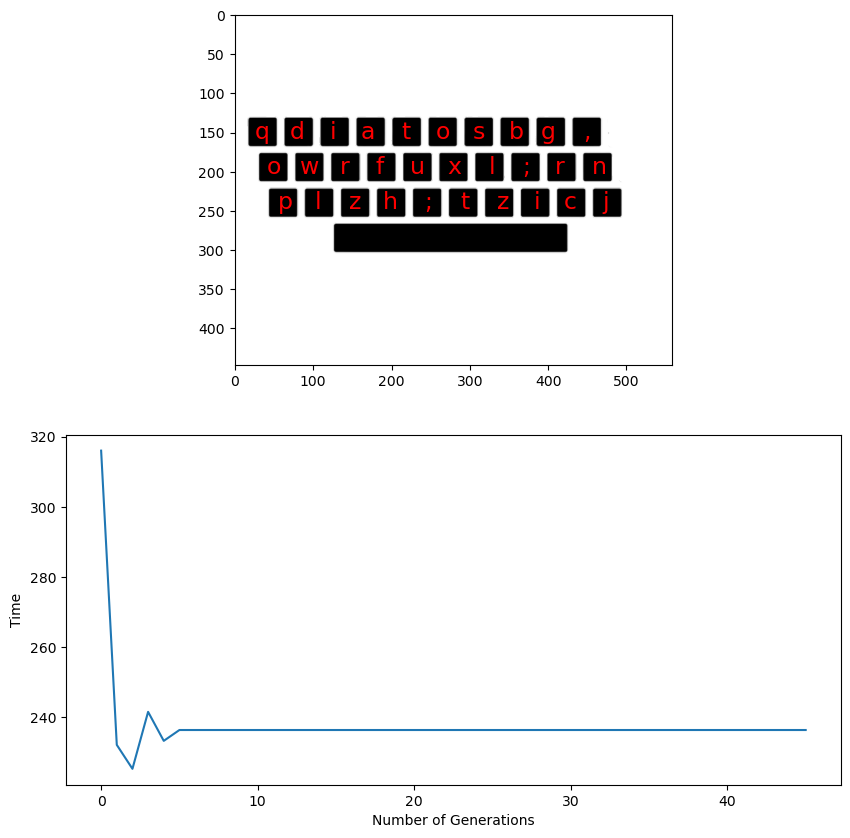

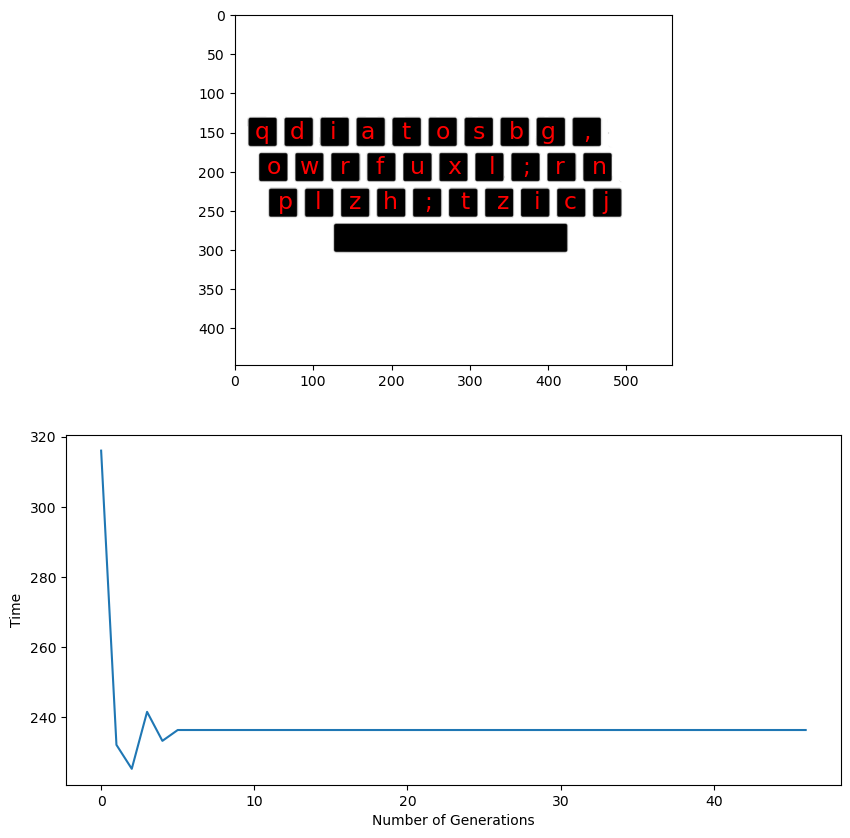

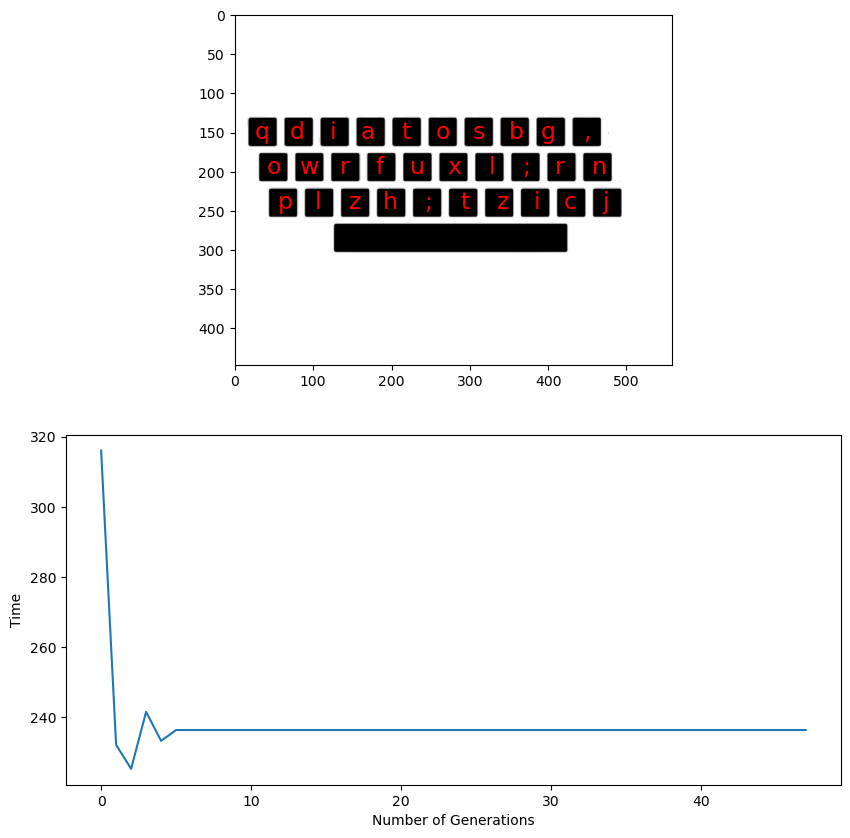

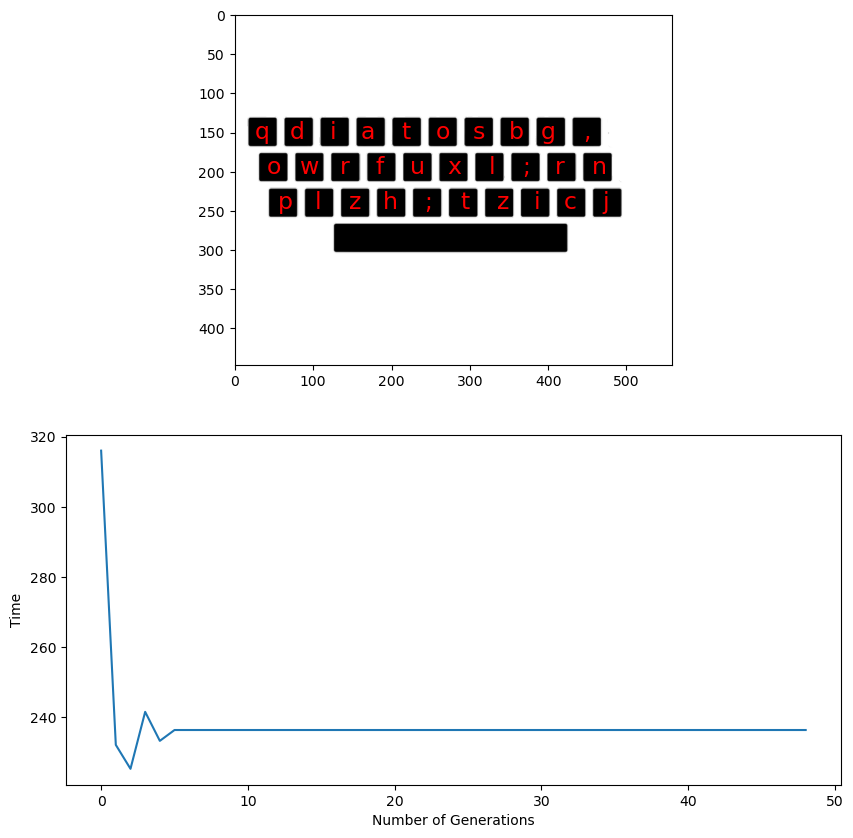

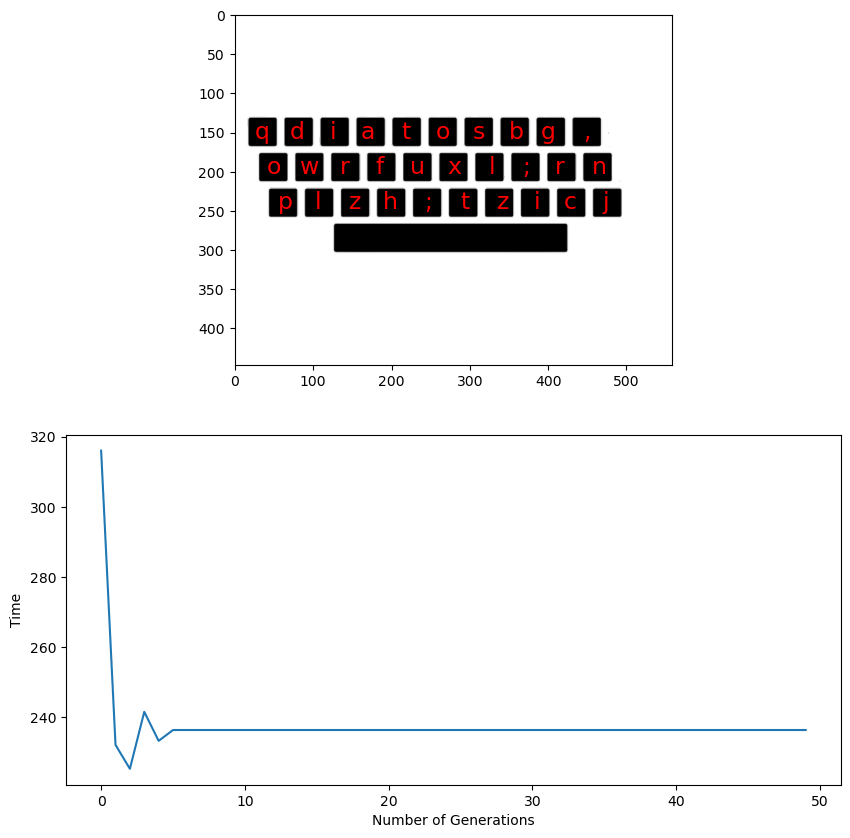

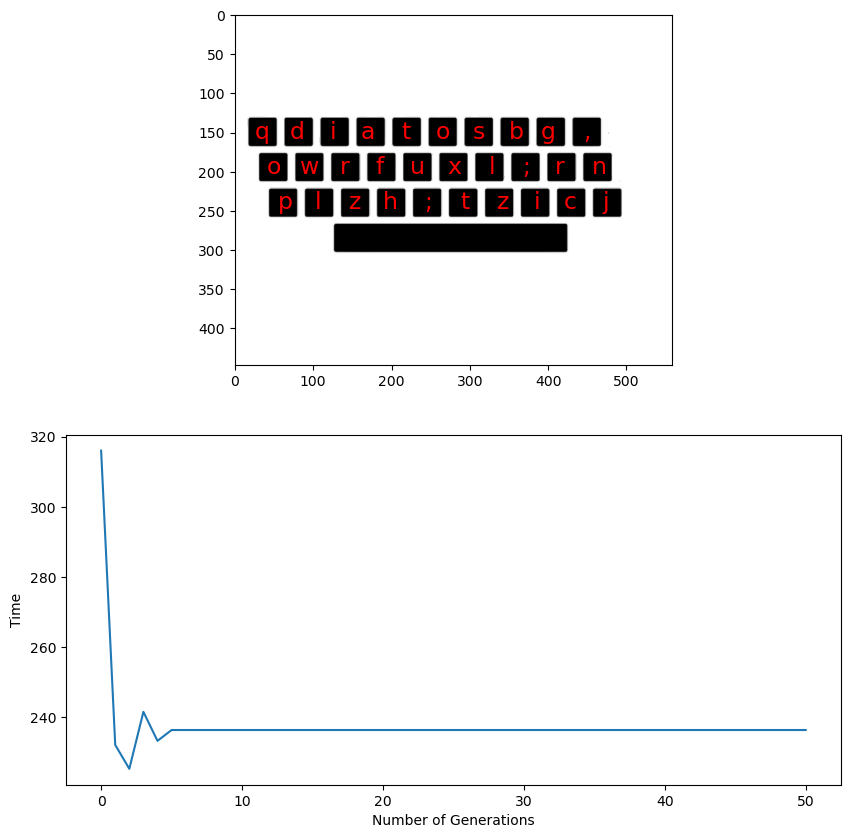

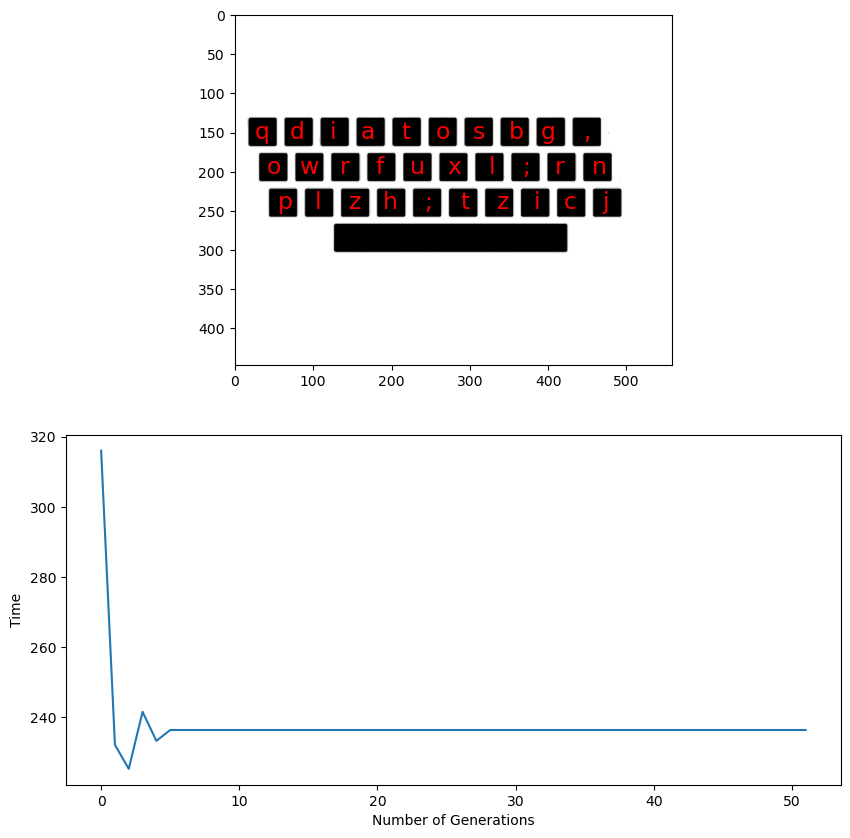

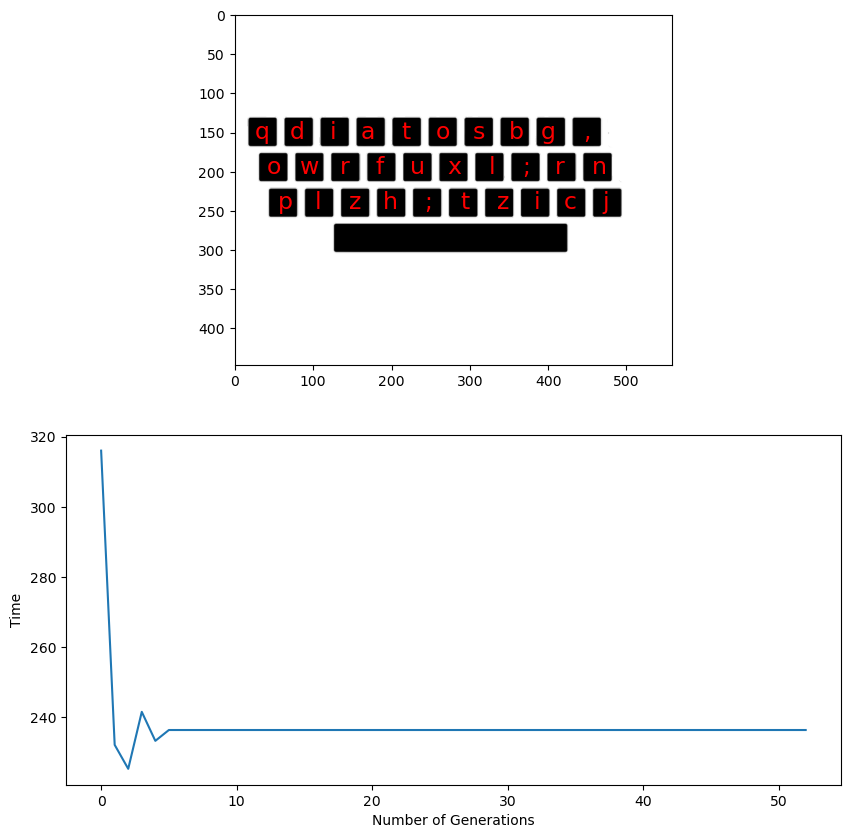

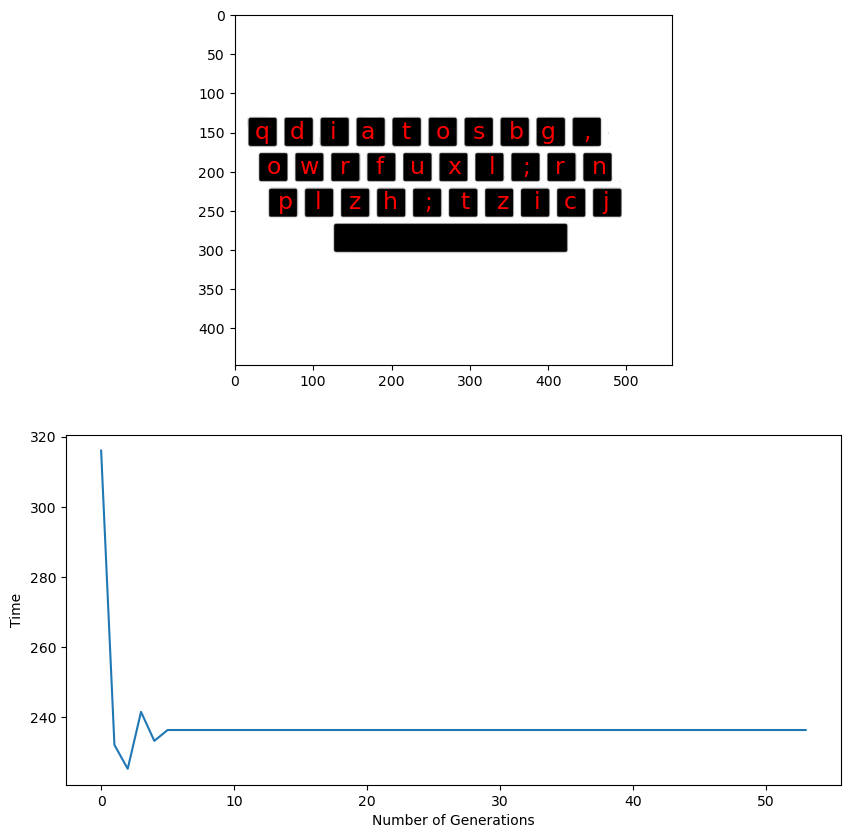

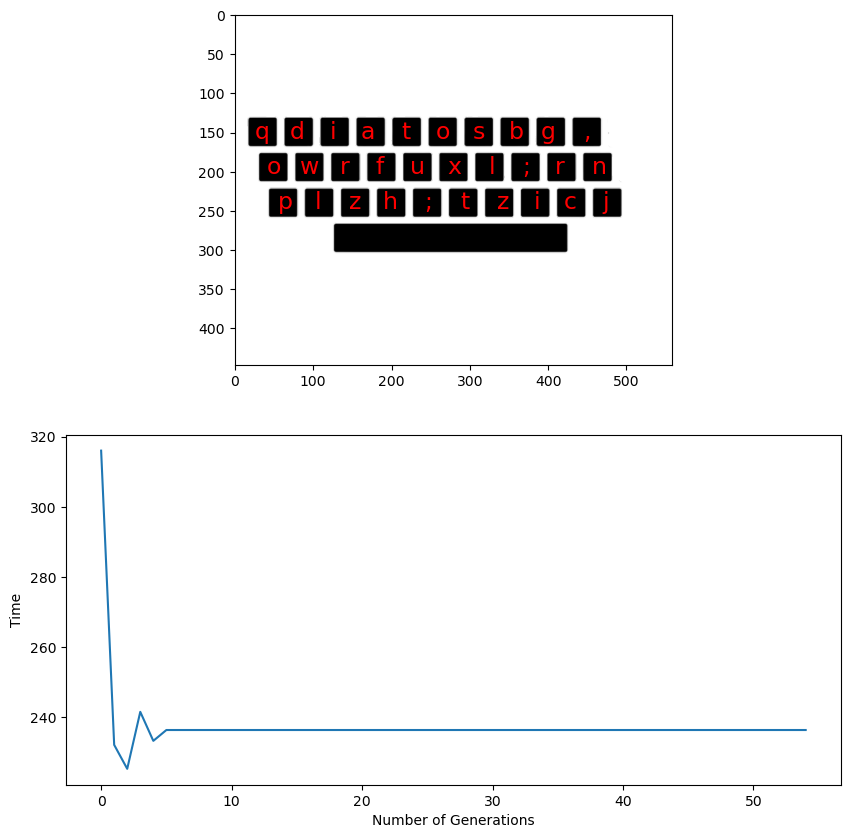

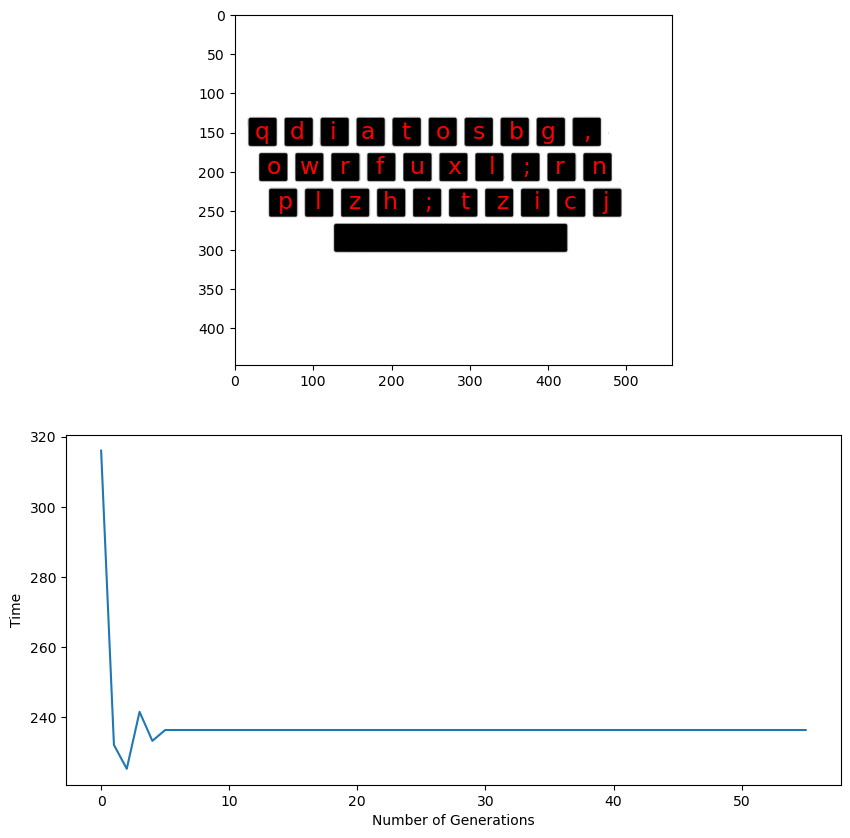

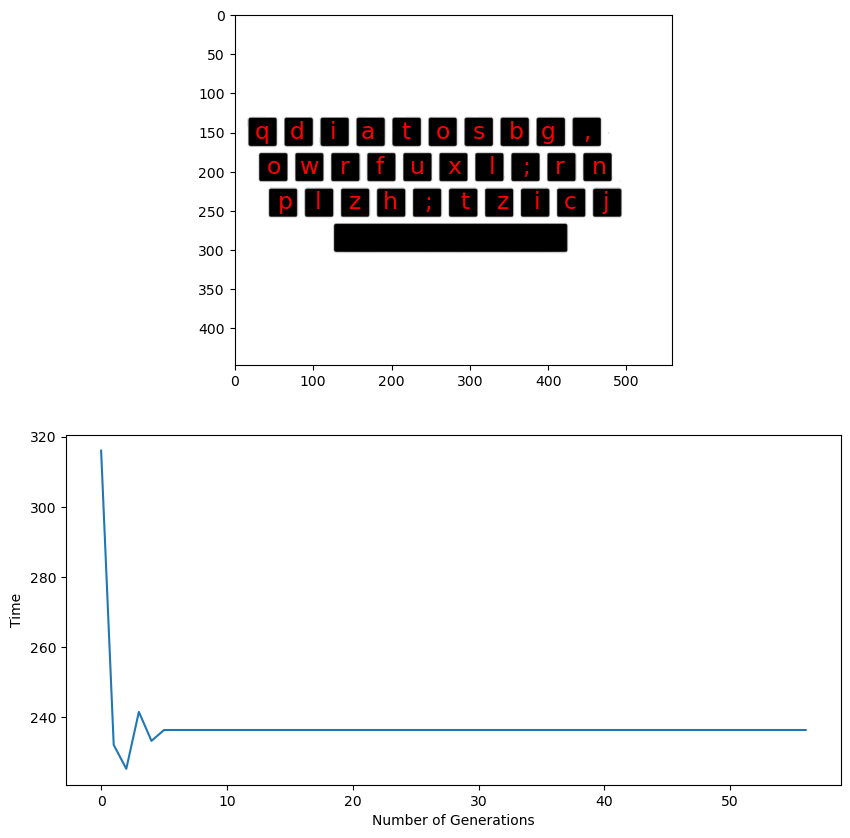

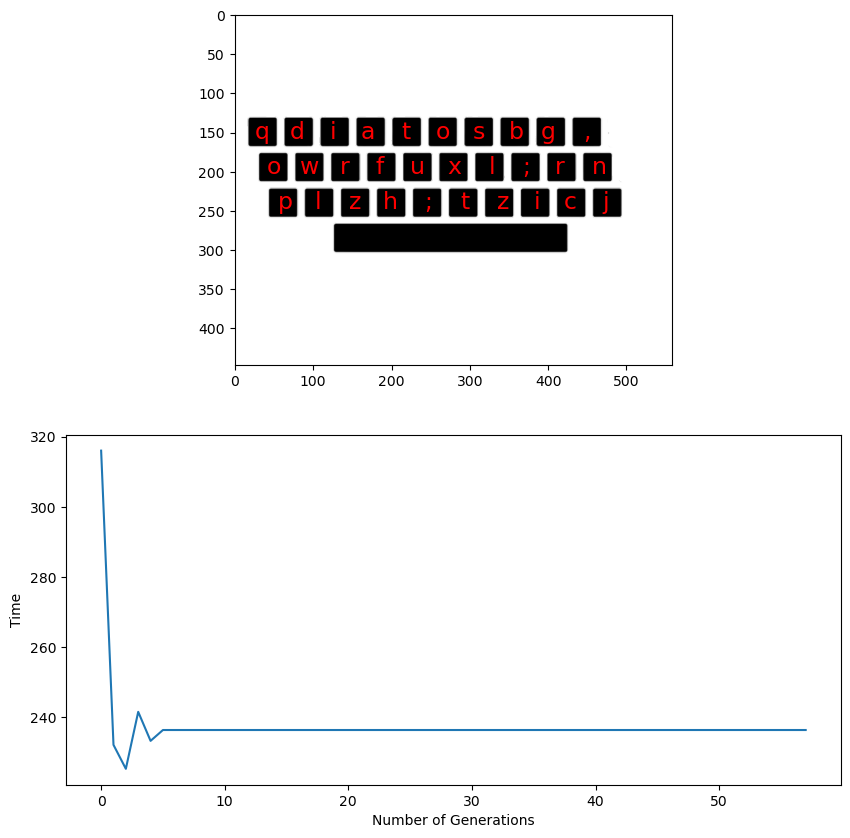

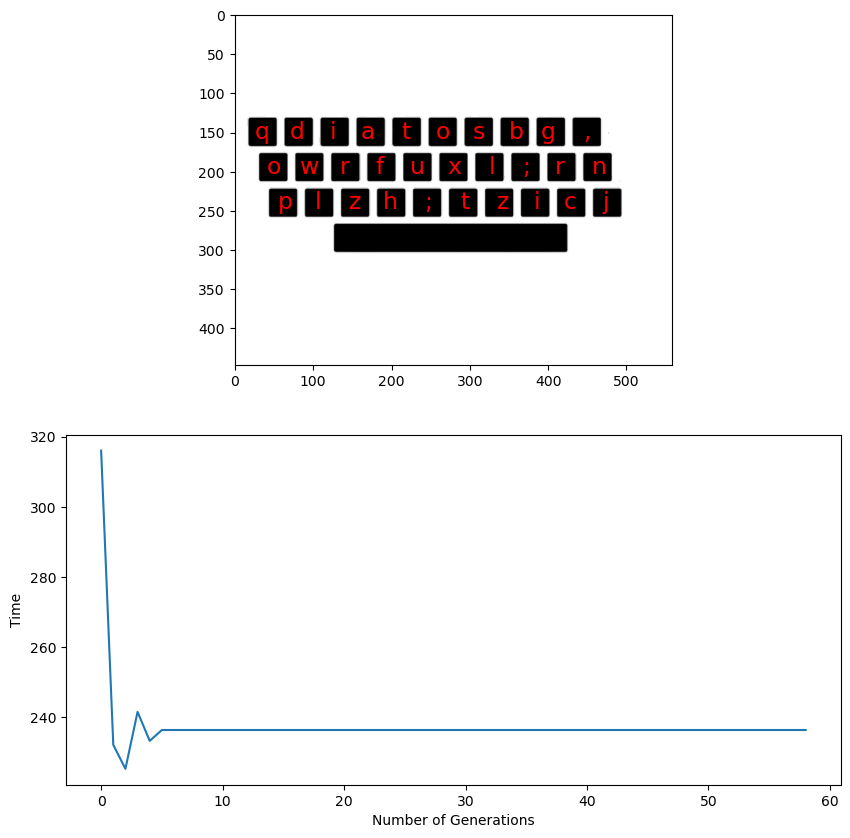

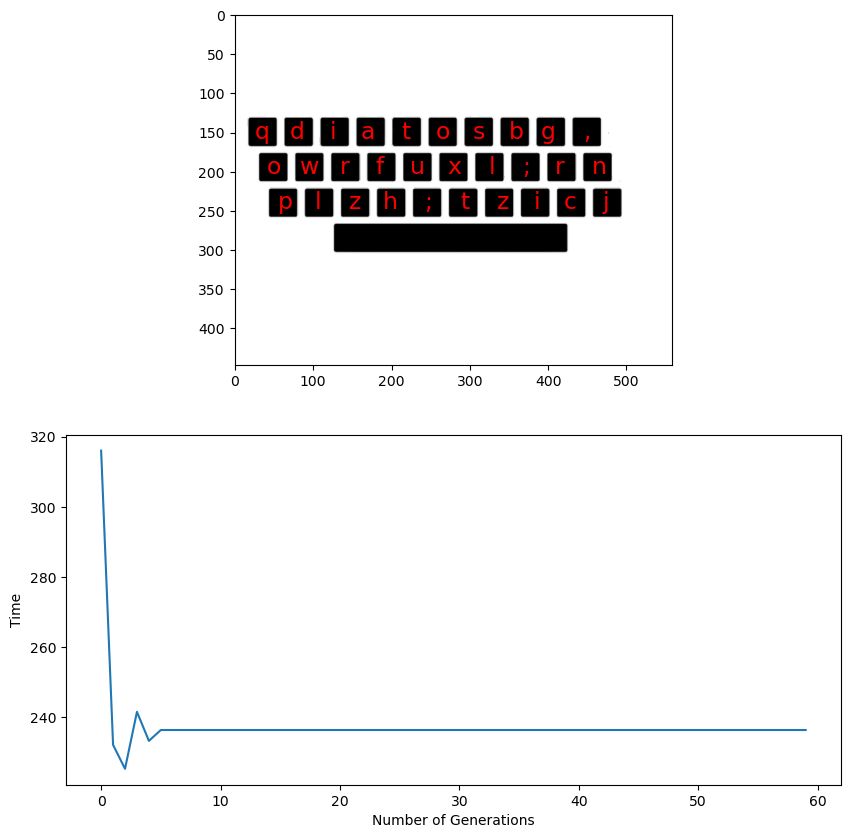

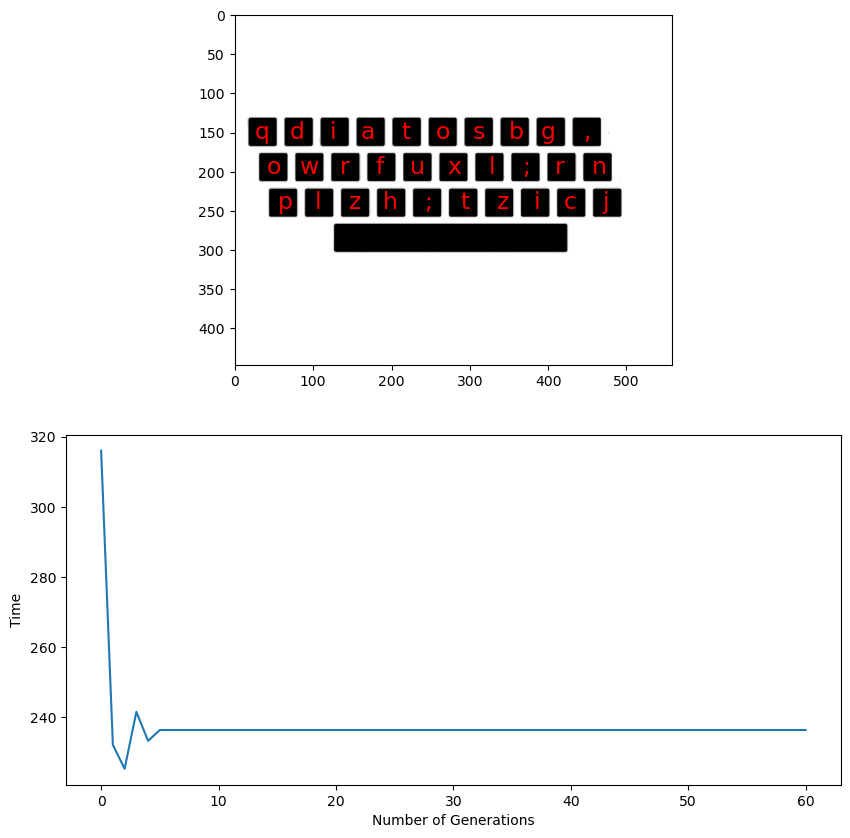

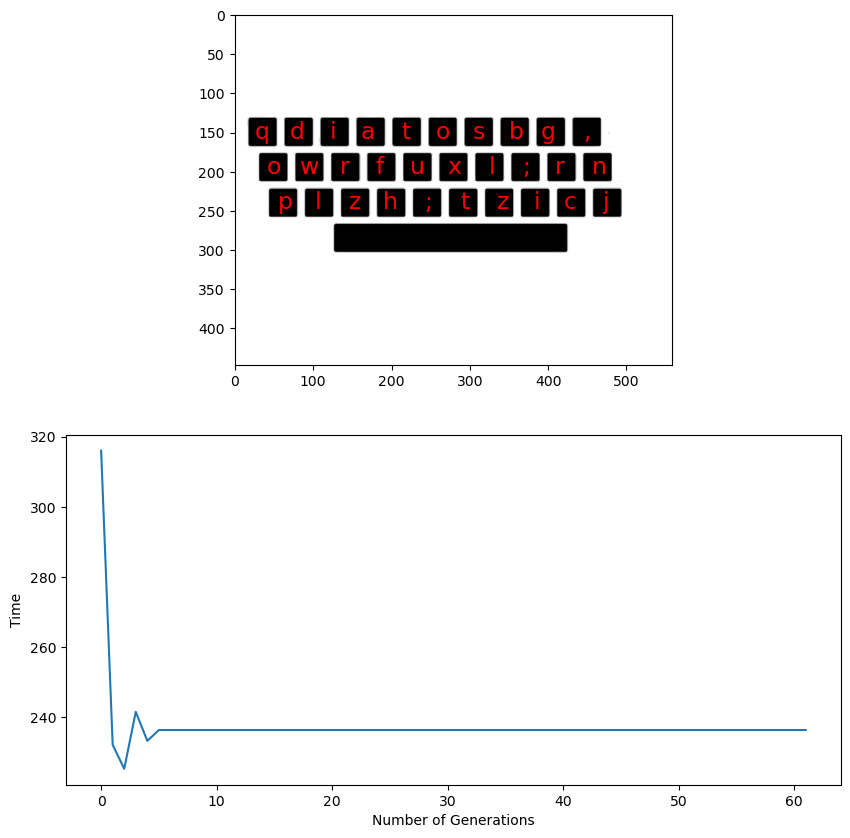

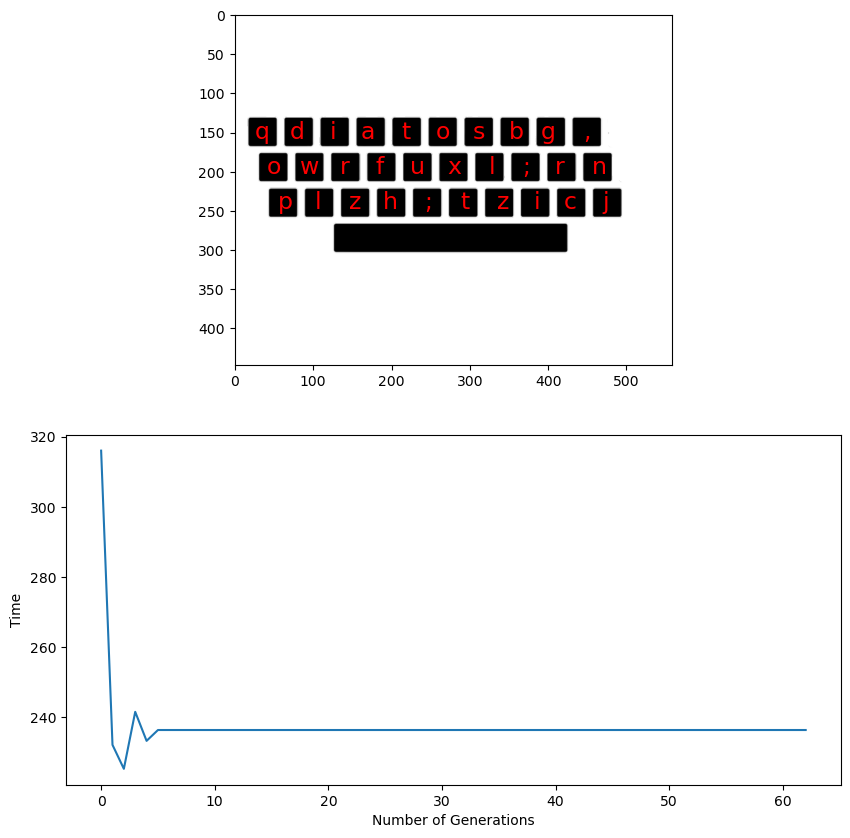

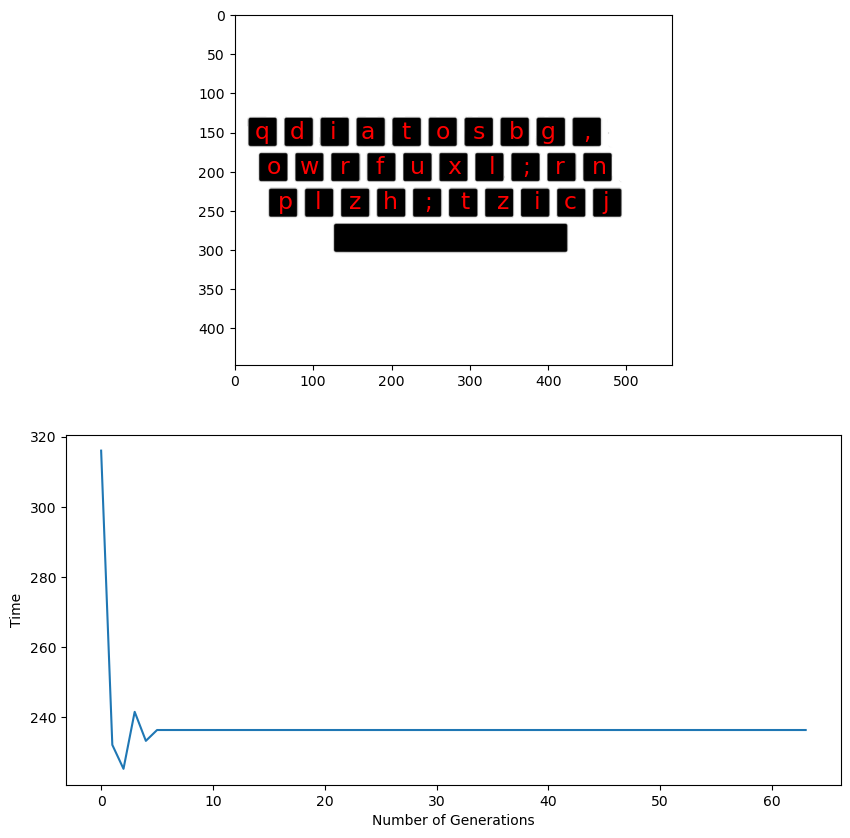

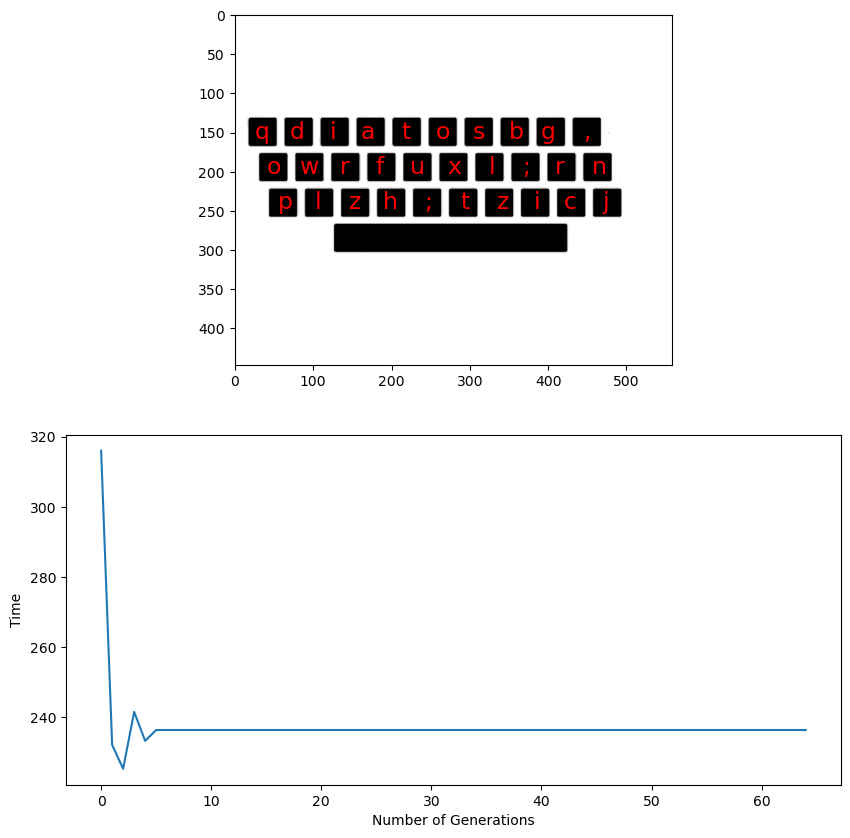

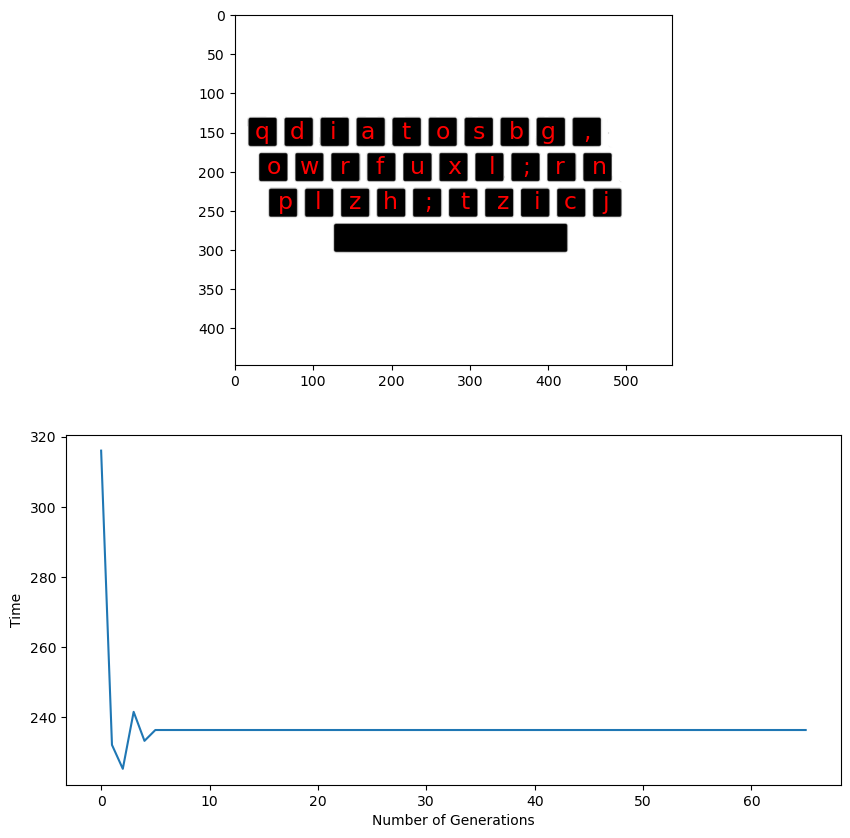

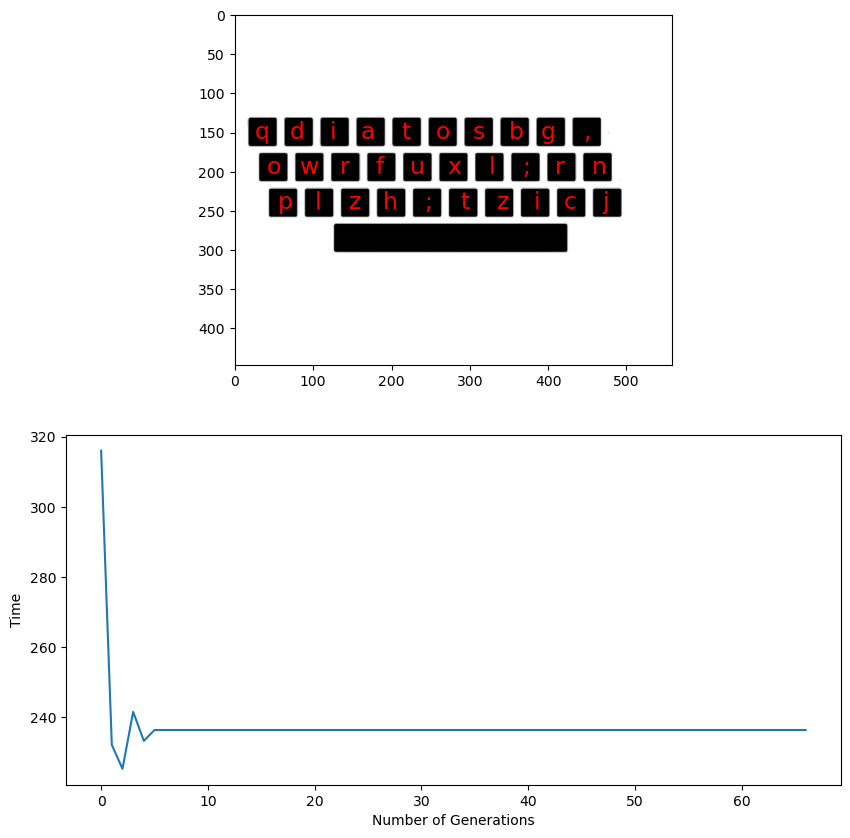

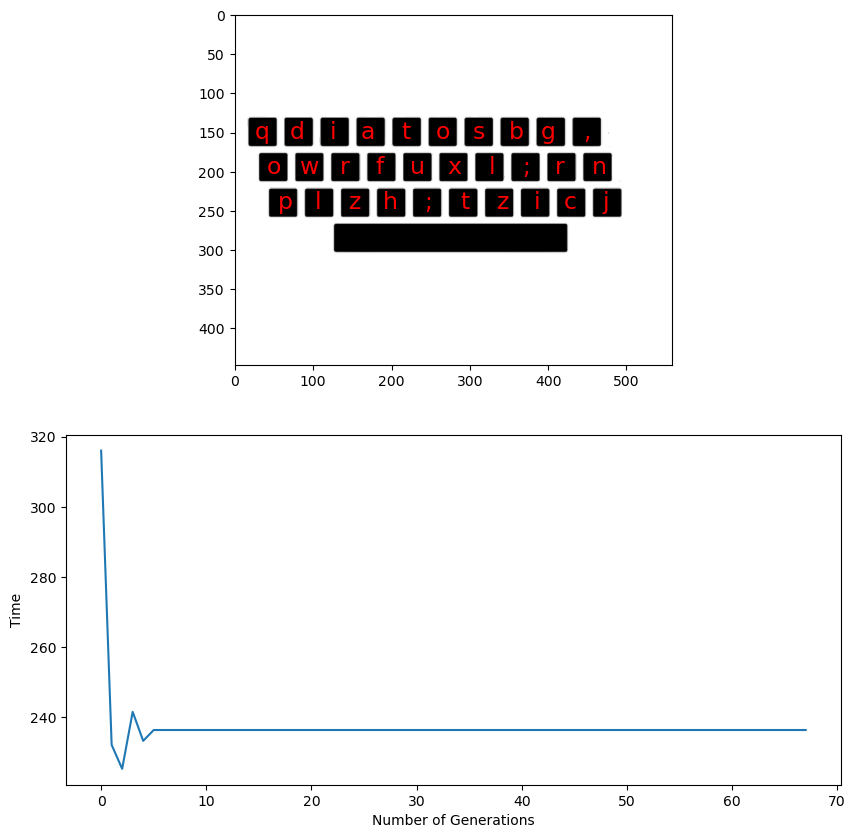

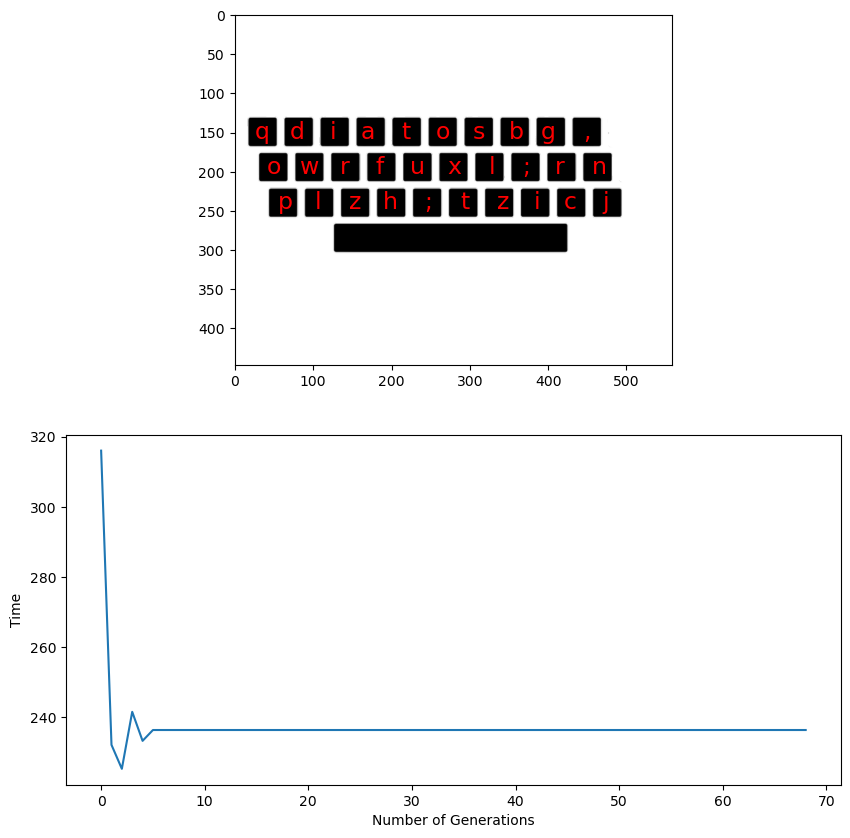

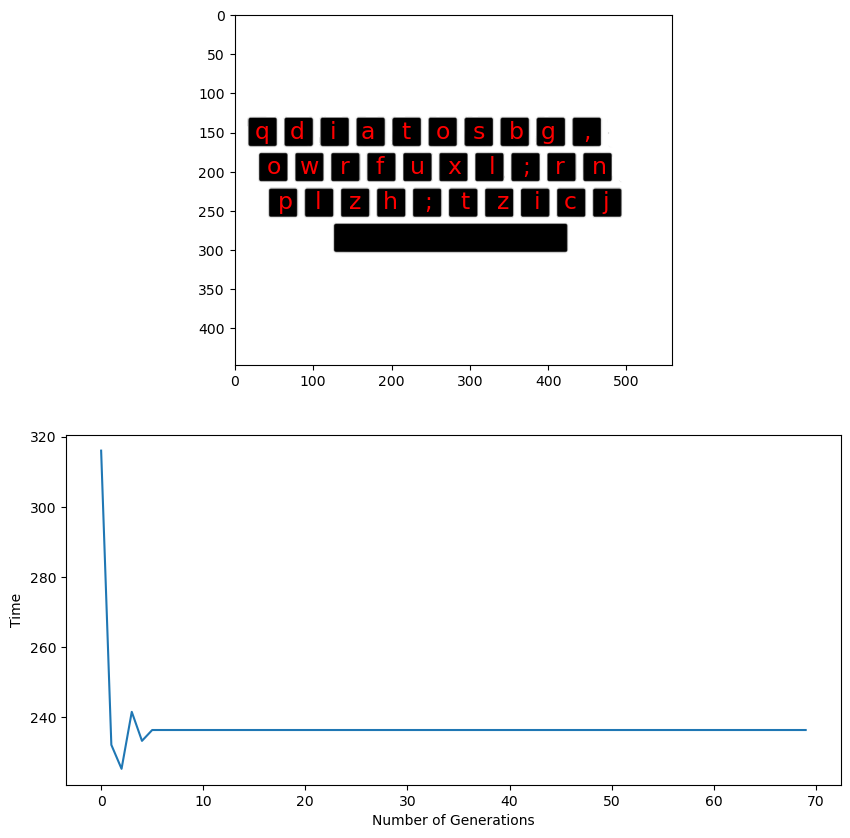

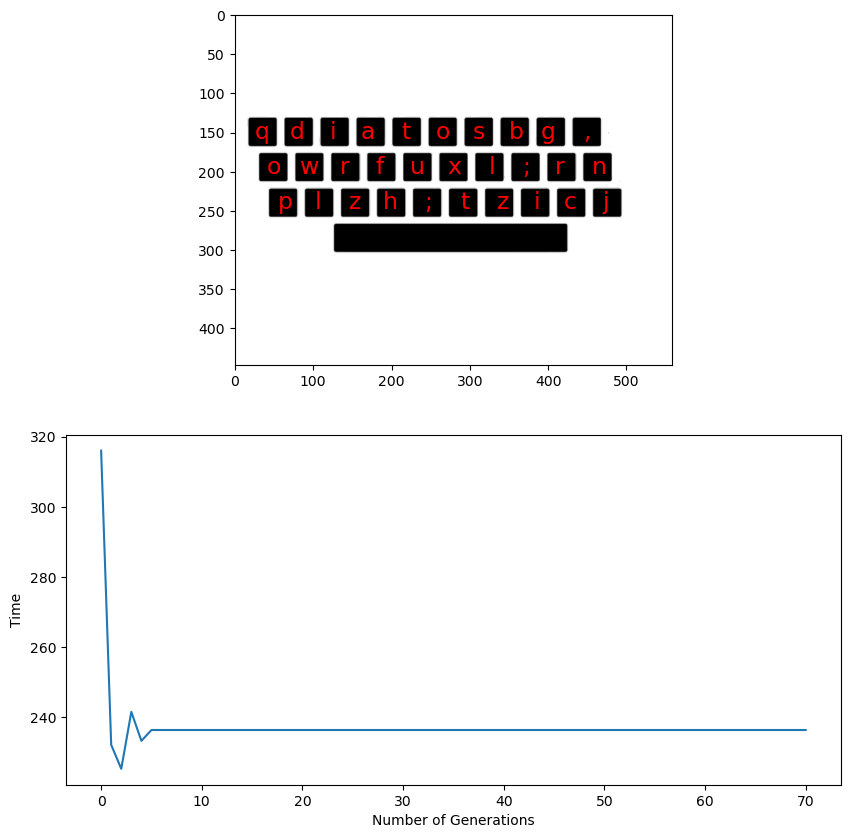

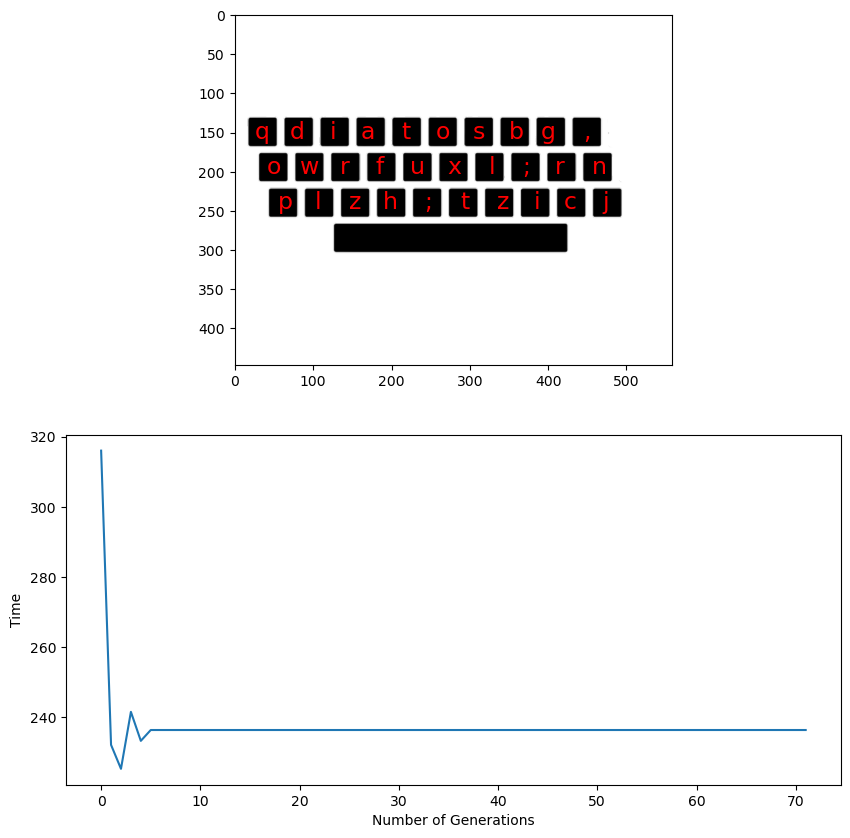

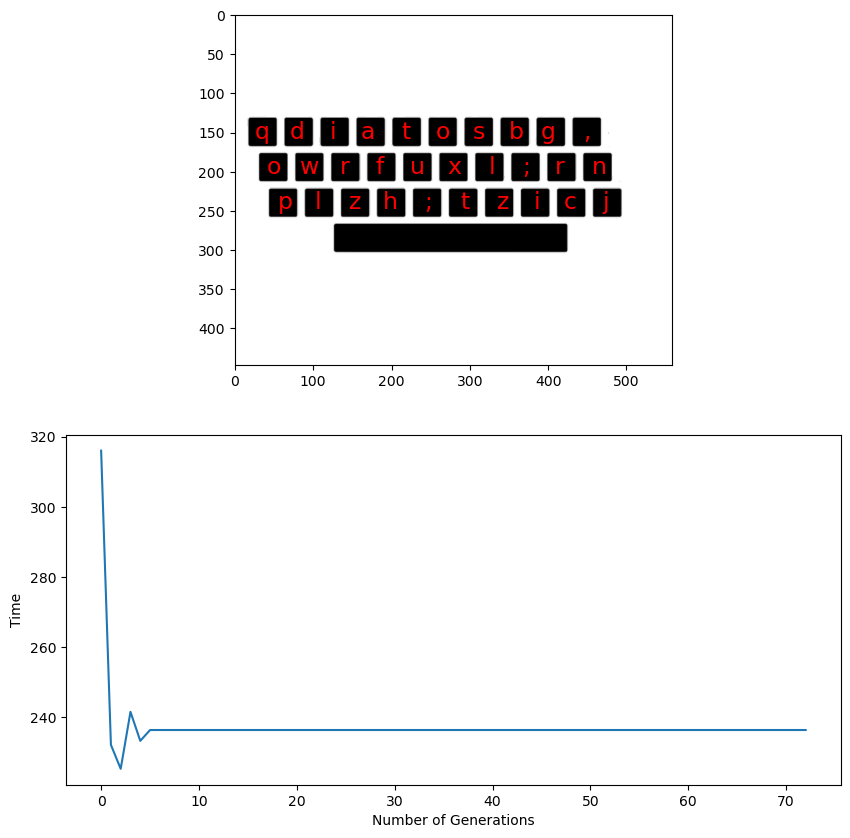

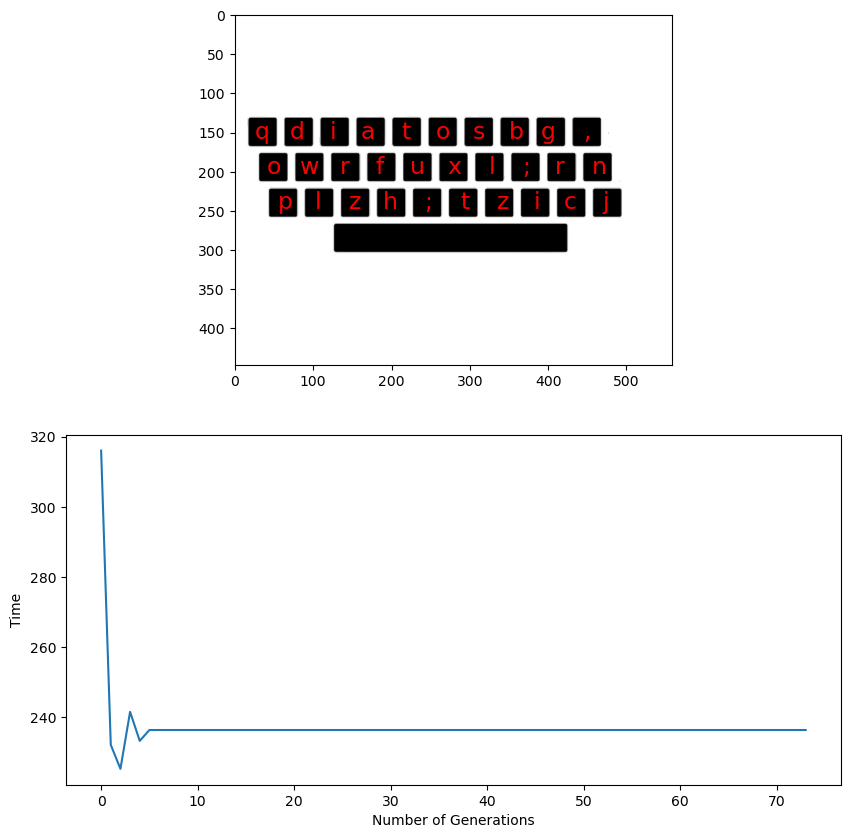

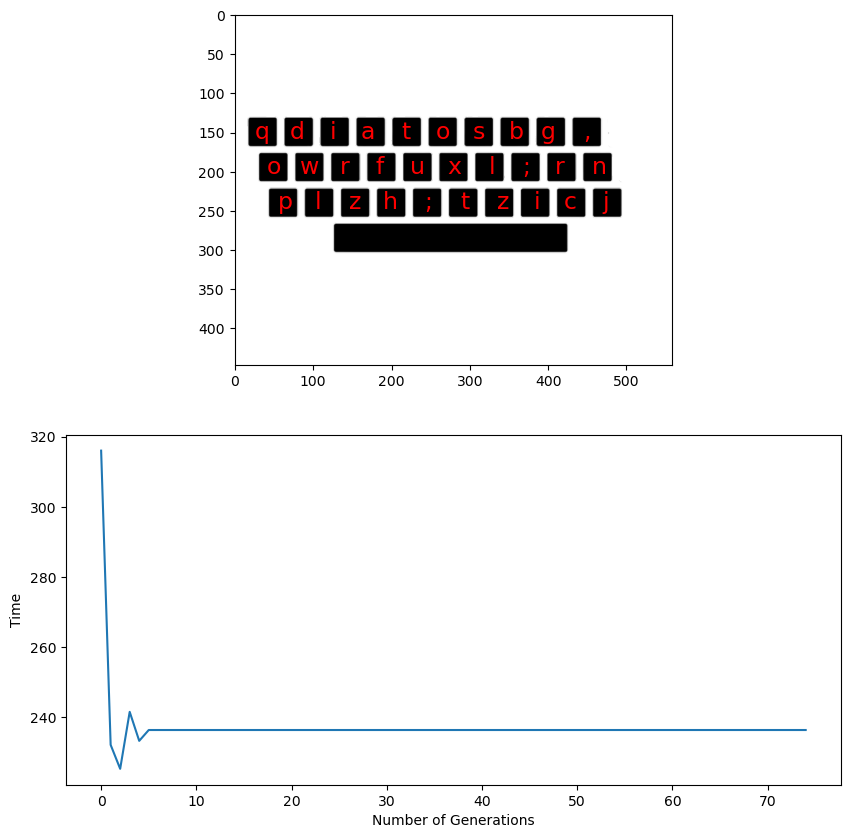

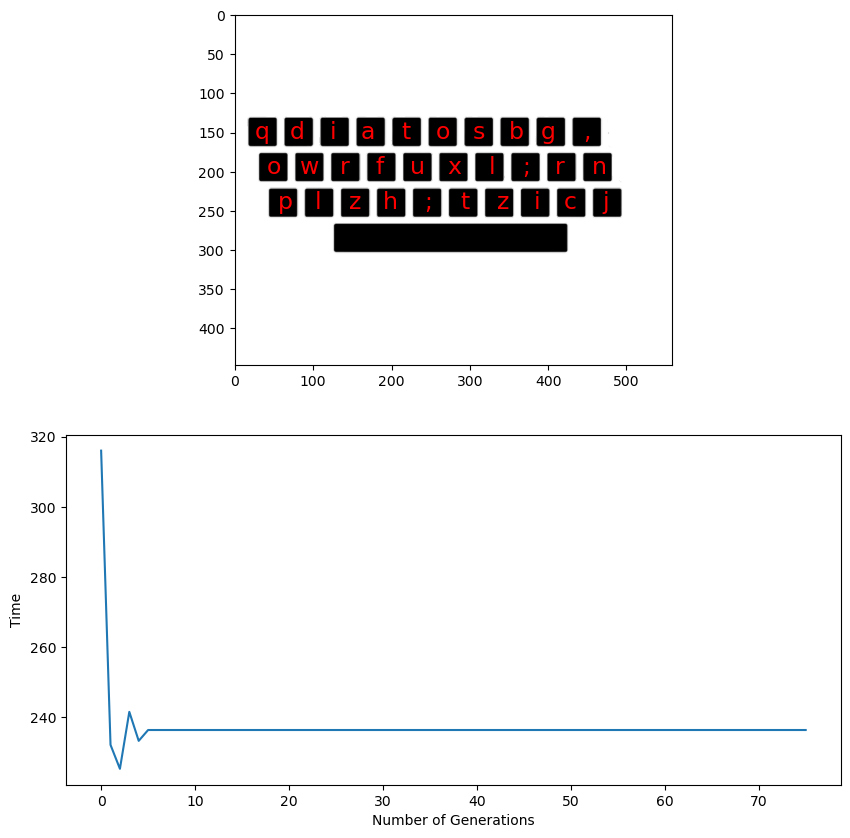

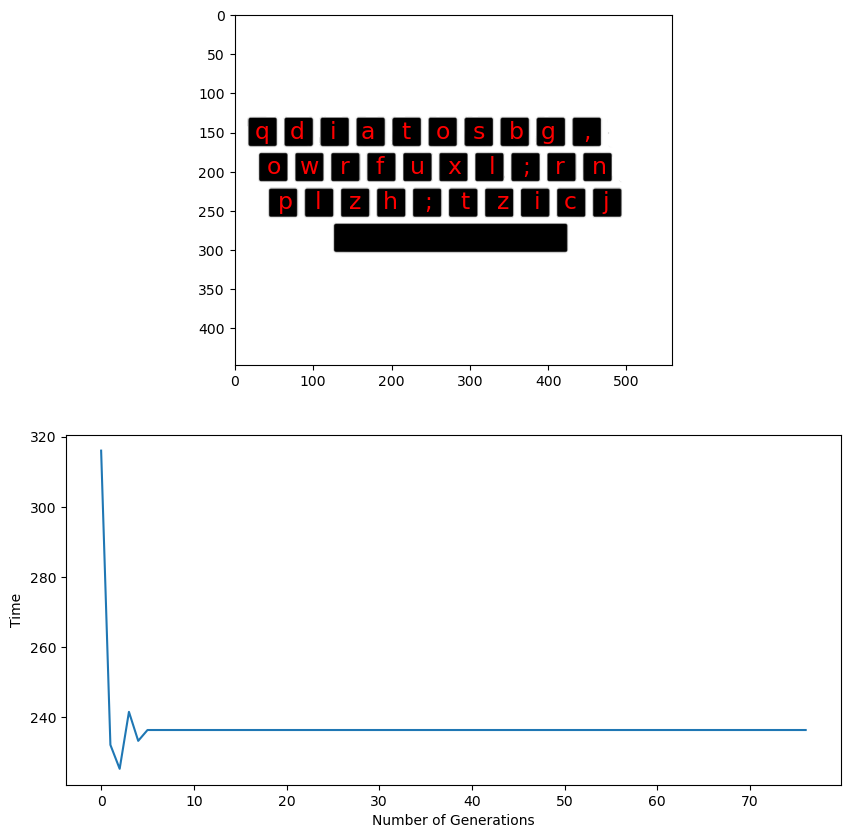

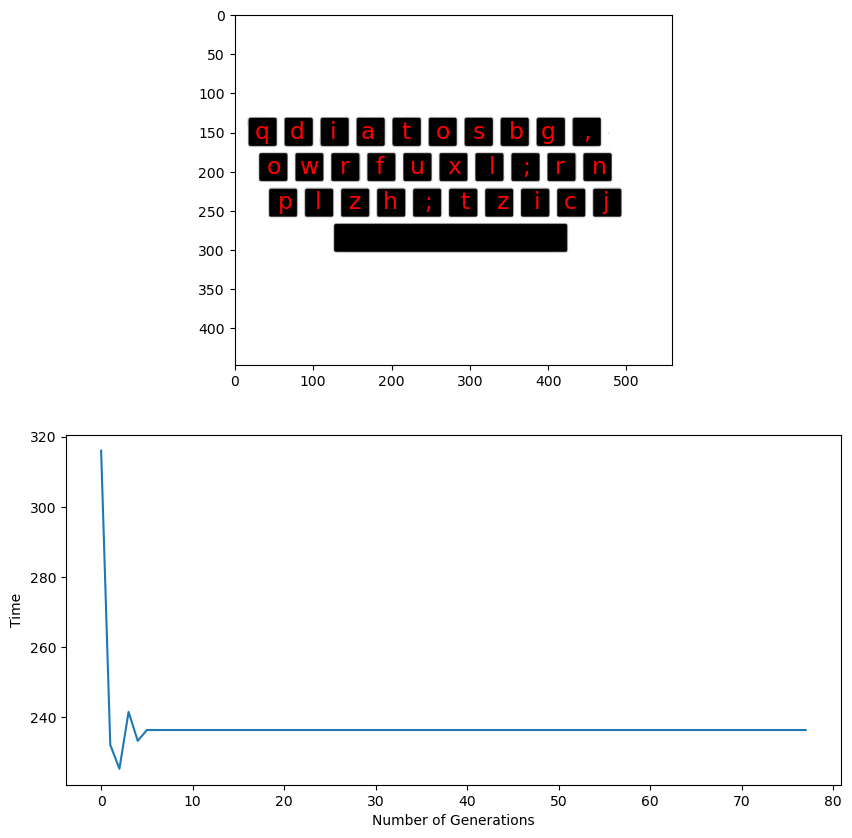

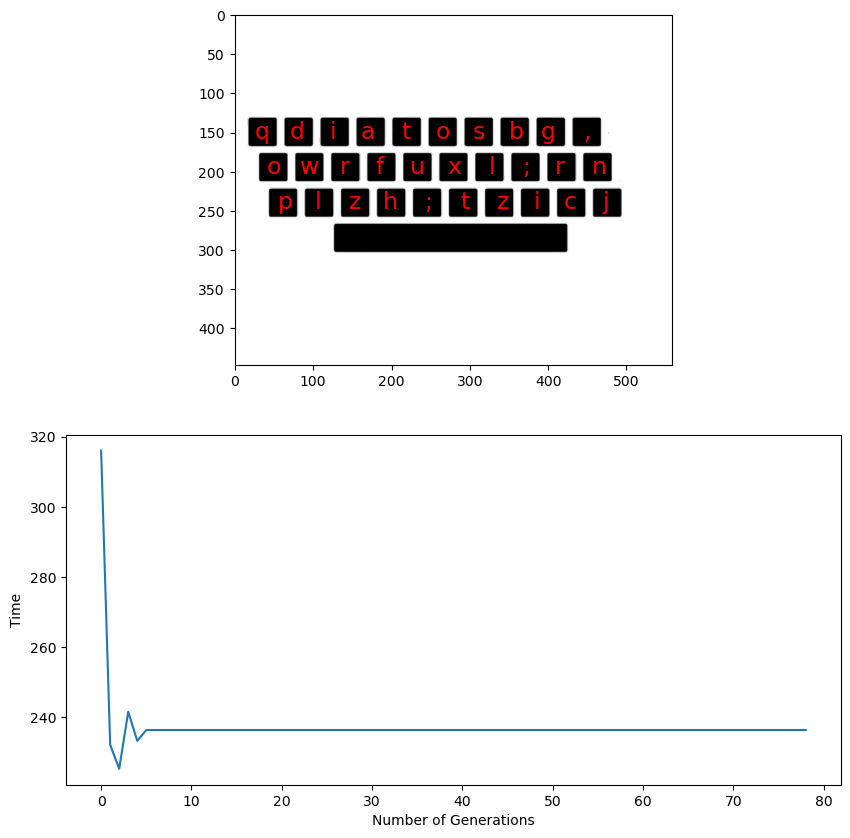

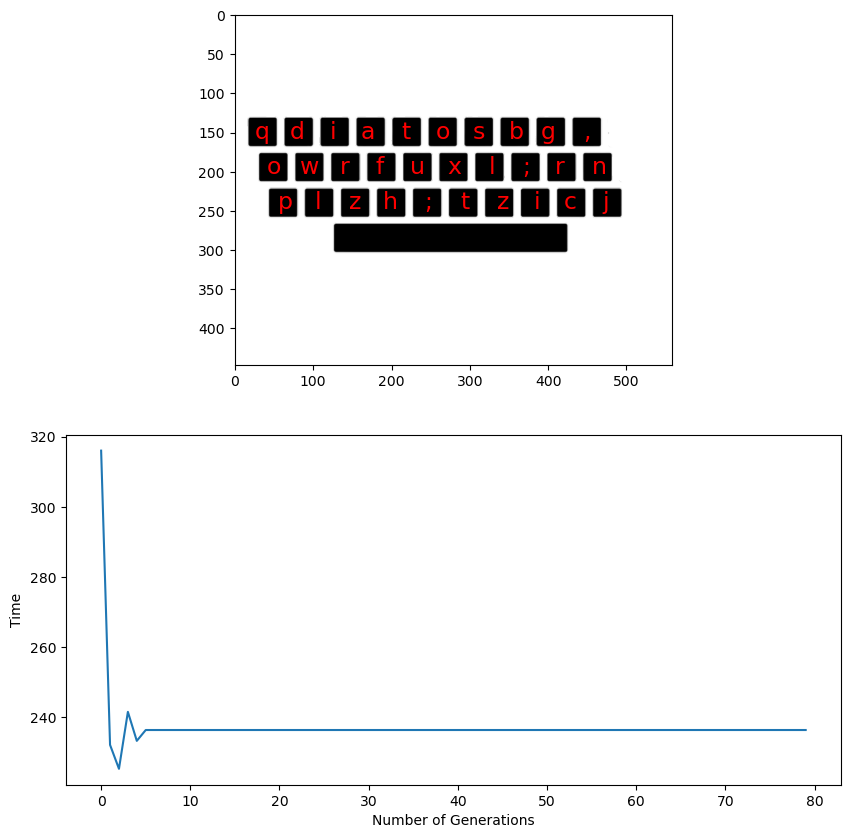

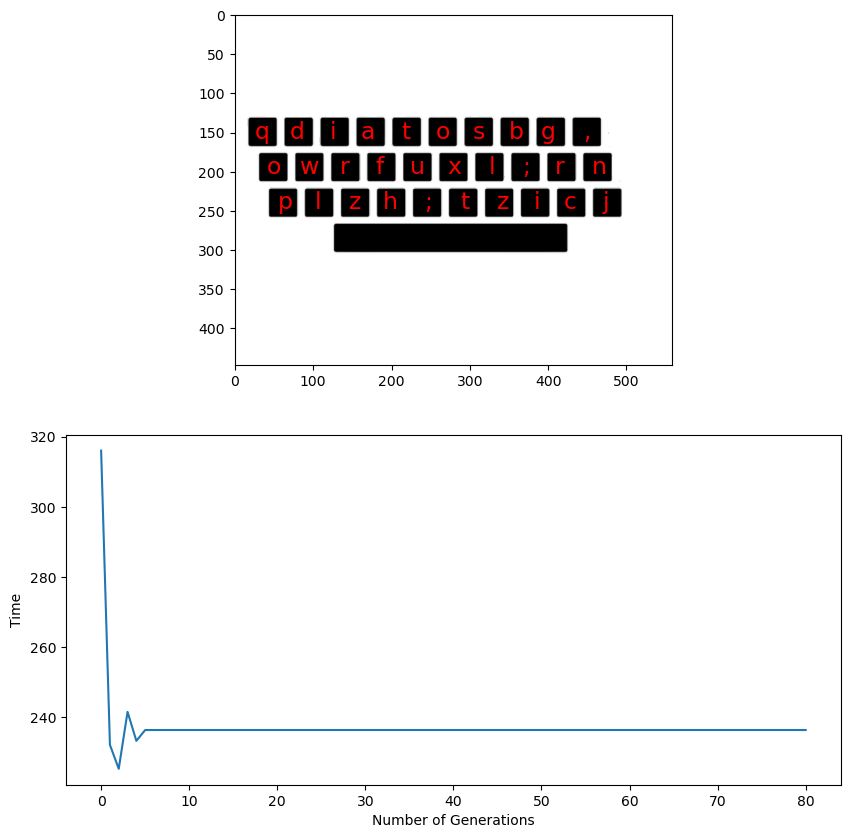

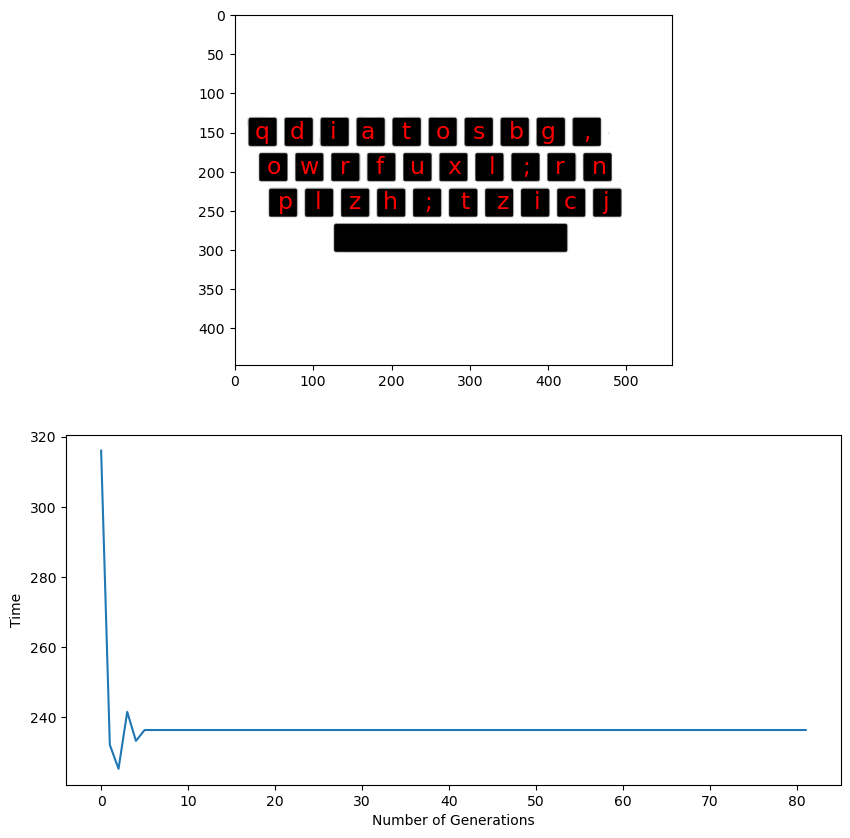

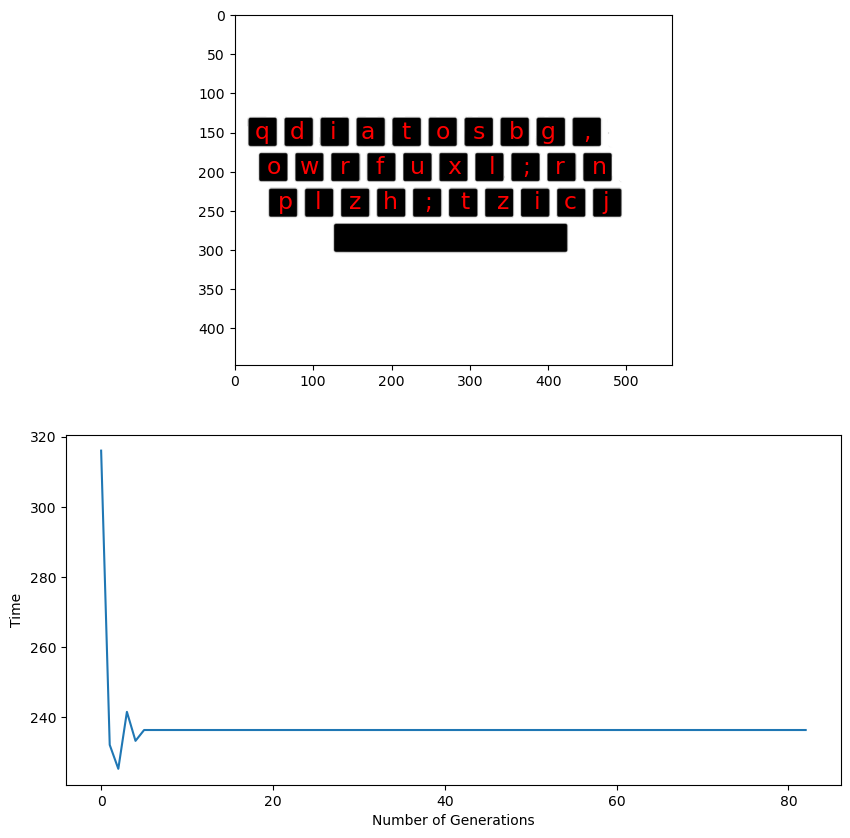

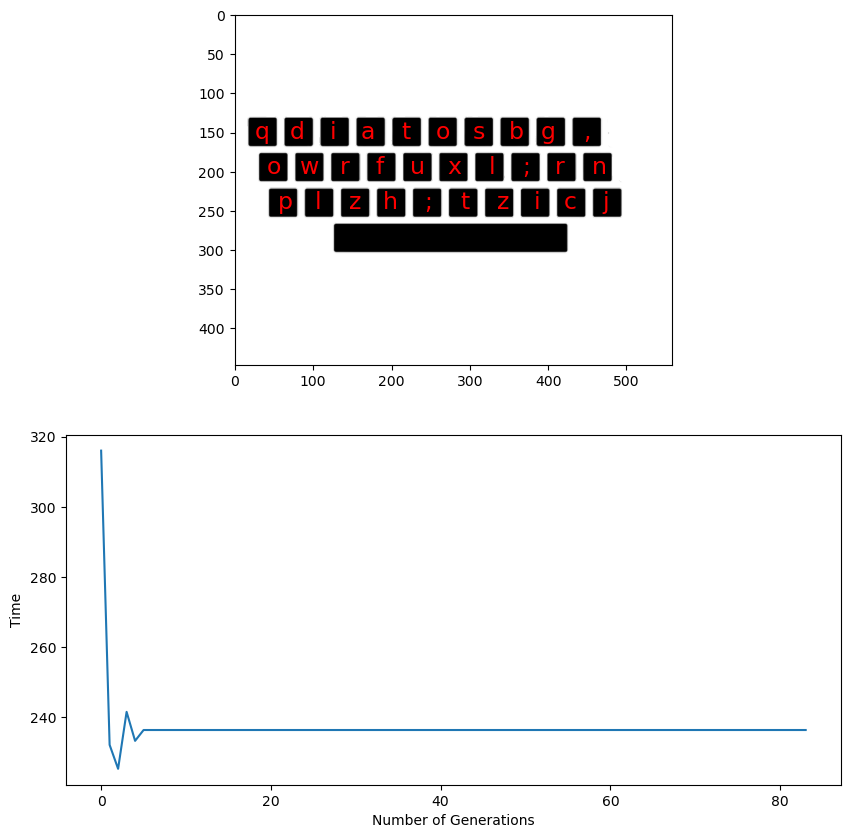

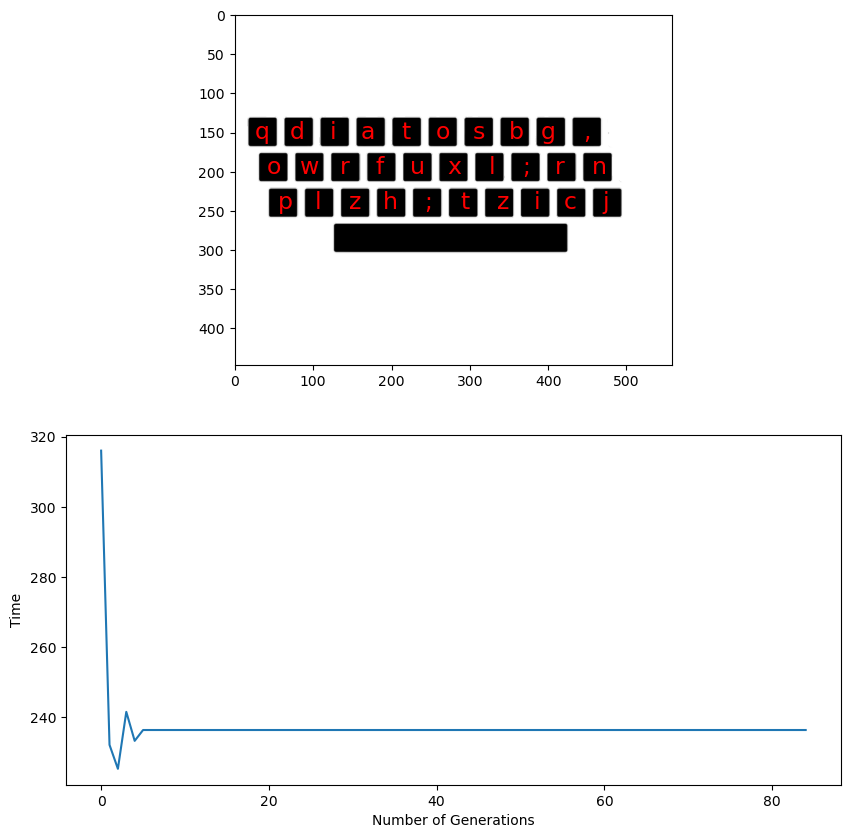

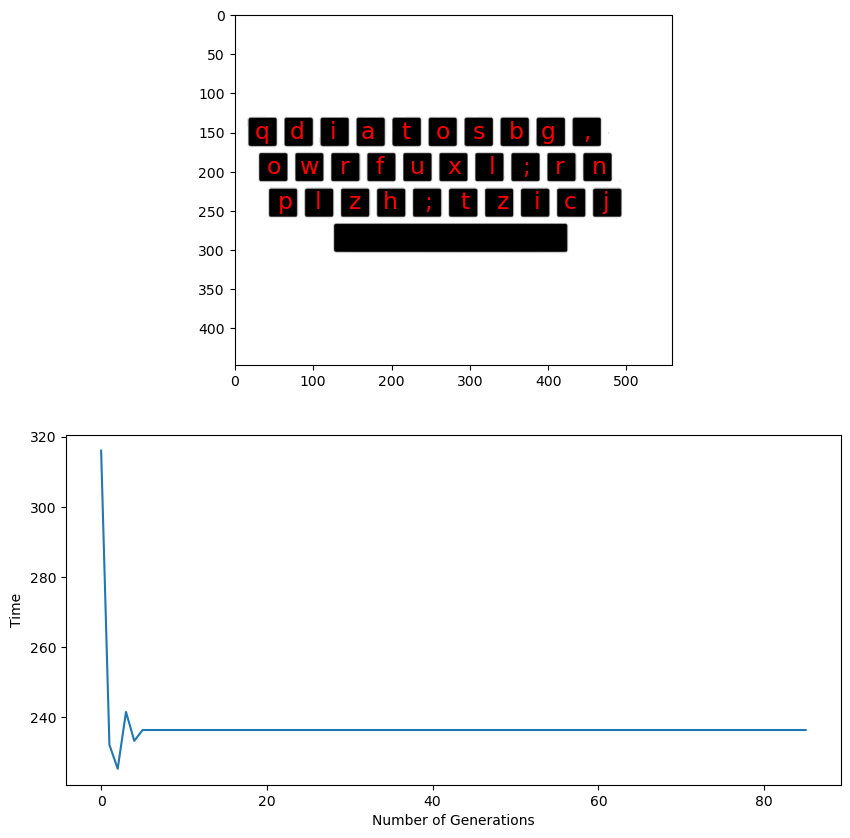

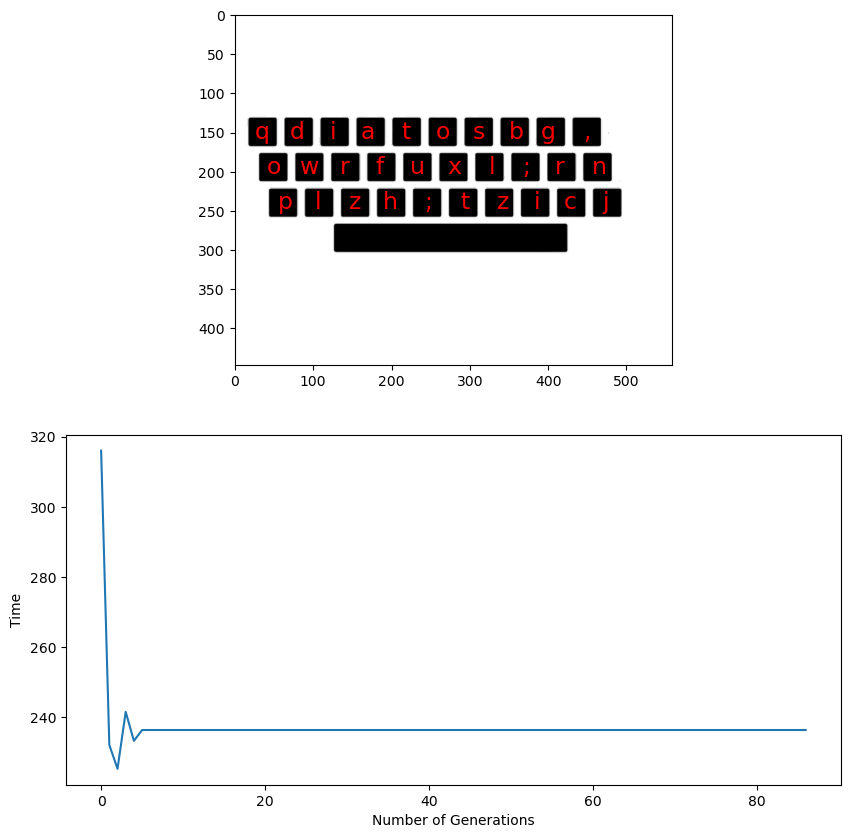

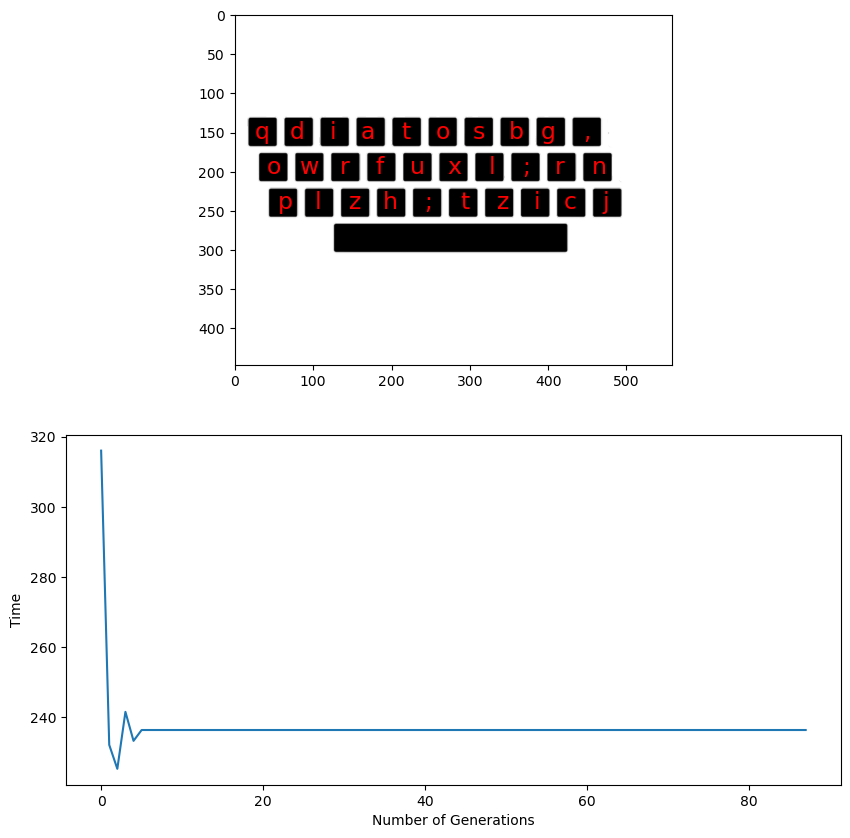

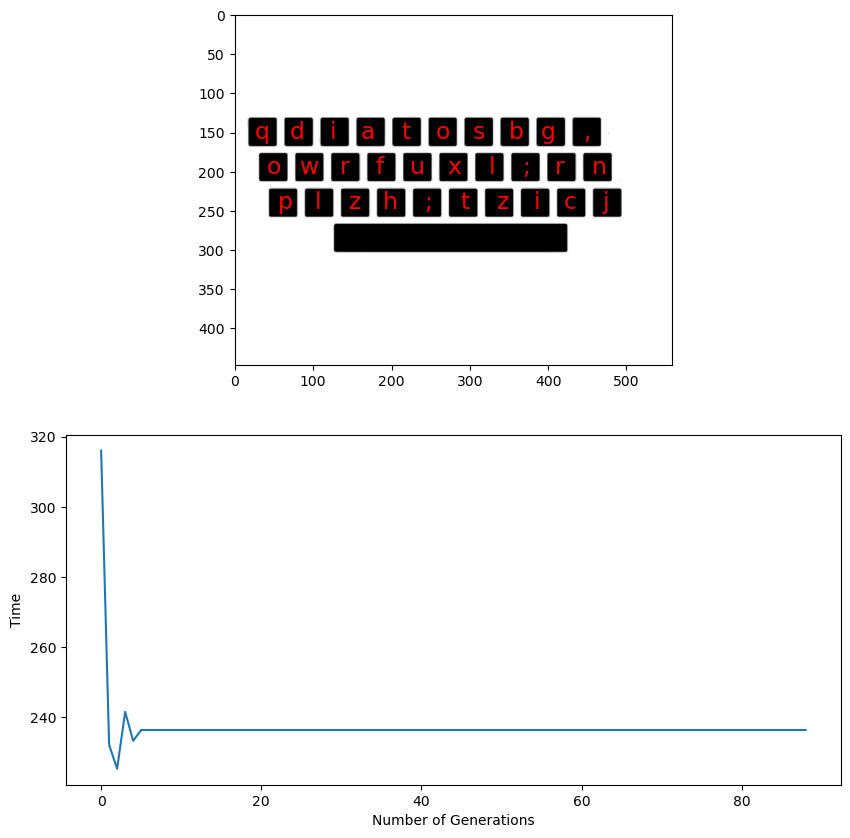

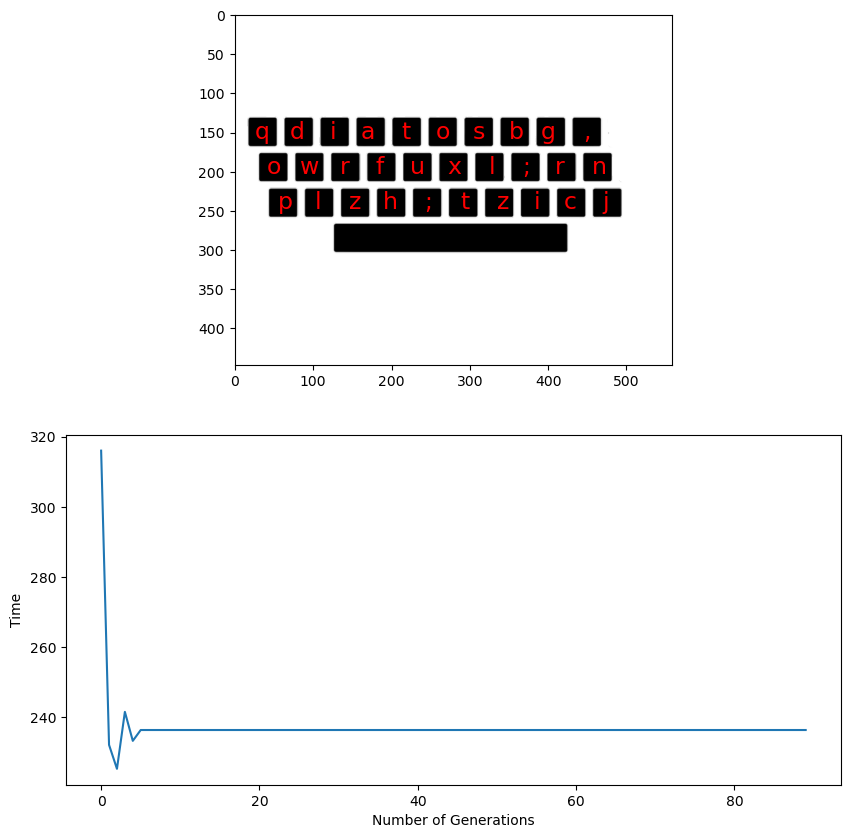

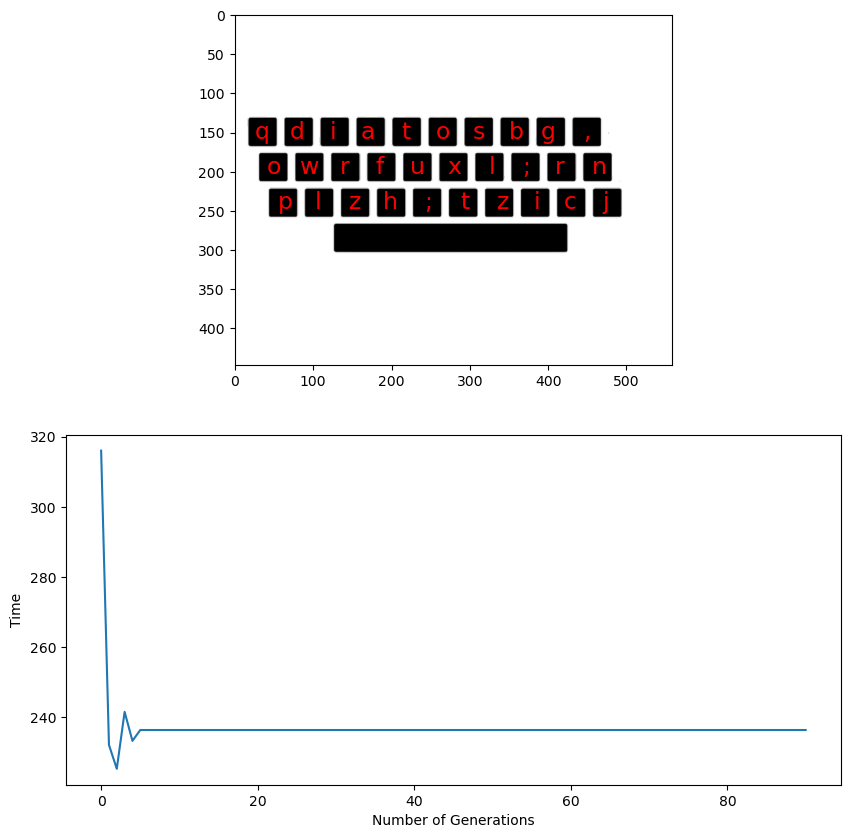

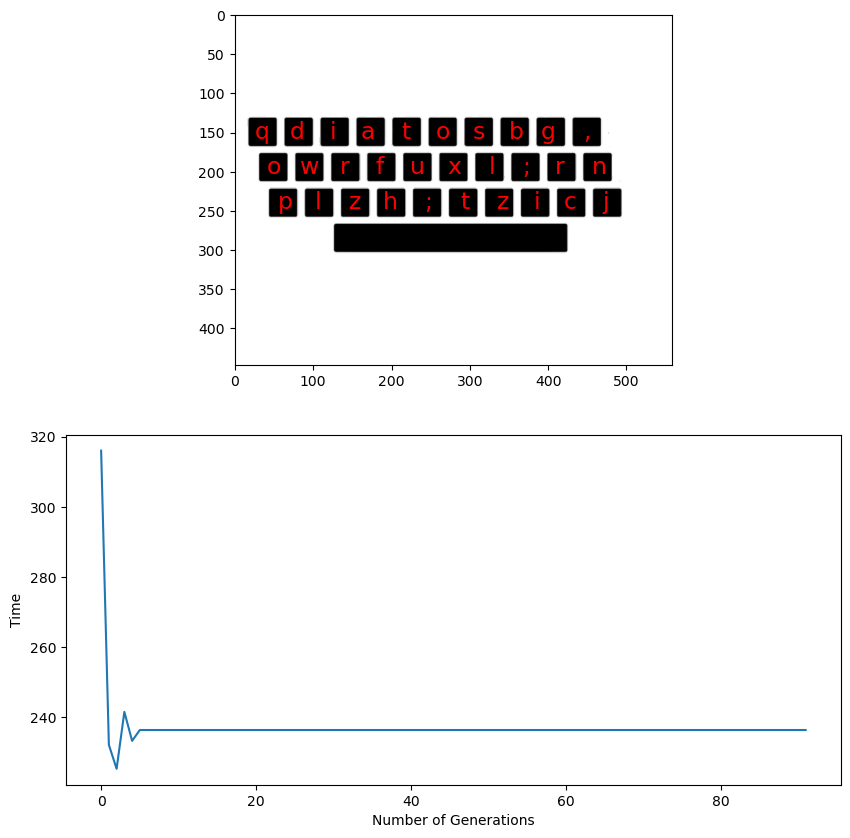

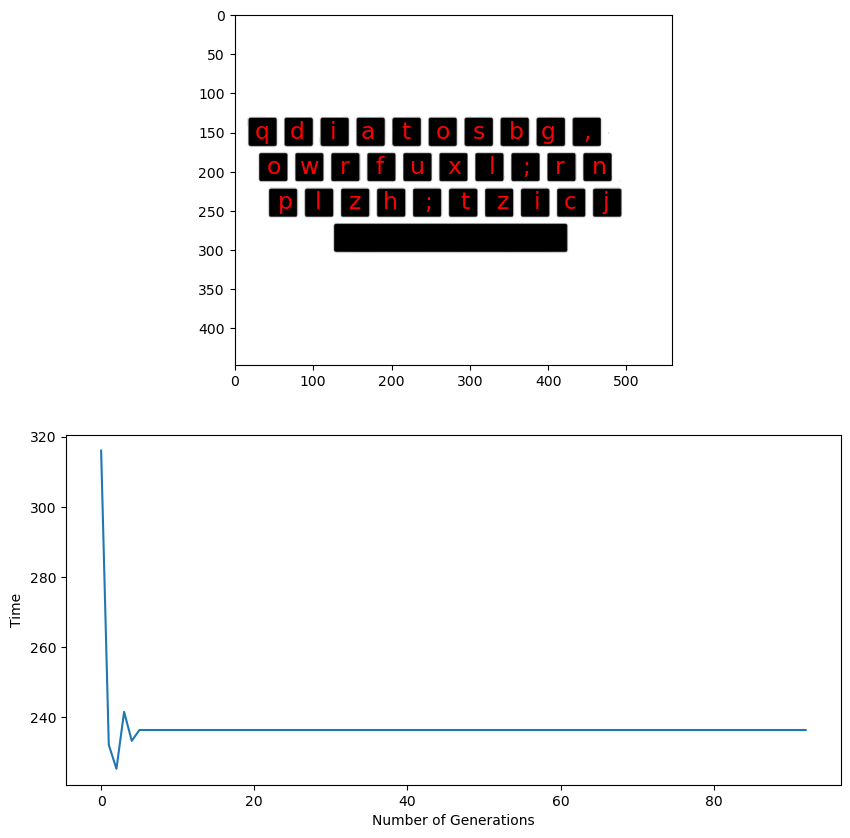

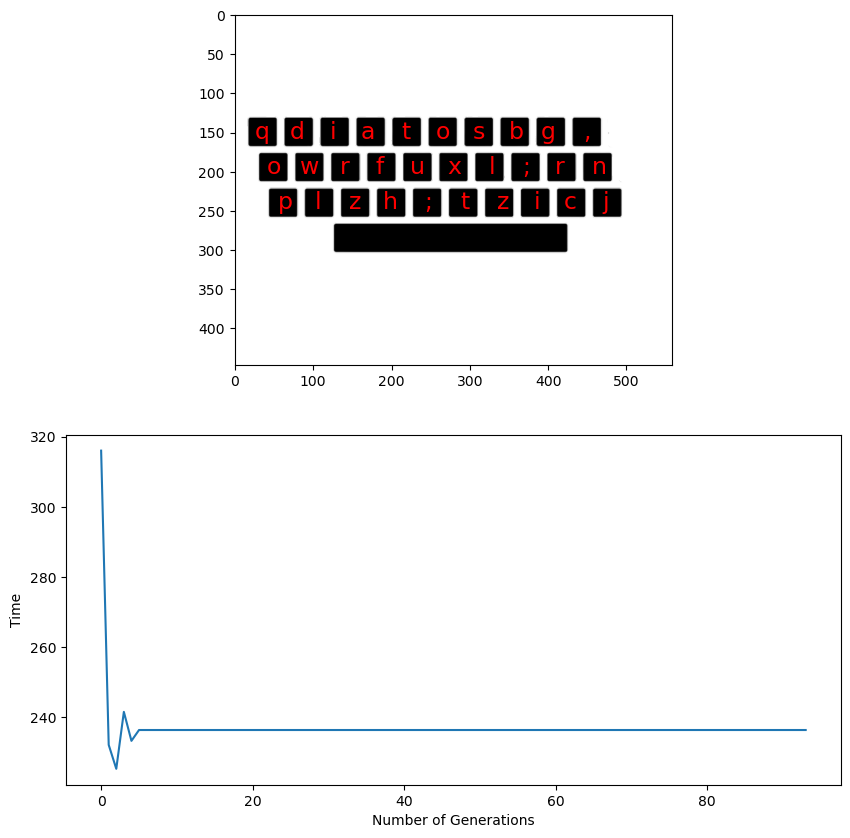

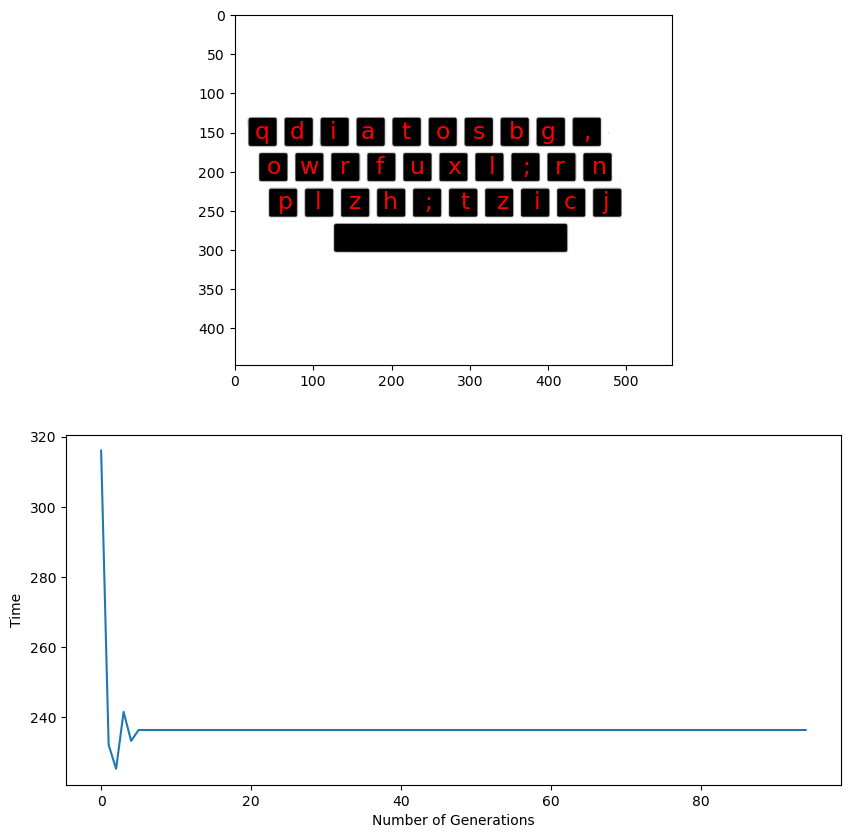

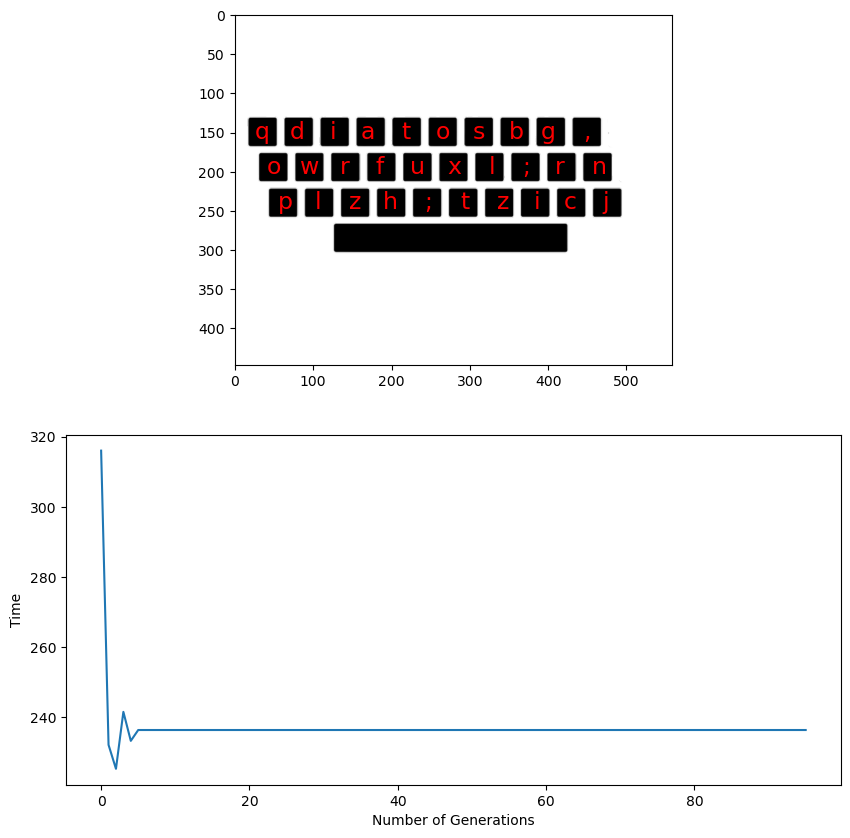

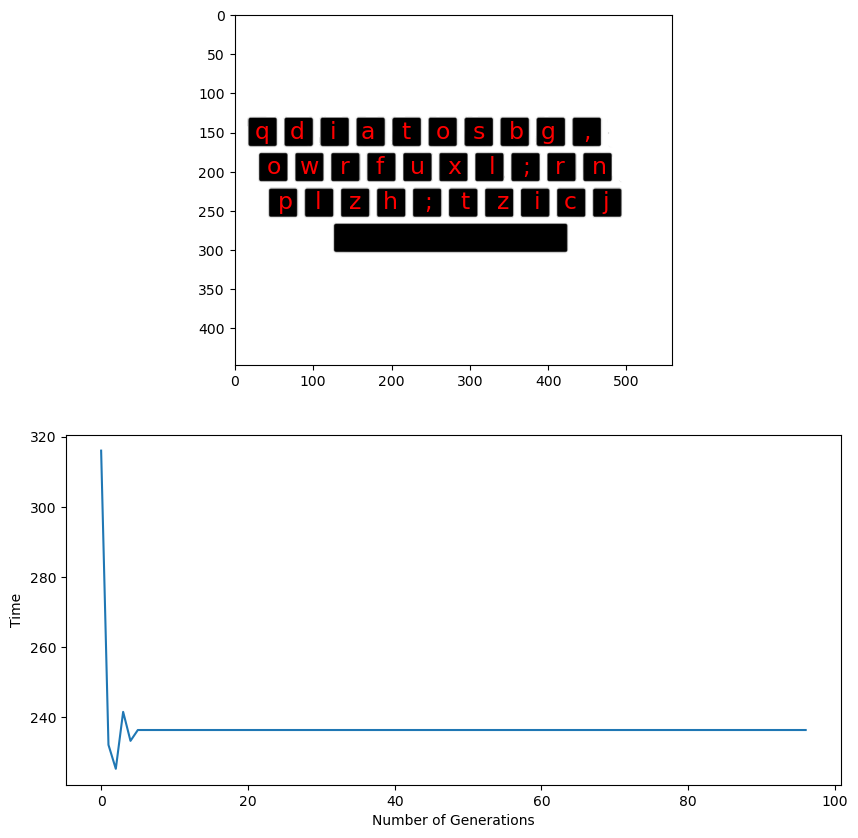

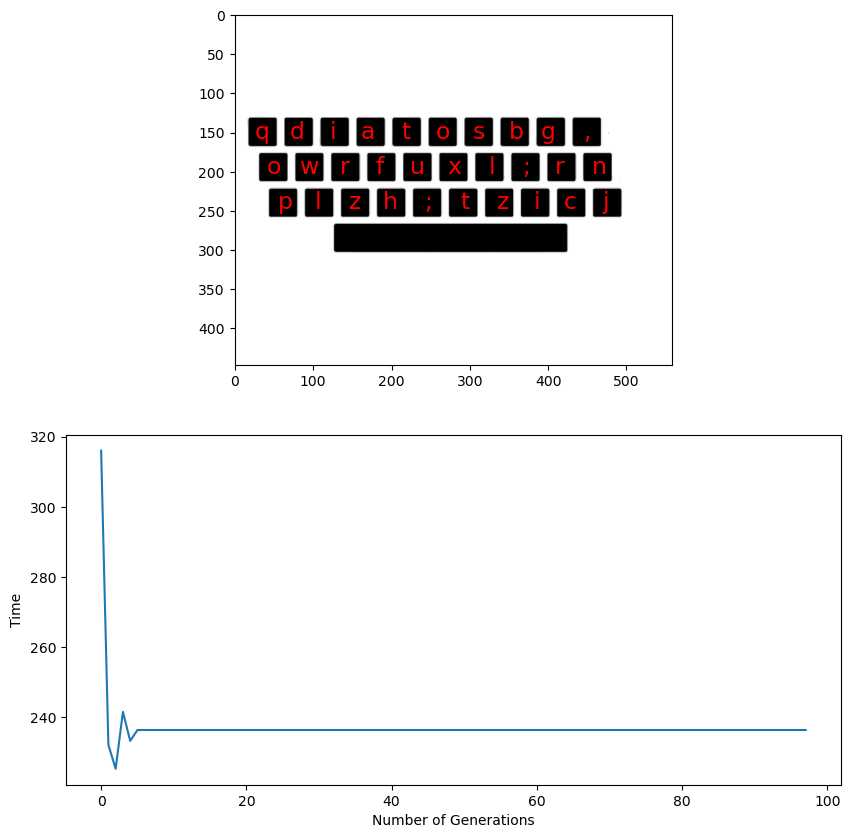

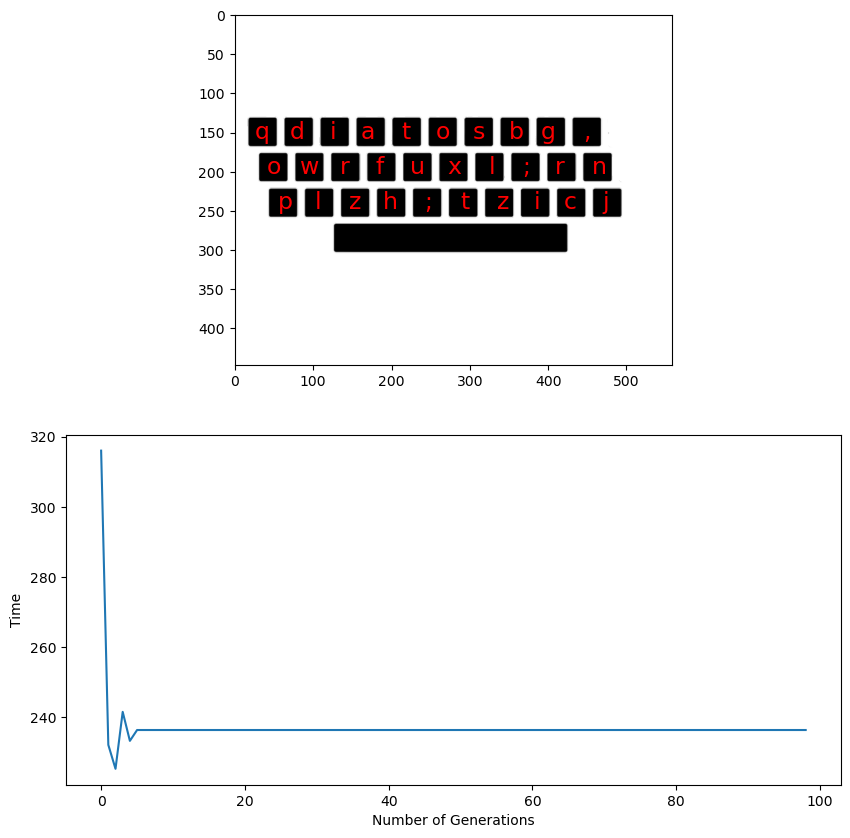

In [1269]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ySchema=[]
for test in range(100):
    for i in range(10):
        fingers=[1 for j in range(8)]
        tabFitness[i]=Readtext(text,tabKeyboards[i])
    tabKeyboards,tabFitness=createNewKeyboards(tabFitness,tabKeyboards)
    addText(tabKeyboards[0])

ValueError: x and y must have same first dimension, but have shapes (99,) and (100,)

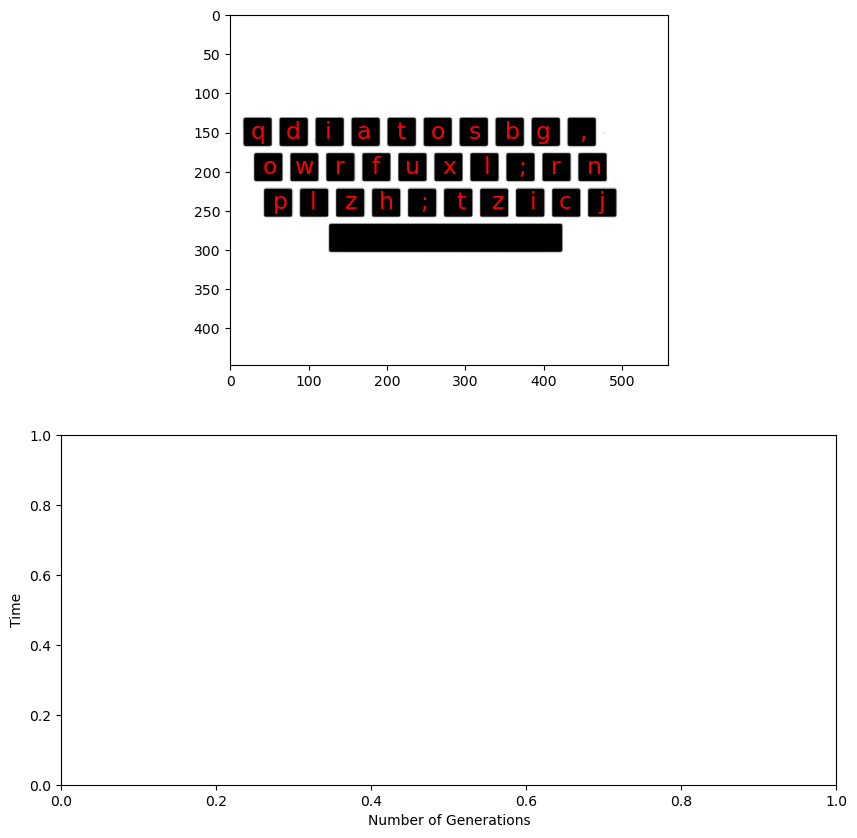

In [1270]:
addText(tabKeyboards[0])